# Proyecto de Simulación de Eventos Discretos
## Tema: Inventario

### Integrantes:
- Carla S Perez Varela C-412
- Francisco V Suárez Bellón C-412

Para poder llevar a cabo esta simulación se ha hecho un estudio del problema a tratar y se ha llegado a la conclusión de que el modelo de inventario es el más adecuado para llevar a cabo la simulación. Donde para el correcto funcionamiento del modelo se ha dividido en una serie de eventos:
- Llegada de un cliente al sistema, el cual distribuye exponencialmente.
- Atención de un cliente, el cual es el tiempo de demora entre que al cliente le ha llegado su turno y el tiempo que tarda en comprar o no el producto. El cual tiene una distribución uniforme entre dos parámetros de tiempo. 
- Secuencial y dependiente del evento anterior está el de reponer la mercancía dado que mientras una persona es atendida no debe hacerse ninguna comprobación de la mercancía para esta labor.


## Dado la forma en la que esta planteada el problema existen dos maneras de modelarlas:
- Simular una linea de tiempo continua donde se puede ver la cantidad de personas que han podido comprar en que momento ha habido perdidas para la empresa asi como posibles cuellos de botella.
- Simular por un determinado grupo de personas dado que en eventos u otros determinados momentos se espera una cantidad de personas u otra obstracción que sea algo fijo y su distribución temporal conocida y se quiere conocer el comportamiento de la empresa en ese momento y ambiente 

**Para poder hacer más sencilla la explicación crearemos una simulación con unos parámetros predefinidos, donde se harán 60 estudios de Bernoulli independientes con diferentes semillas en las dos modalidades planteadas anteriormente**

#### Caso ejemplo:
- Tiempo máximo de simulación : 10080 Una semana (Este límite es solo para el caso de la línea temporal)
- tiempo promedio de entrada de un cliente en minutos = 20.
- precio de compra del producto al proveedor = 200.
- precio de venta del producto = 300. 
- stock máximo en la tienda = 150.
- stock mínimo en la tienda = 40.
- stock inicial en la tienda = 21.
- Tiempo mínimo de reposición = 65 minutos
- tiempo máximo de reposición = 180 minutos
- cantidad de personal a atender simultaneamente a clientes = 1.
- cantidad de clientes máximo = 12 ( En el caso que se genere por cantidad de clientes)
- precio de mantener producto por minuto = 0.05


In [1]:
from sim import *
from Analize import analysis
import numpy as np

Generar las simulaciones con iguales parámetros excepto las semillas

In [2]:
def get_simulation(seed):
   return Simulation(seed=seed, sim_time=1080, arrival_times=20, buy_price=200, sale_price=300, STOCK_MAX=150,
                             STOCK_MIN=40, initial_stock=21, Repo_Min_T=65, Repo_Max_T=180, storekeeper=1, clients_count=1500,
                             maintenance_cost=0.05)

In [3]:
def experiment_results(count=60):
    """
    This function runs a simulation experiment multiple times and collects the results.

    Parameters:
    count (int): The number of times to run the simulation. Default is 60.

    Returns:
    tuple: A tuple containing two lists:
           - lis_by_time (list): This list contains the results of the simulations when the 'by_time' parameter is set to True.
           - lis_by_person (list): This list contains the results of the simulations when the 'by_time' parameter is set to False.
    """

    # Initialize lists to store the results of the simulations
    lis_by_time = []
    lis_by_person = []

    # Run the simulation 'count' times
    for seed in range(1, count + 1, 1):
        # Initialize a Simulation object with the given parameters
        sim = get_simulation(seed)

        # Run the simulation with 'by_time' set to True and store the result
        s_t = sim.start(True)
        lis_by_time.append(s_t)
        sim = get_simulation(seed)
        # Run the simulation with 'by_time' set to False and store the result
        s_p = sim.start(False)
        lis_by_person.append(s_p)

    # Return the results of the simulations
    return lis_by_time, lis_by_person

In [4]:
lis_by_time, lis_by_person=experiment_results(60)

### Análisis Estadístico

##### Análisis a la simulación en base a una cantidad fija de personas




------------------------------------
El el balance monetario fue de:
 Media: 660857.5033721934
Mediana: 665952.2791467617
Varianza: 245929935.9135451
Desviación estándar: 15682.153420801147
Mínimo: 625751.032465295
Máximo: 687200.5490153374


------------------------------------


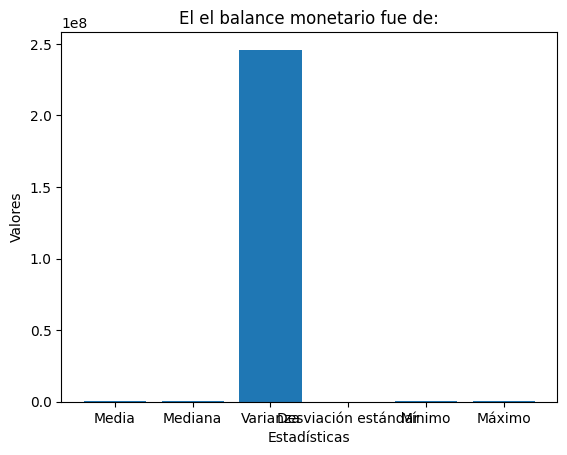

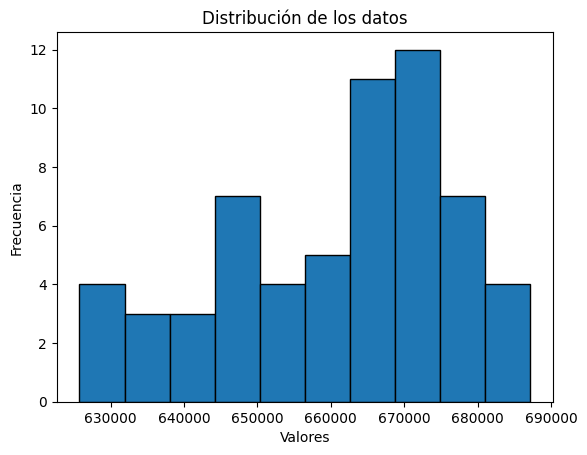




------------------------------------
No pudieron comprar nada:
 Media: 63.68333333333333
Mediana: 61.0
Varianza: 192.24972222222223
Desviación estándar: 13.865414606935568
Mínimo: 34
Máximo: 101


------------------------------------


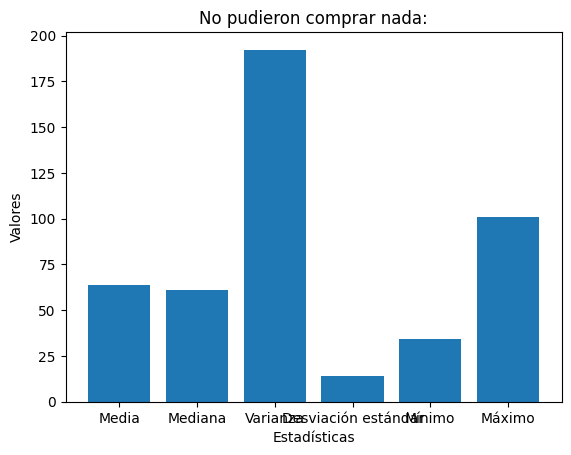

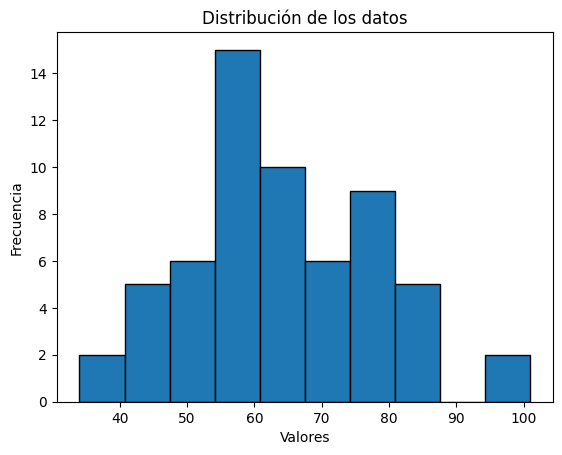




------------------------------------
Se suplió la demanda a:
 Media: 1413.5166666666667
Mediana: 1416.0
Varianza: 228.74972222222223
Desviación estándar: 15.124474279201317
Mínimo: 1374
Máximo: 1444


------------------------------------


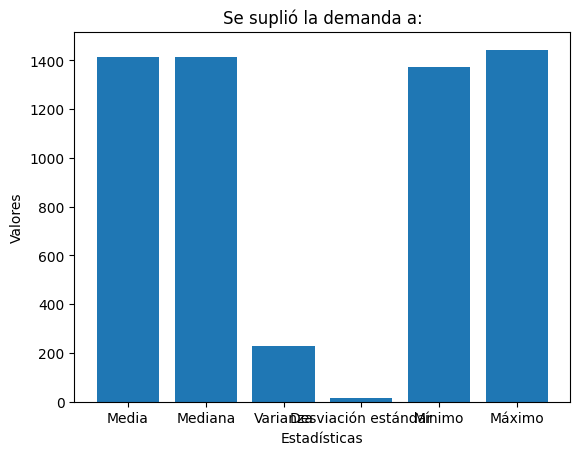

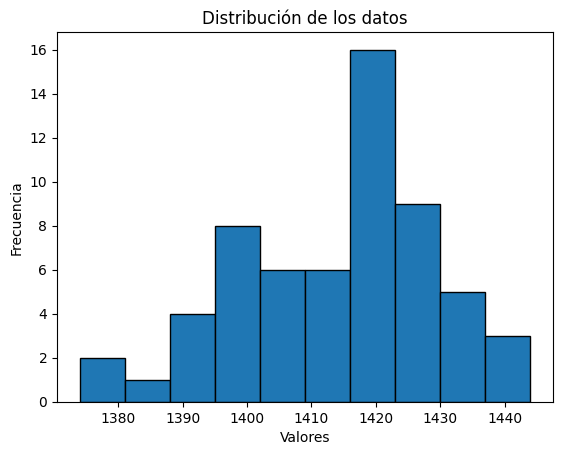




------------------------------------
Fueron suplidos con menos oferta que su demanda
 Media: 22.8
Mediana: 23.0
Varianza: 10.926666666666666
Desviación estándar: 3.3055508870181782
Mínimo: 17
Máximo: 32


------------------------------------


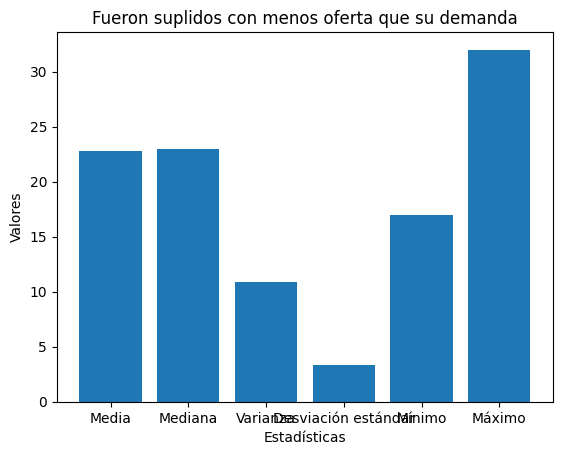

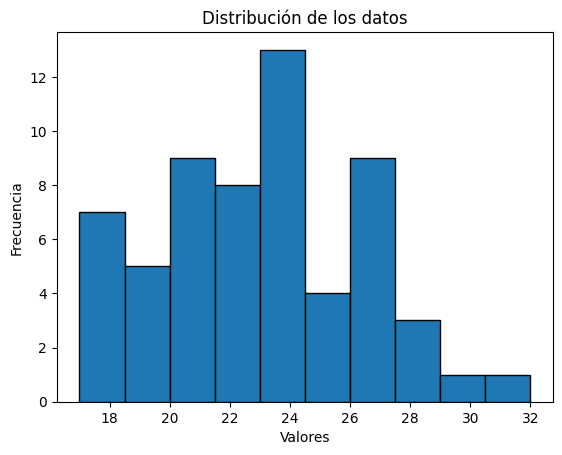



------------------------------------
Analizar en base a la mediana



------------------------------------
Análisis en base a la mediana de  los balances en particiones por índices :
 Media: 332567.58700005093
Mediana: 333156.3056635308
Varianza: 39313354759.02859
Desviación estándar: 198275.95607896734
Mínimo: -16122.286171935692
Máximo: 675099.0804993632


------------------------------------


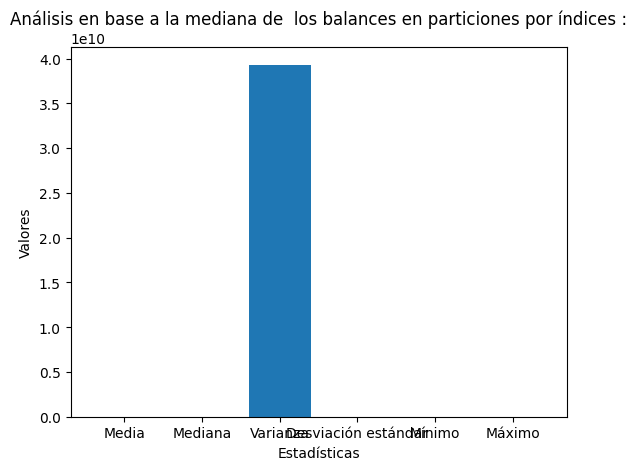

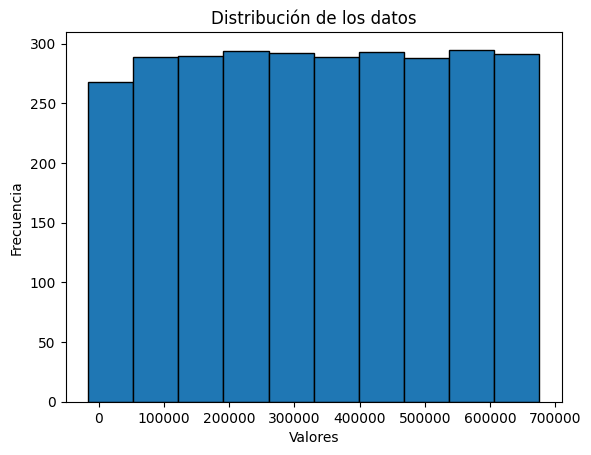

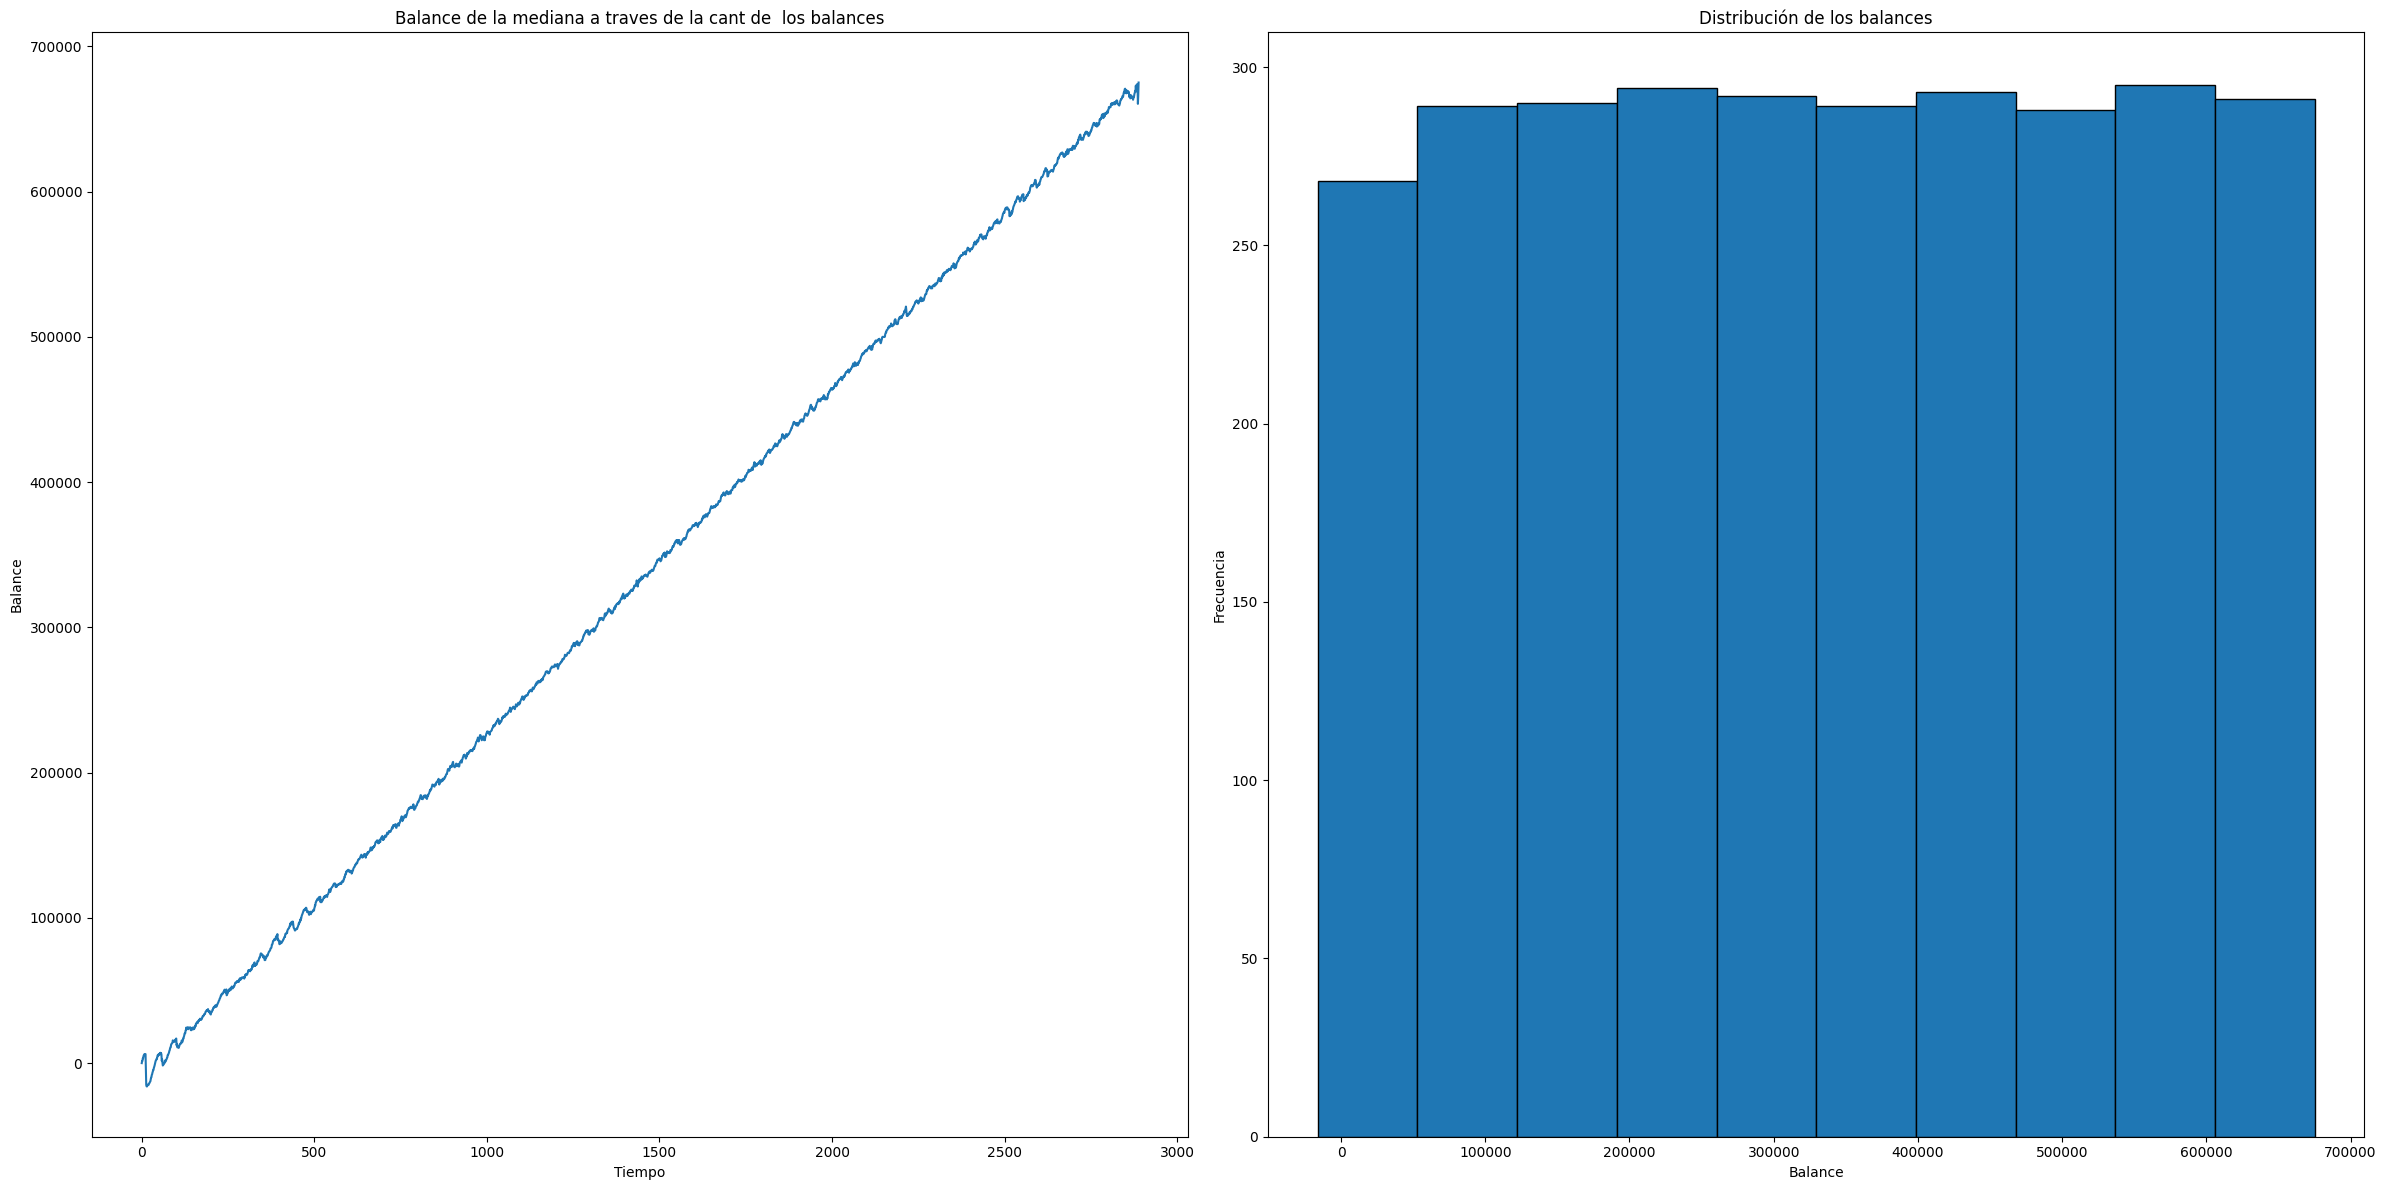



------------------------------------
Analizar en base al promedio



------------------------------------
Análisis en base al promedio de los  los balances en particiones por índices
 Media: 332100.35550386464
Mediana: 333012.5198824995
Varianza: 39078760227.03791
Desviación estándar: 197683.48496280084
Mínimo: -13099.390852438262
Máximo: 675099.0804993632


------------------------------------


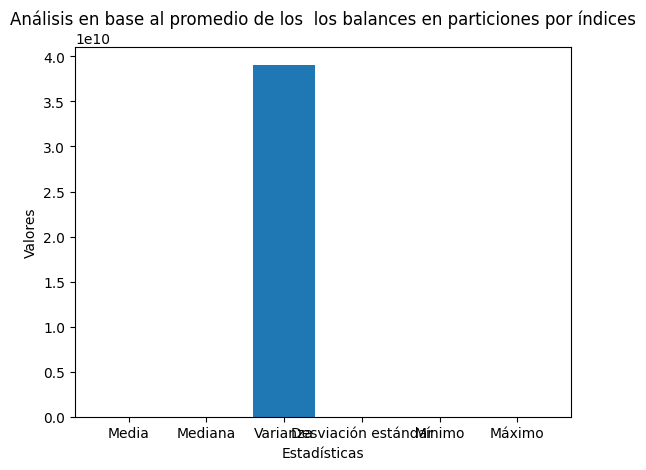

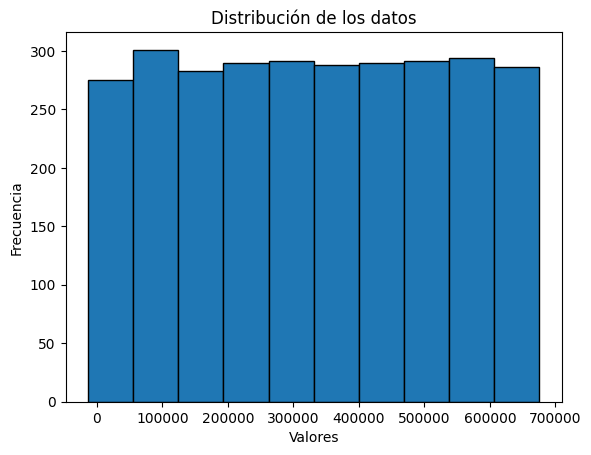

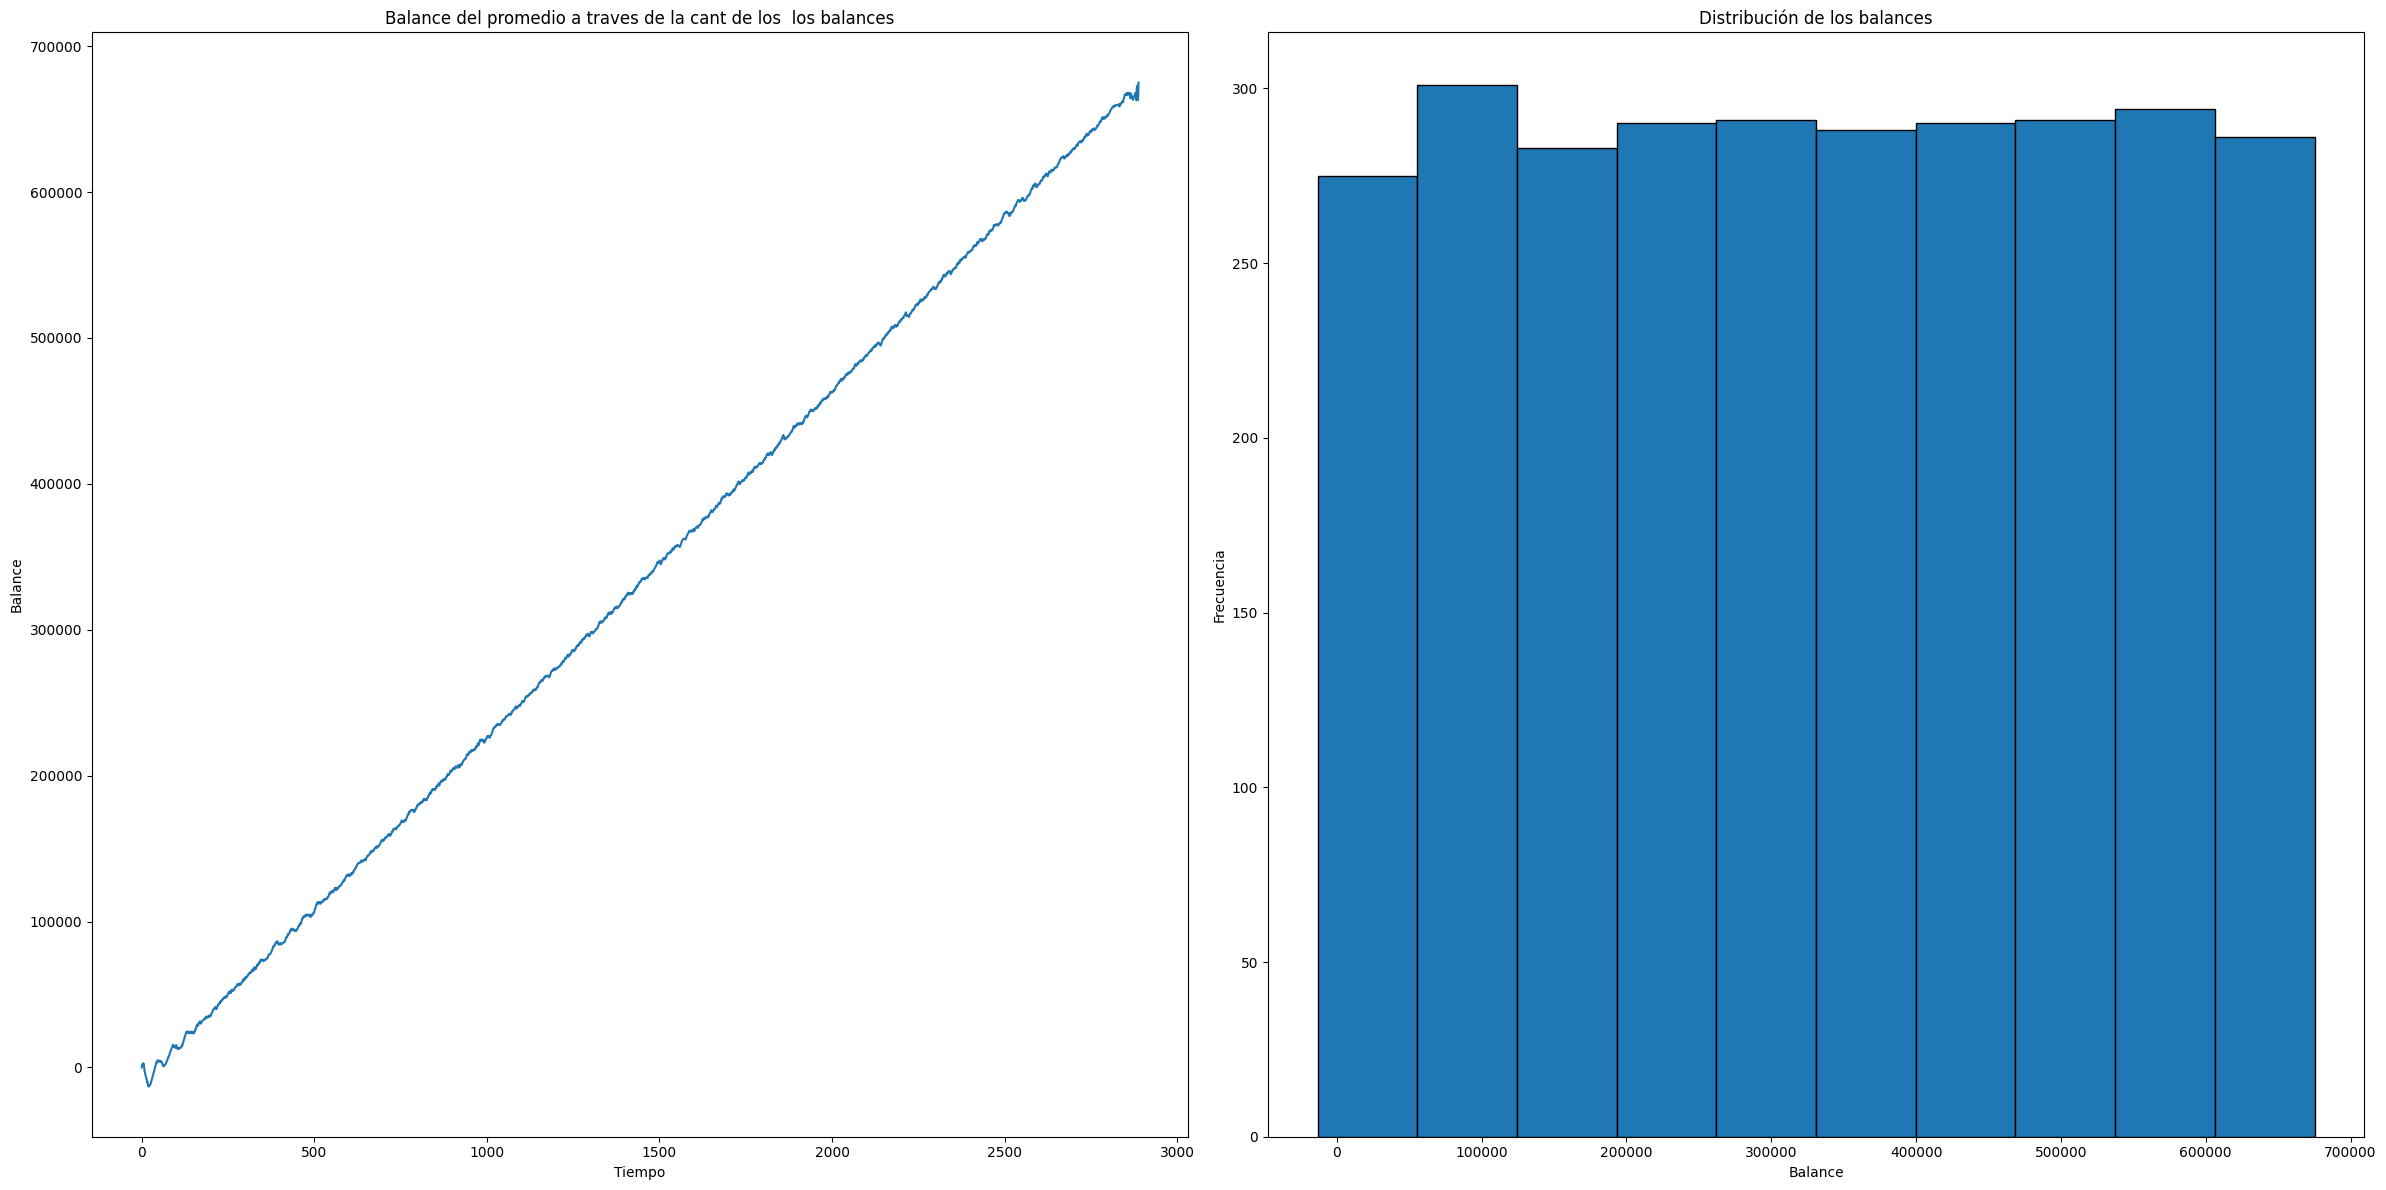



------------------------------------
Analizar en base a la varianza



------------------------------------
Análisis en base a la varianza de los  los balances en particiones por índices
 Media: 160924375.46427798
Mediana: 156605027.4347665
Varianza: 4745612758882884.0
Desviación estándar: 68888408.01530315
Mínimo: 0.0
Máximo: 1030893157.2436972


------------------------------------


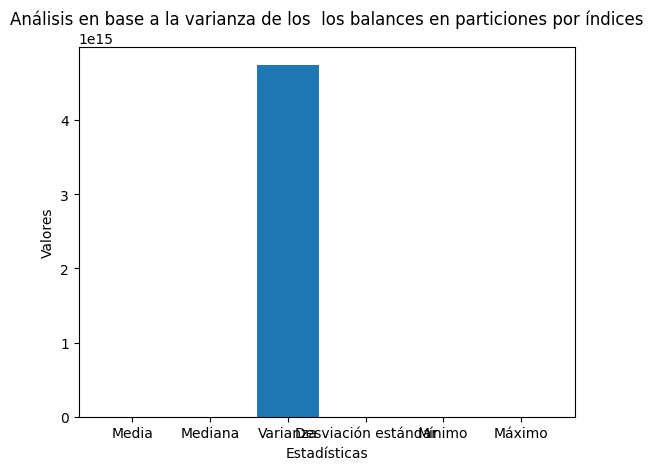

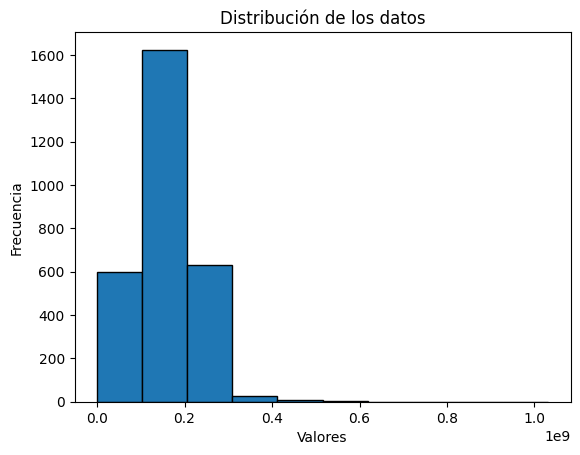

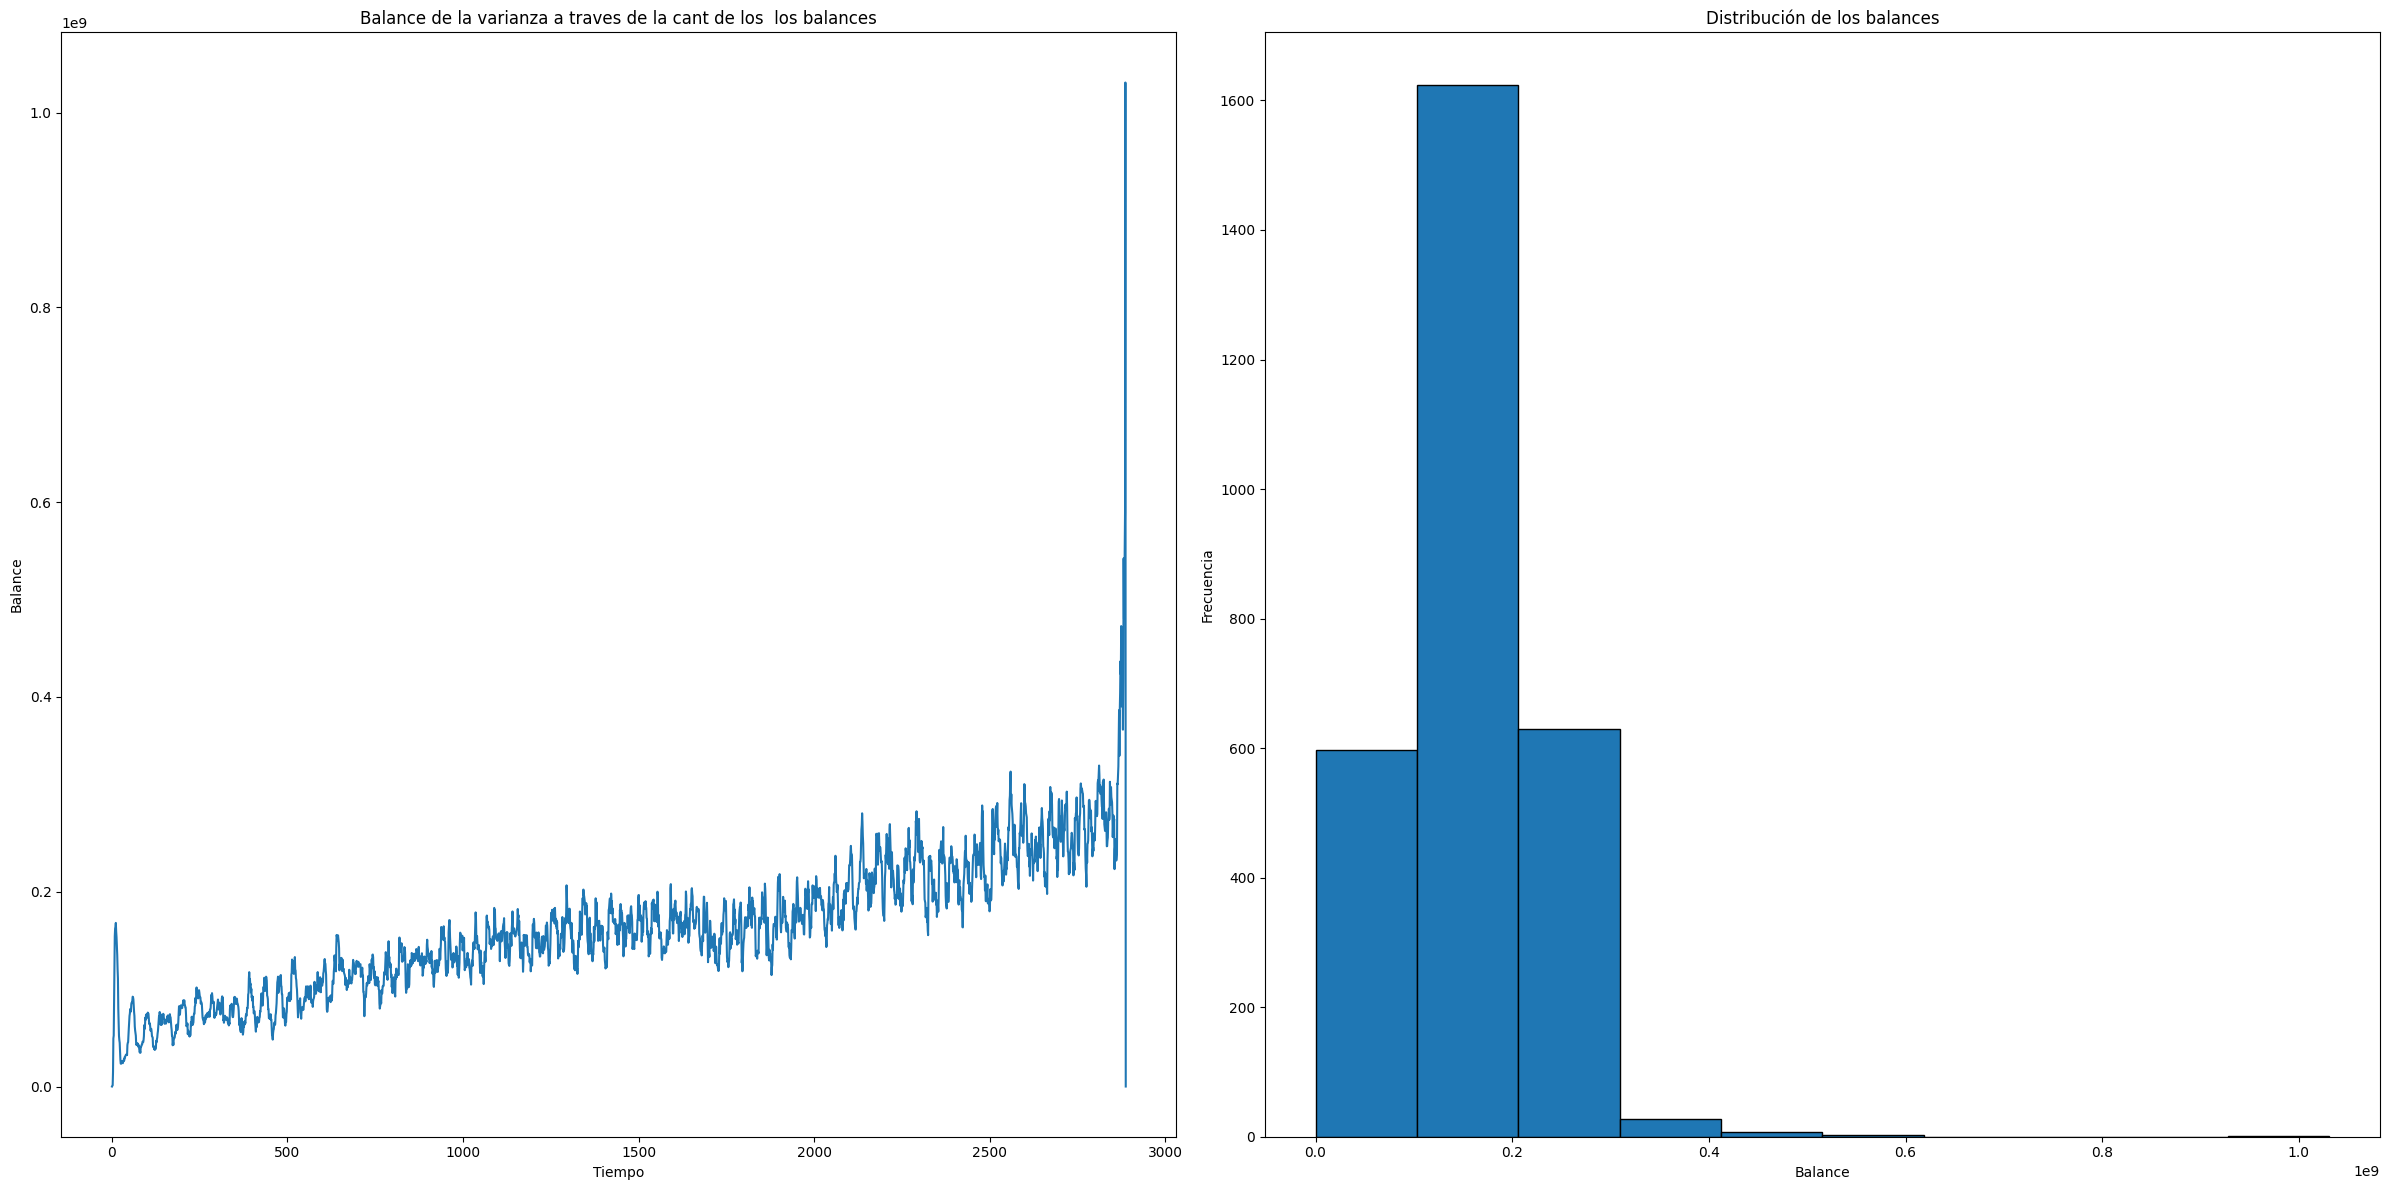



------------------------------------


------------------------------------
Analizar en base a la desviación estándar



------------------------------------
Análisis en base a la desviación estándar de los  los balances en particiones por índices
 Media: 12386.65398301738
Mediana: 12514.193039695629
Varianza: 7495178.569277617
Desviación estándar: 2737.7323772198074
Mínimo: 0.0
Máximo: 32107.52493176167


------------------------------------


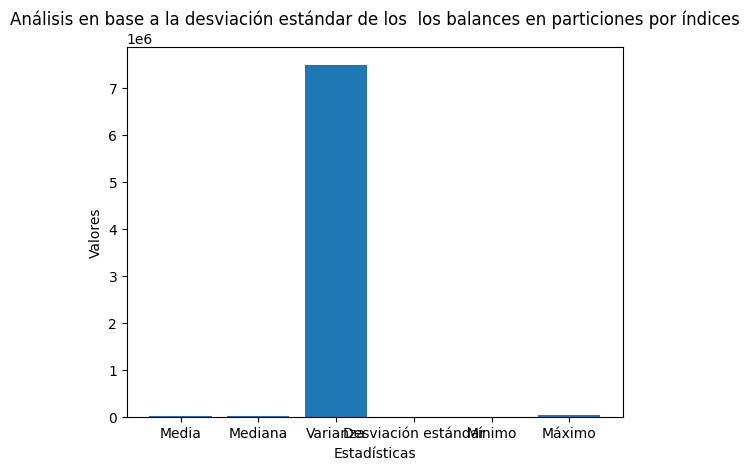

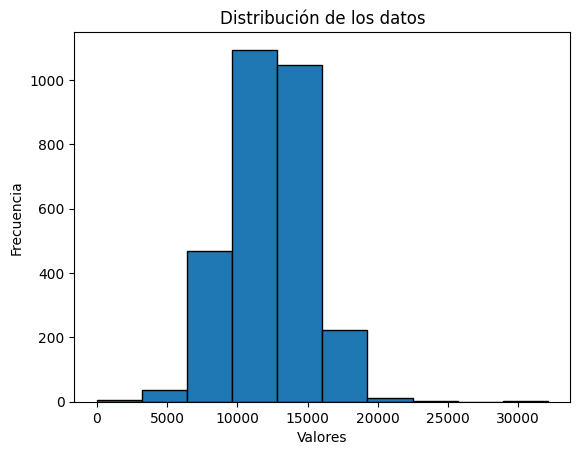

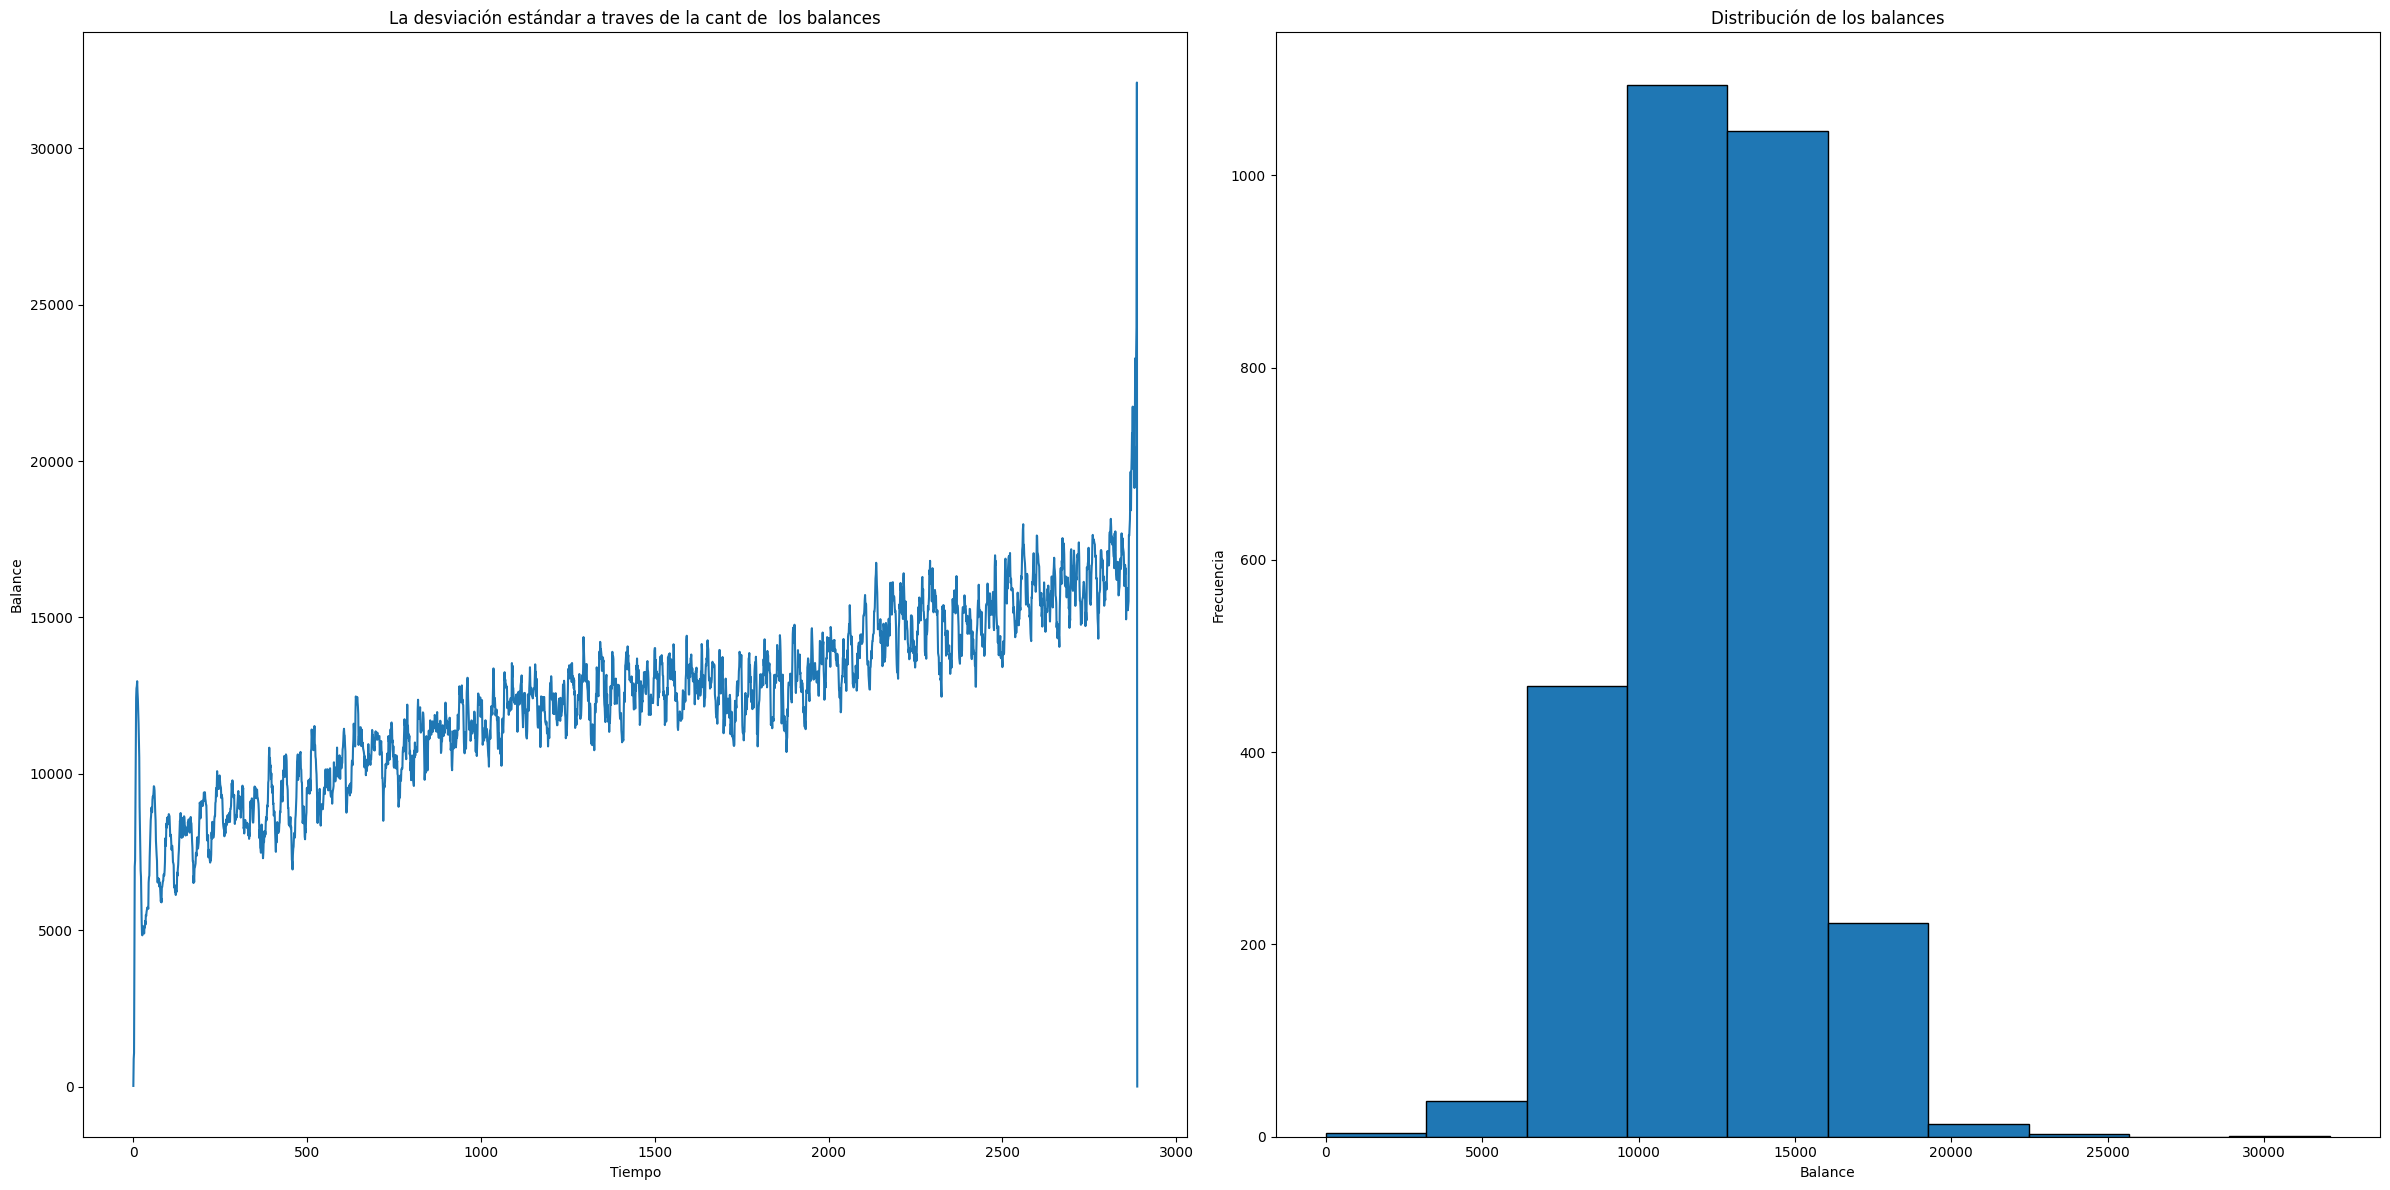



------------------------------------
Analizar en base al mínimo



------------------------------------
Análisis en base al mínimo de los  los balances en particiones por índices
 Media: 302625.8393222893
Mediana: 305216.283416544
Varianza: 36117632866.2875
Desviación estándar: 190046.3966148464
Mínimo: -25624.58982146286
Máximo: 675099.0804993632


------------------------------------


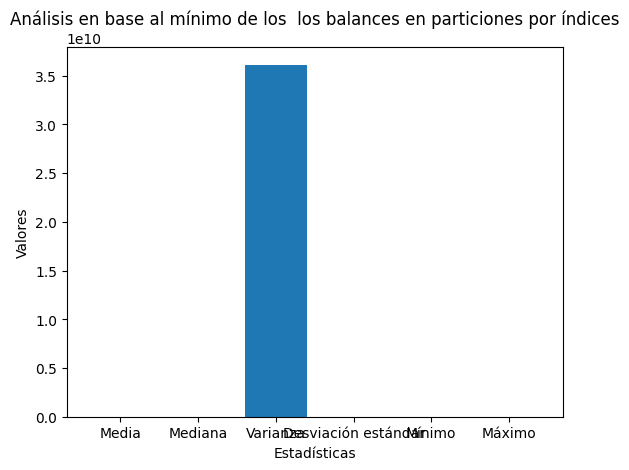

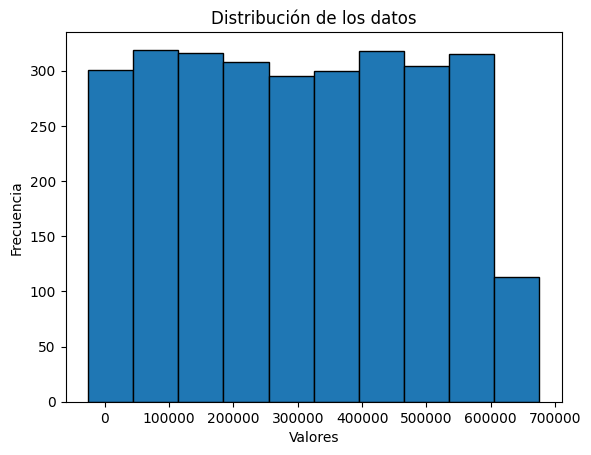

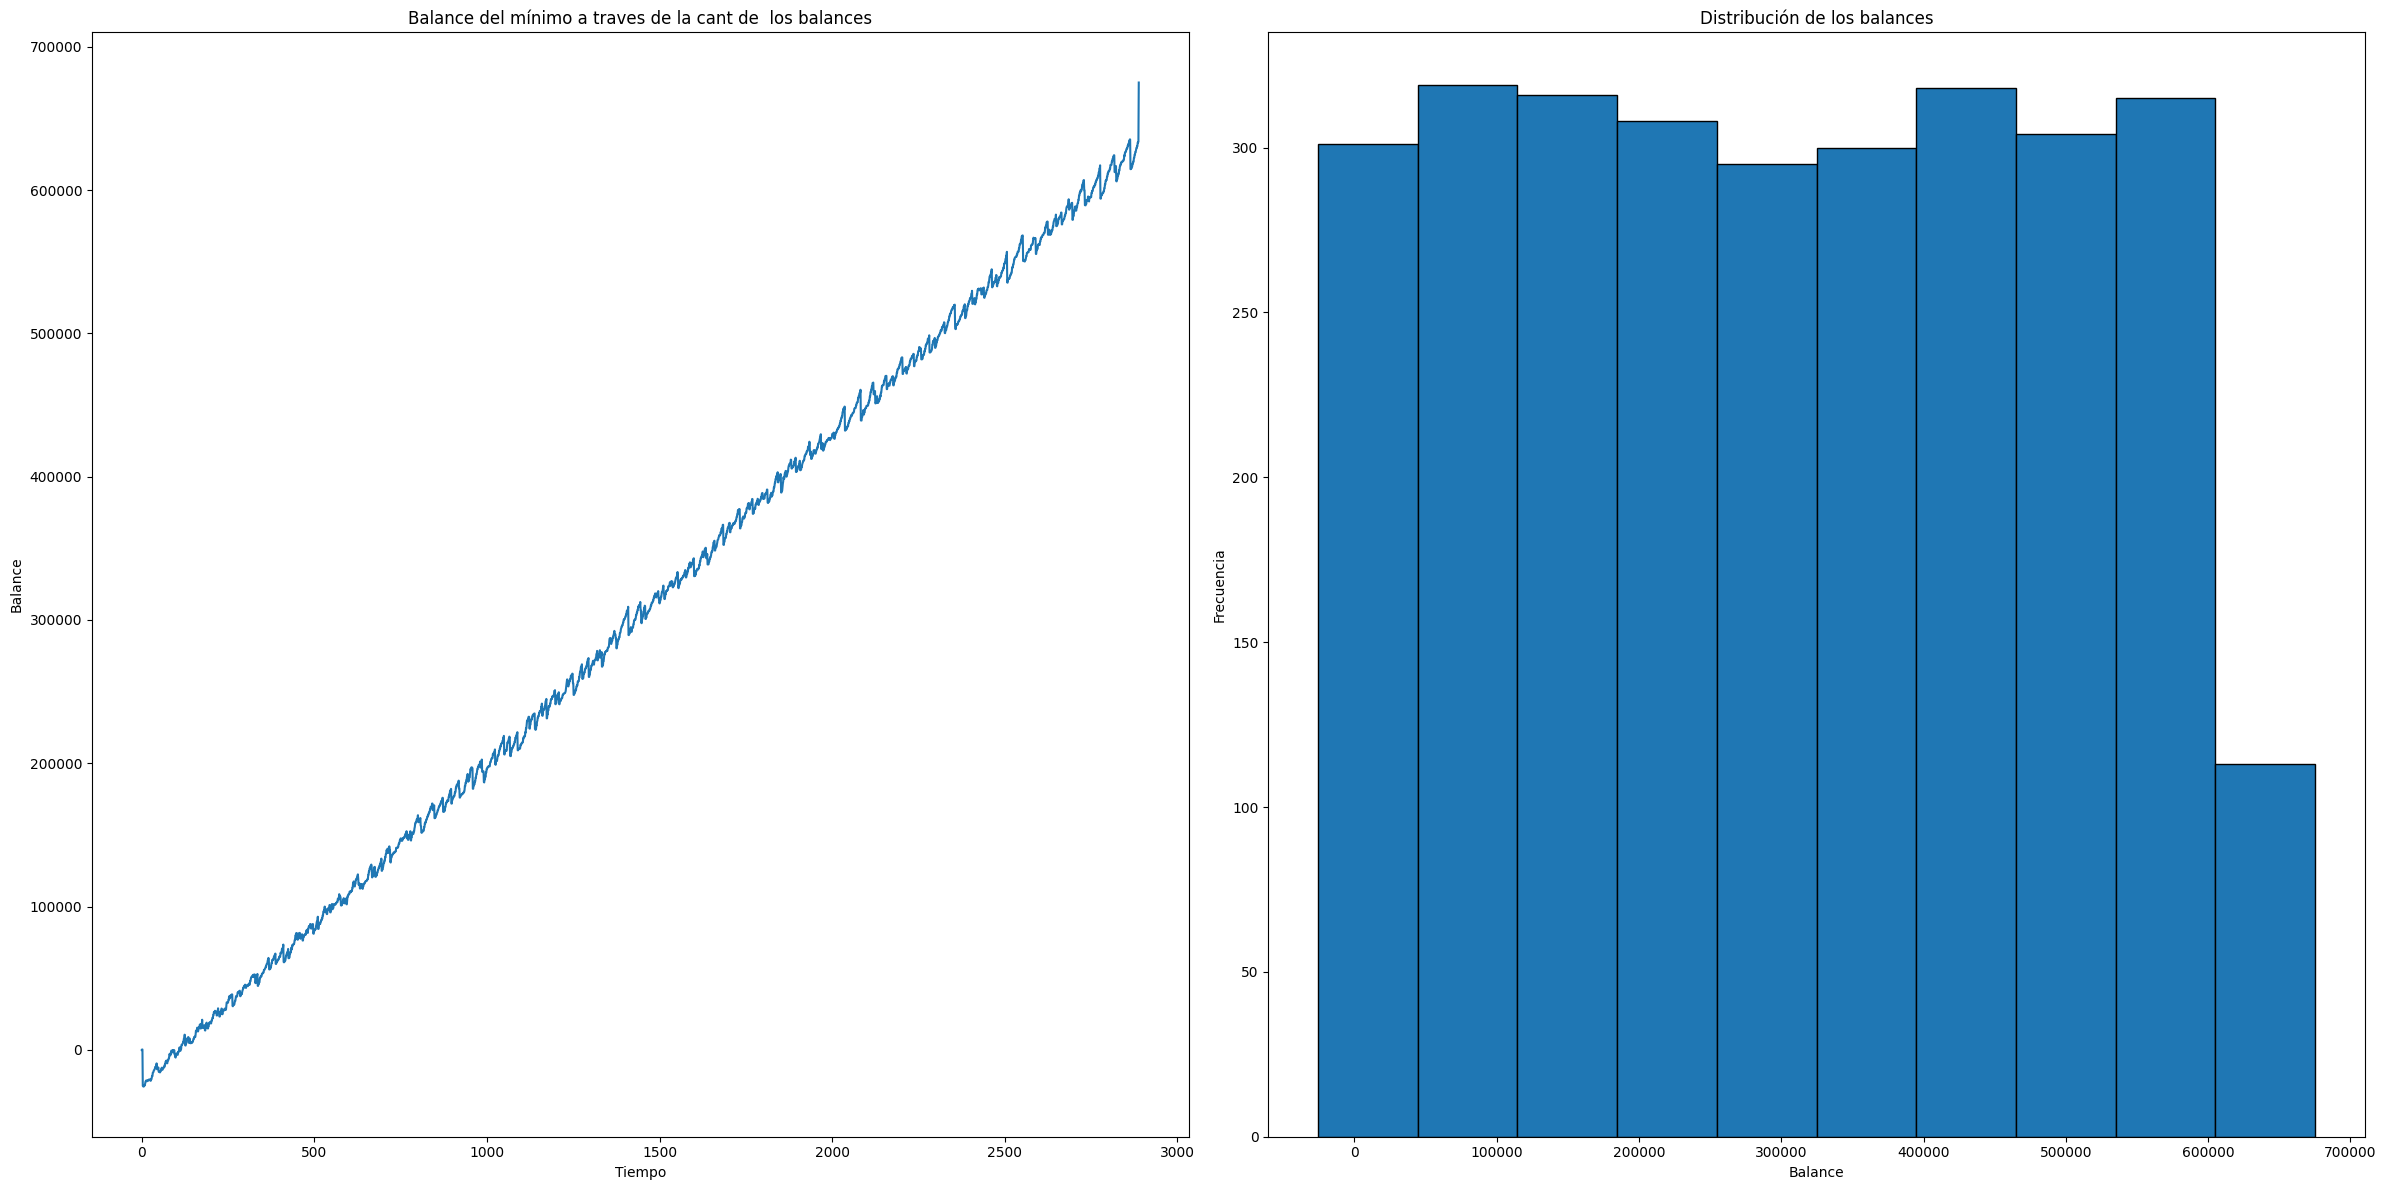



------------------------------------
Analizar en base al máximo



------------------------------------
Análisis en base al máximo de  los balances en particiones por índices
 Media: 357638.97695532336
Mediana: 361625.0447709711
Varianza: 40655073378.72942
Desviación estándar: 201631.03277702423
Mínimo: -0.4595395116482045
Máximo: 701638.9505321839


------------------------------------


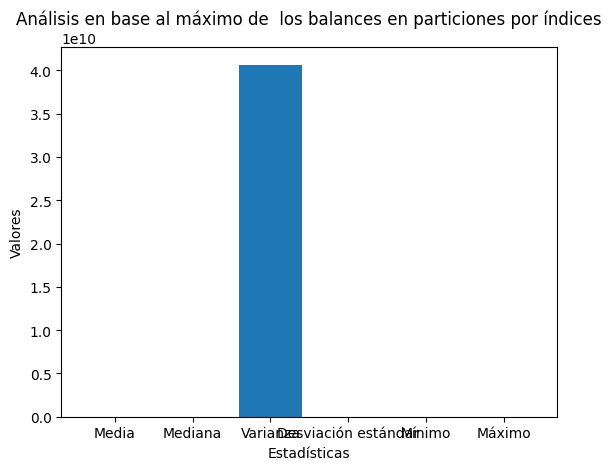

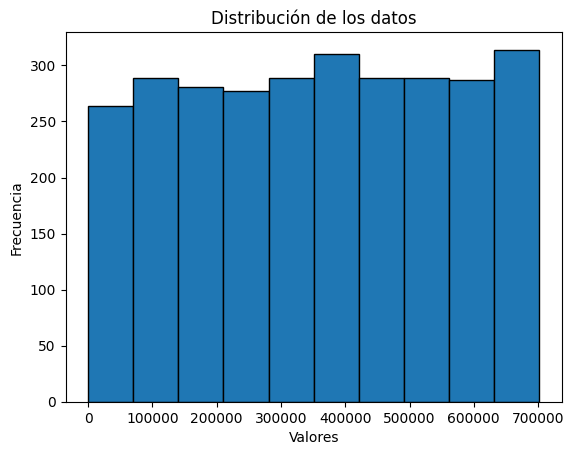

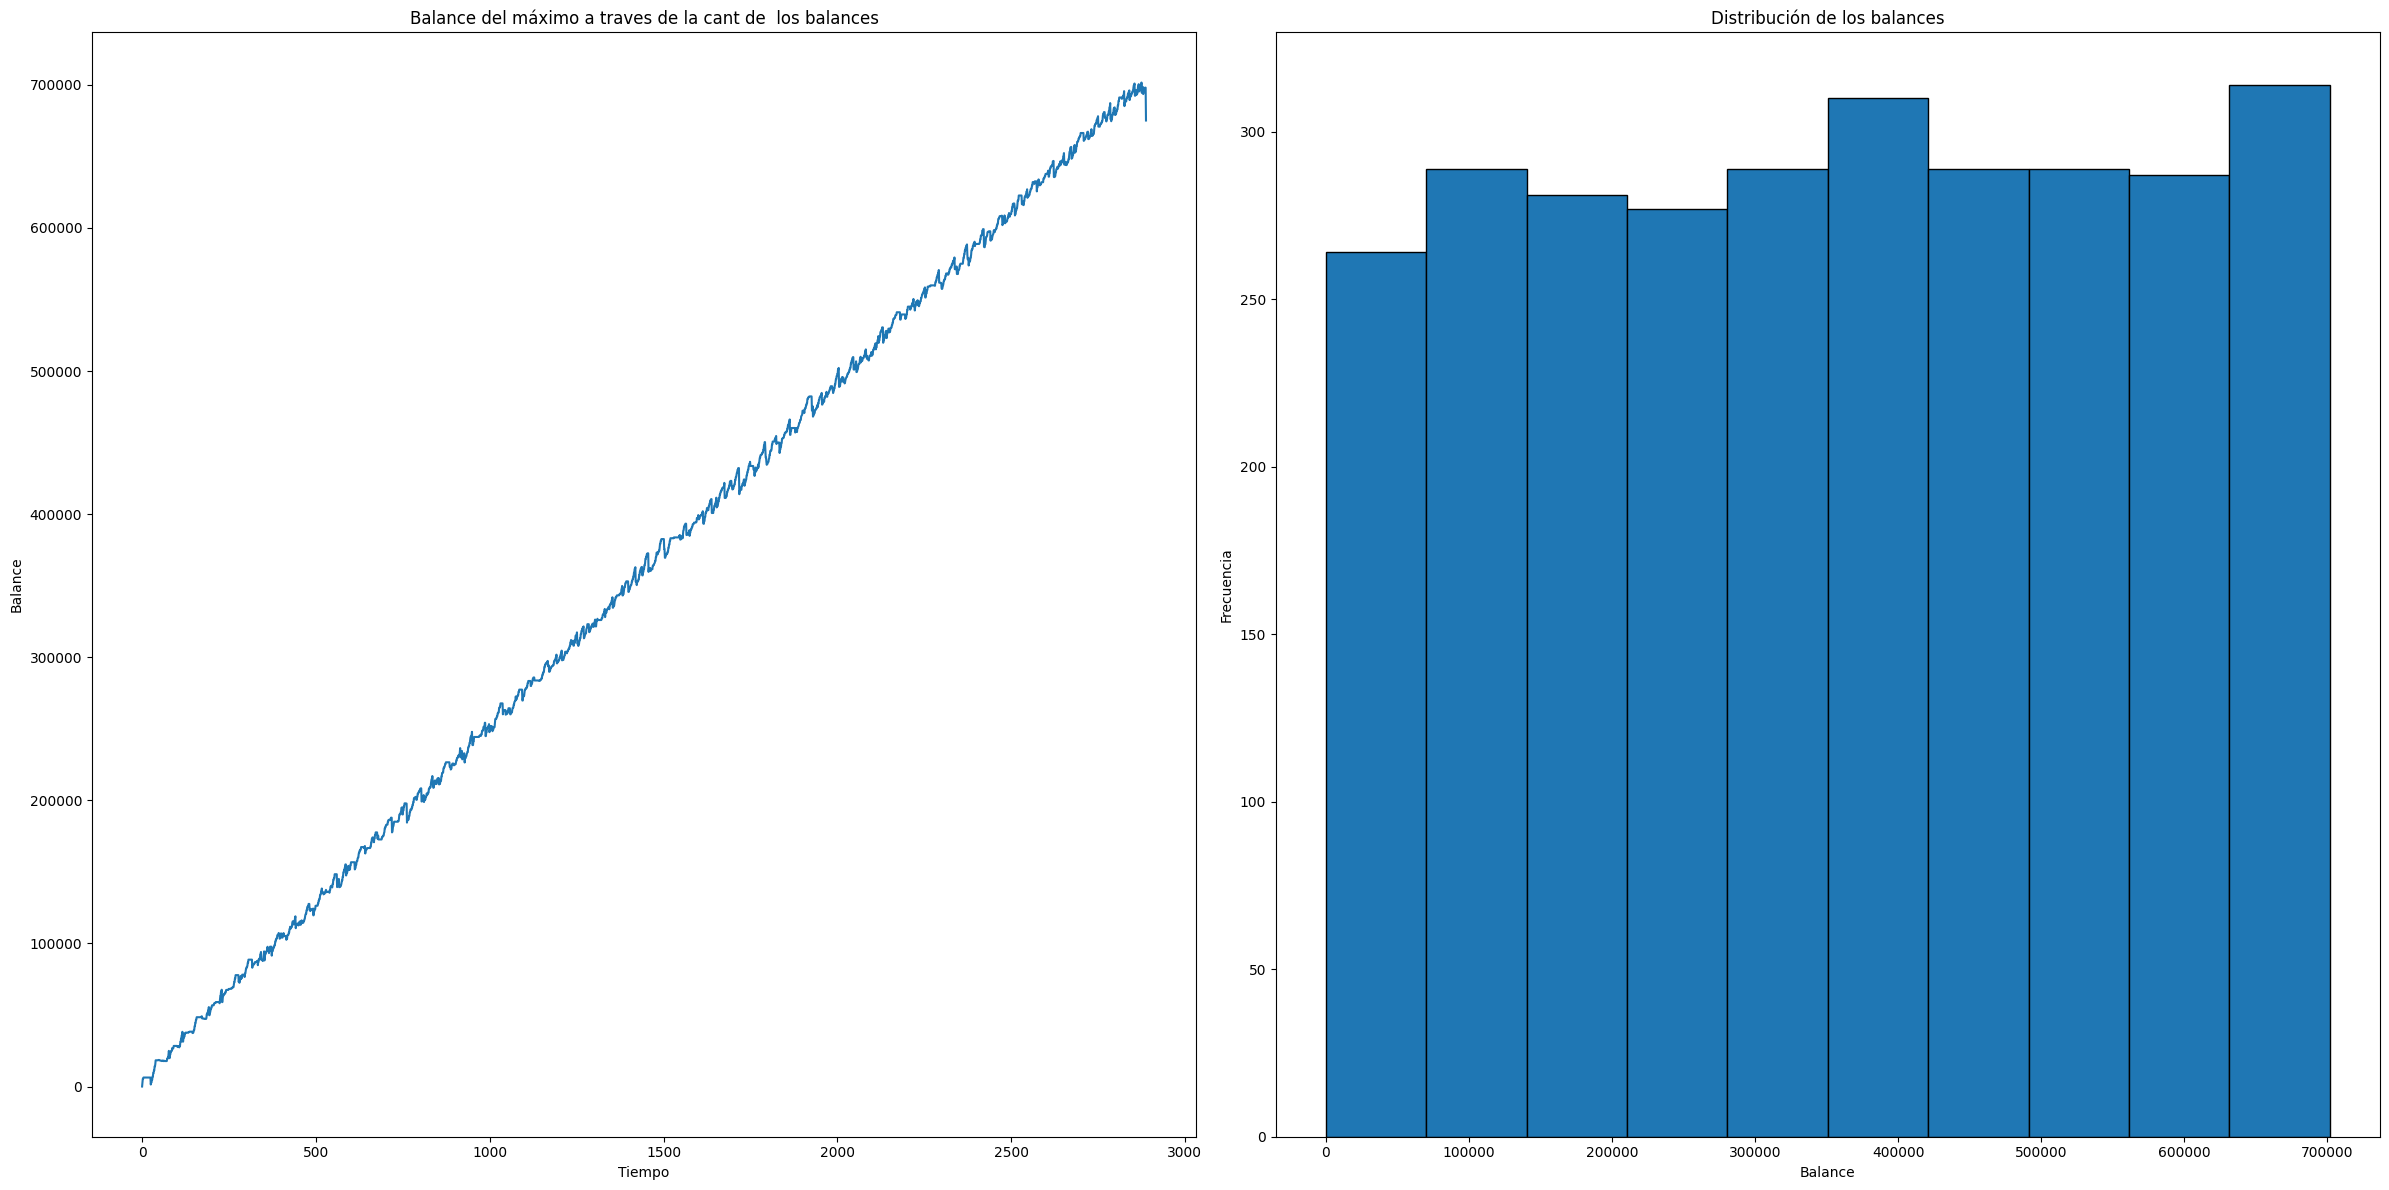



------------------------------------


------------------------------------
Analizar en base a la mediana



------------------------------------
Análisis en base a la mediana de  las ventas hasta el balance en particiones por índices :
 Media: 64.77639321564556
Mediana: 65.0
Varianza: 99.7507961292167
Desviación estándar: 9.987532033951966
Mínimo: 0.0
Máximo: 117.0


------------------------------------


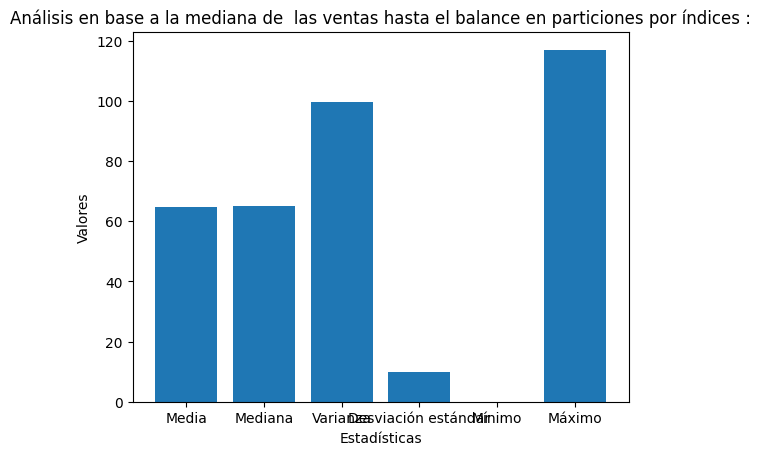

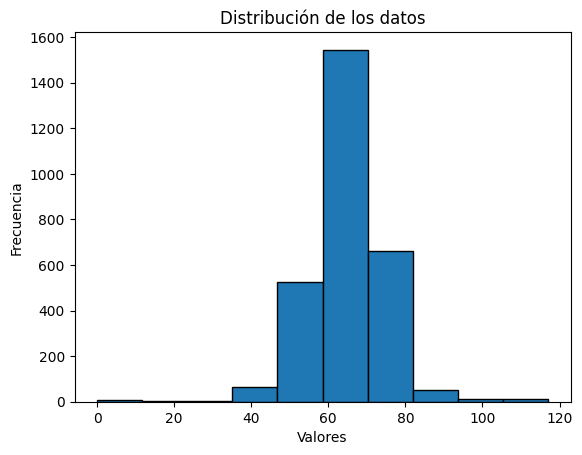

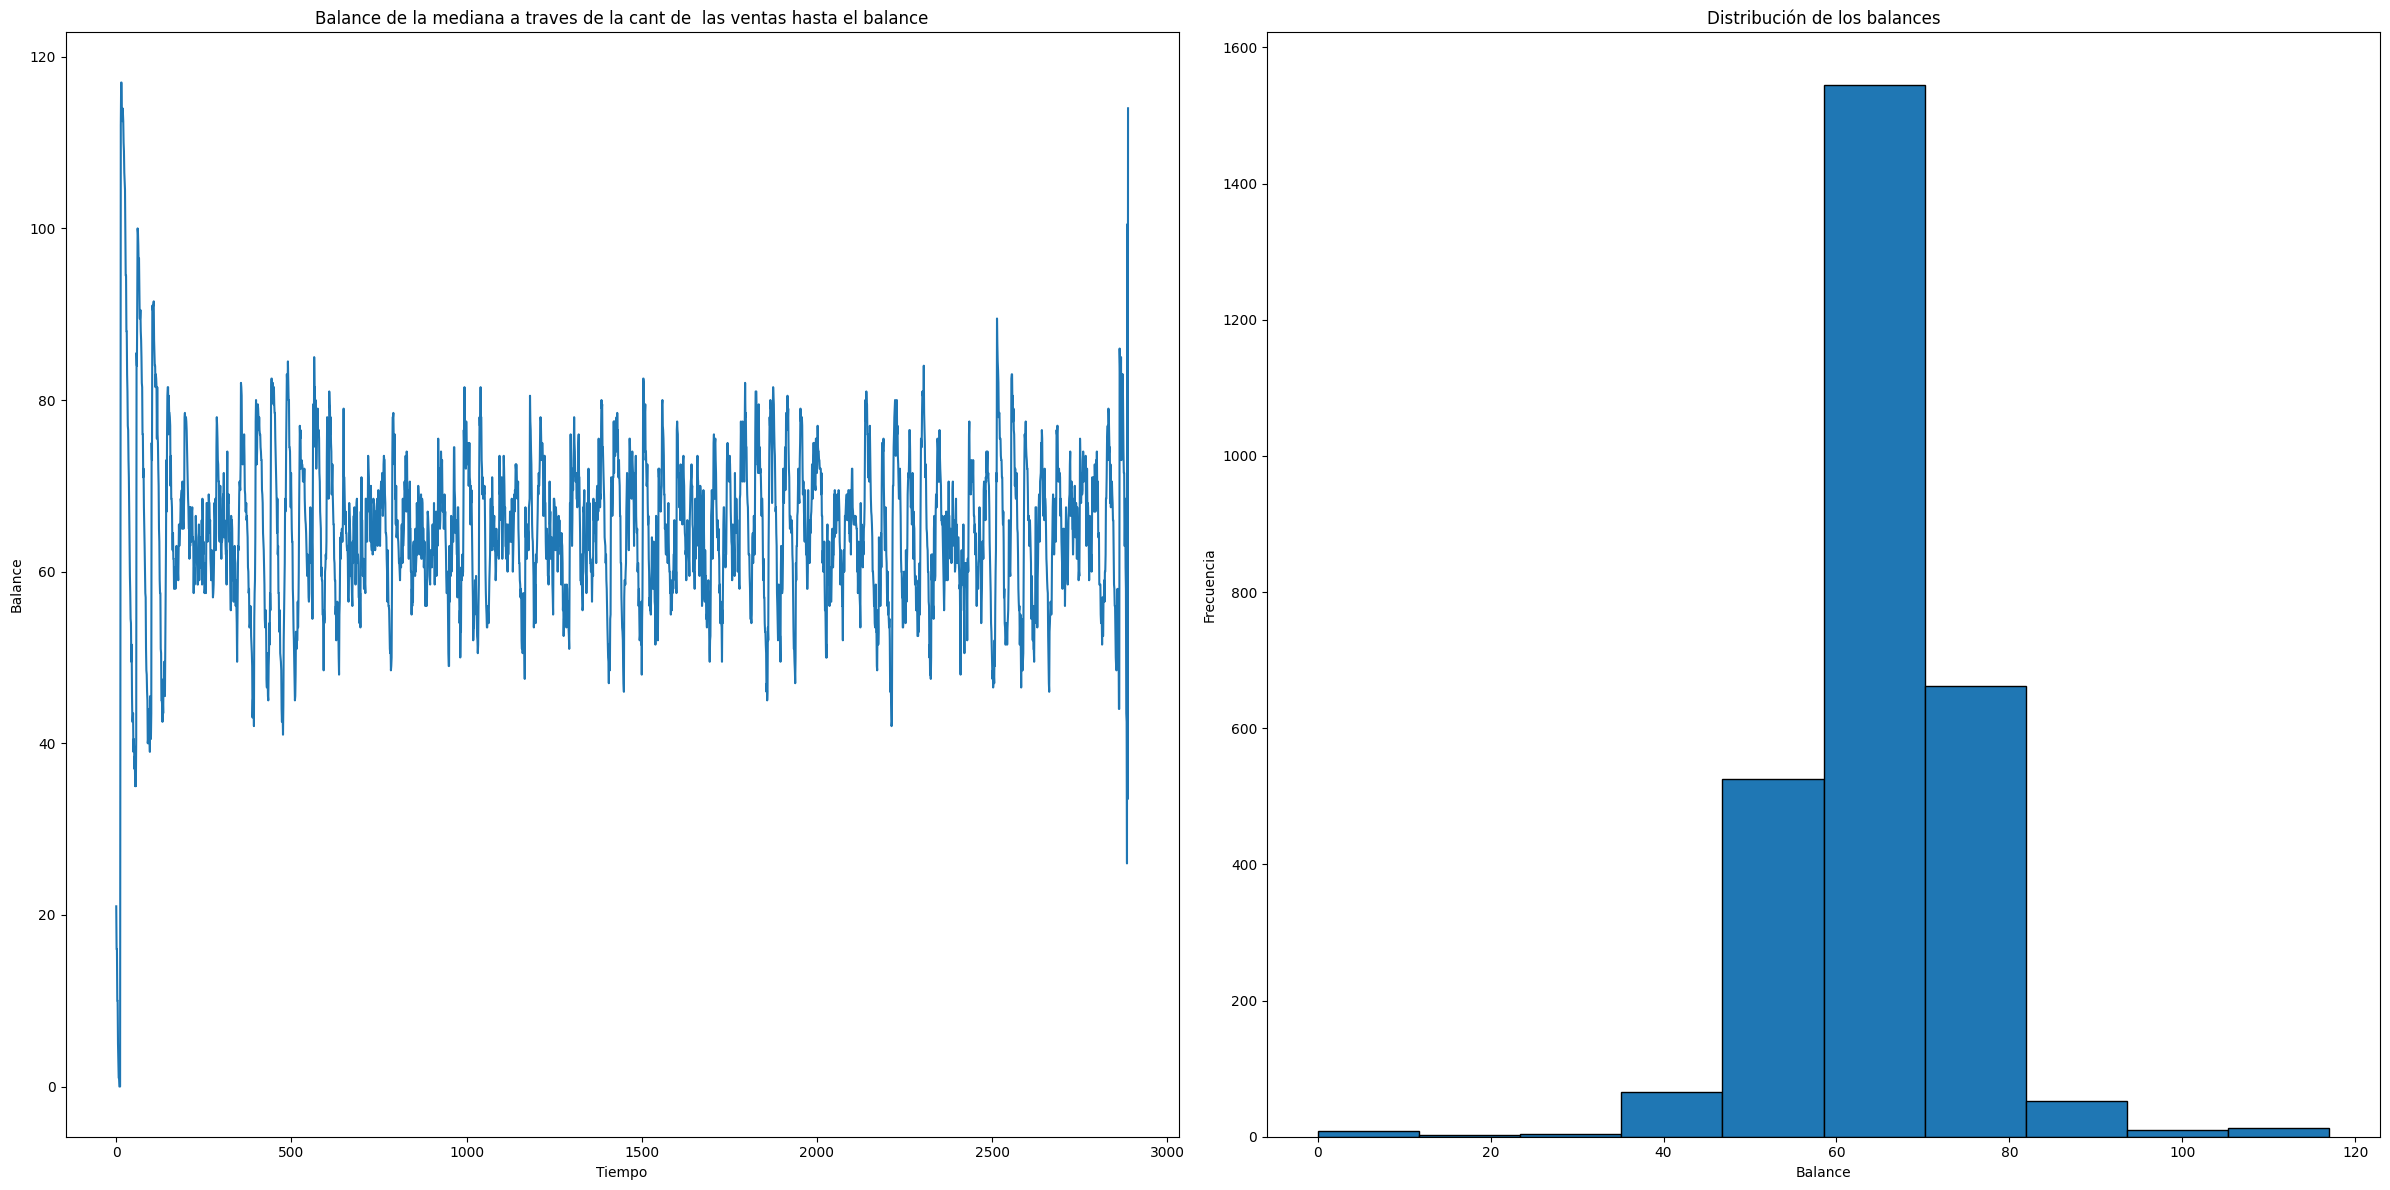



------------------------------------
Analizar en base al promedio



------------------------------------
Análisis en base al promedio de los  las ventas hasta el balance en particiones por índices
 Media: 64.44056074229431
Mediana: 64.4
Varianza: 40.59839547867996
Desviación estándar: 6.371687019830773
Mínimo: 12.733333333333333
Máximo: 114.0


------------------------------------


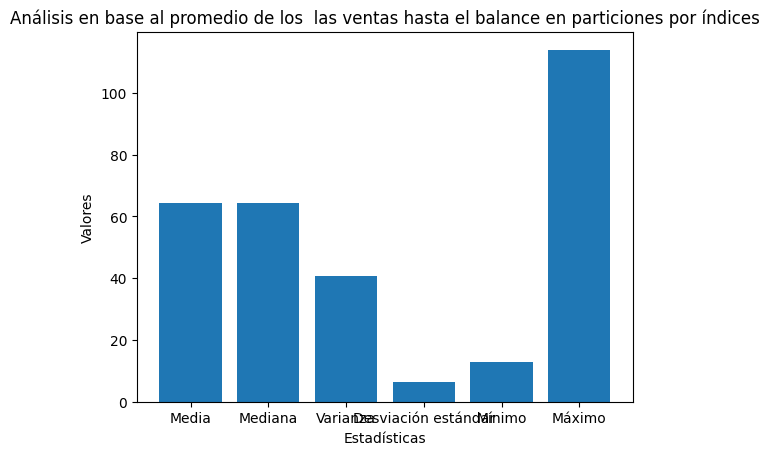

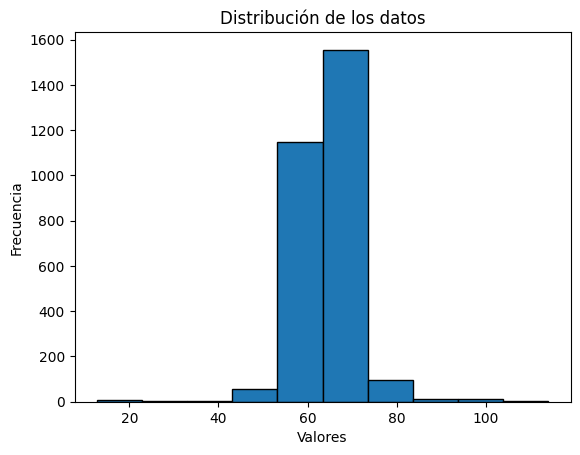

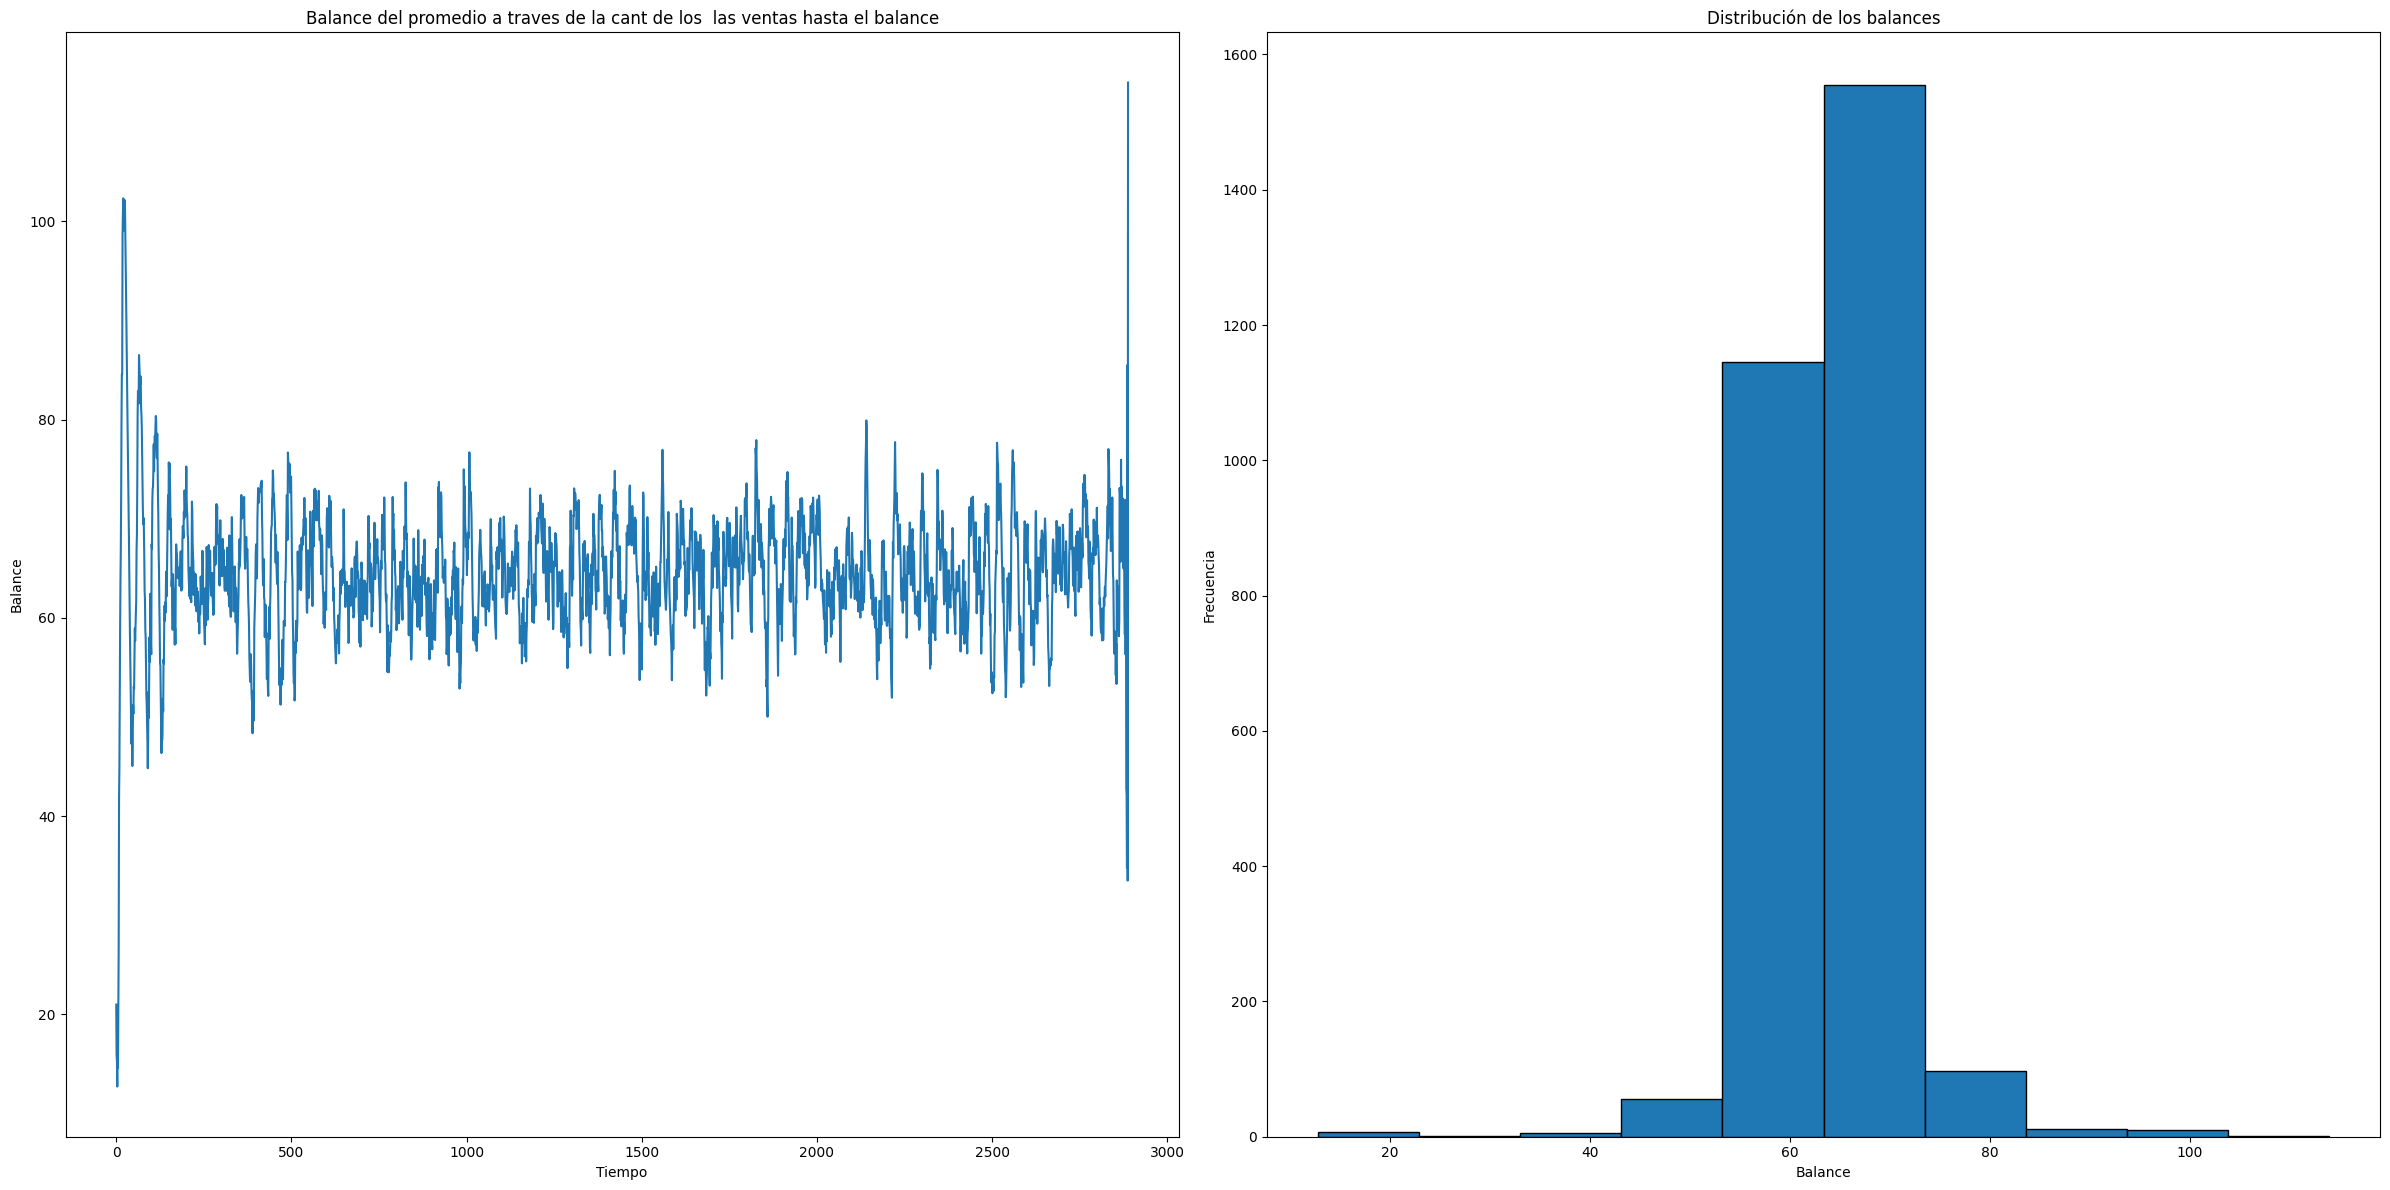



------------------------------------
Analizar en base a la varianza



------------------------------------
Análisis en base a la varianza de los  las ventas hasta el balance en particiones por índices
 Media: 1356.536783088758
Mediana: 1349.9155555555553
Varianza: 73888.20930354198
Desviación estándar: 271.8238571272617
Mínimo: 0.0
Máximo: 4156.112222222224


------------------------------------


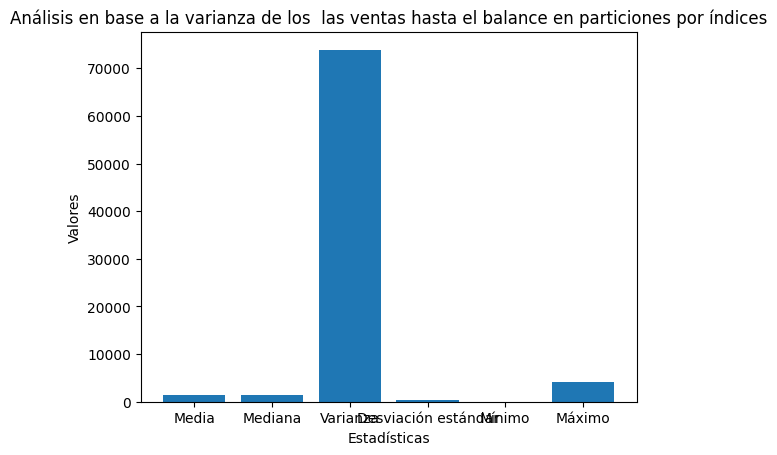

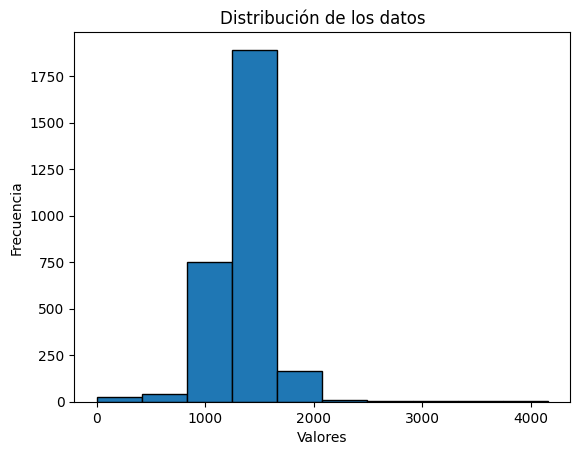

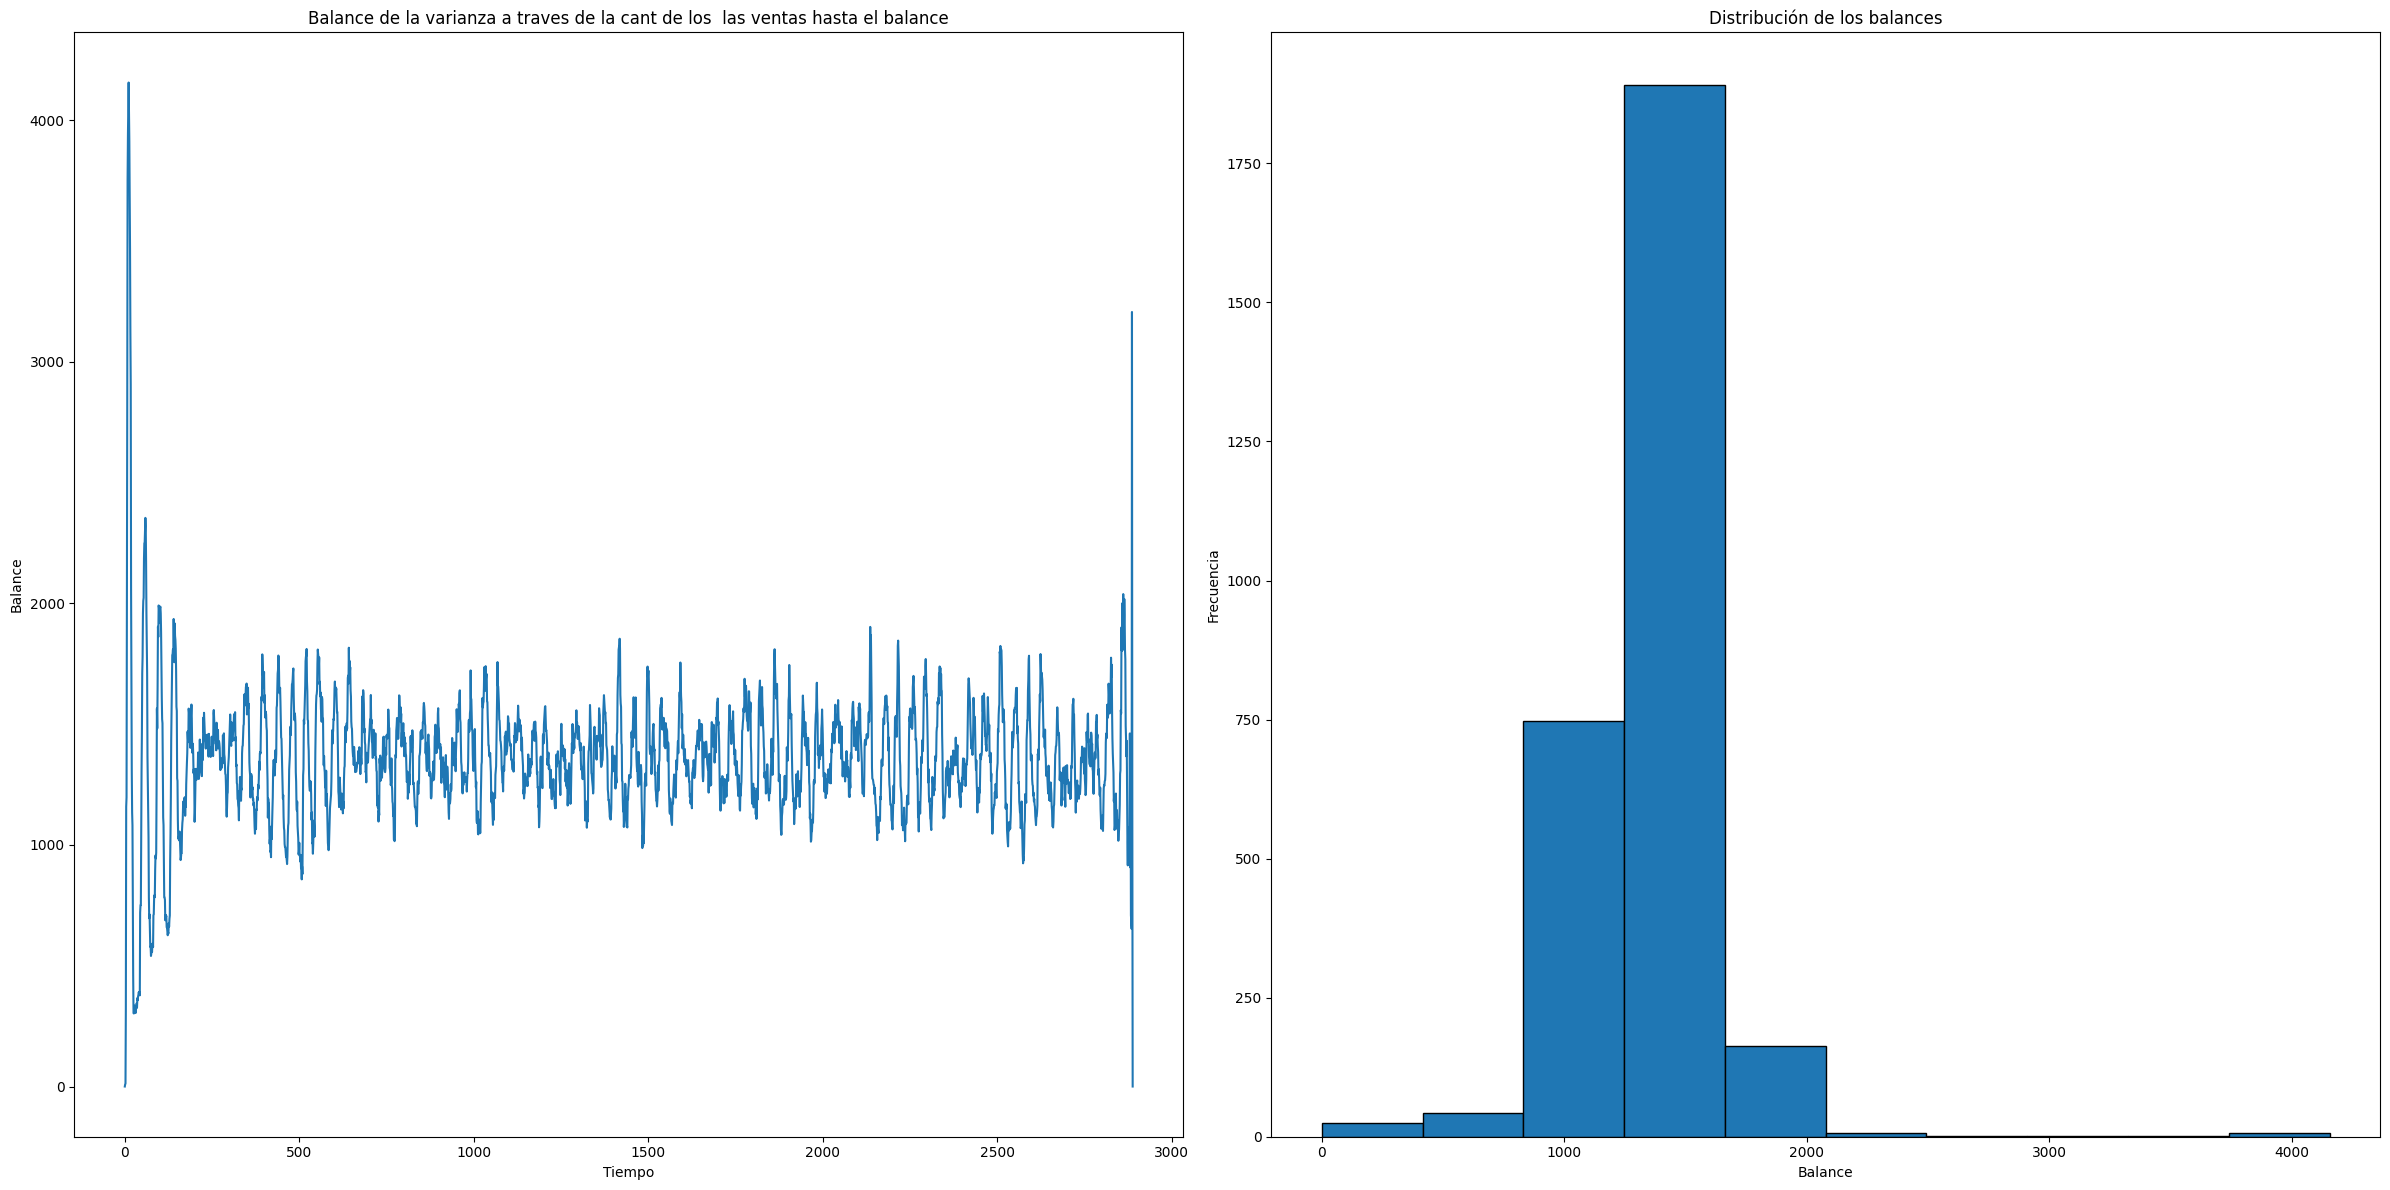



------------------------------------


------------------------------------
Analizar en base a la desviación estándar



------------------------------------
Análisis en base a la desviación estándar de los  las ventas hasta el balance en particiones por índices
 Media: 36.634279695827736
Mediana: 36.74119698044084
Varianza: 14.466334256621291
Desviación estándar: 3.8034634554076225
Mínimo: 0.0
Máximo: 64.4679162236707


------------------------------------


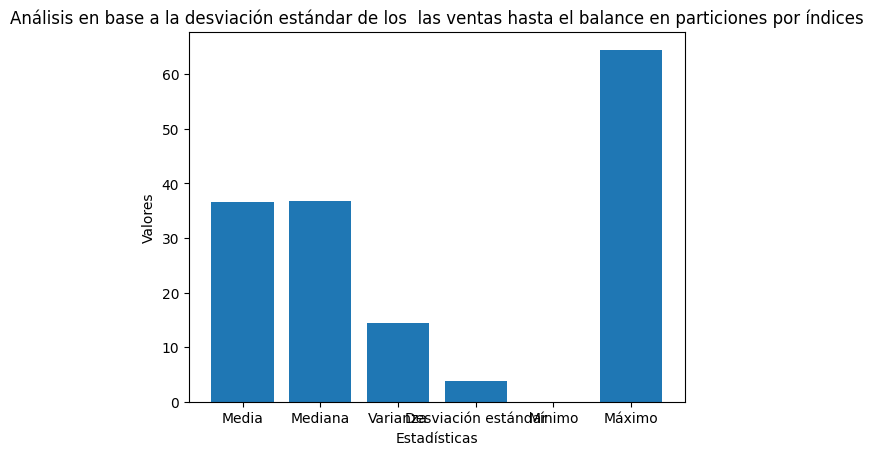

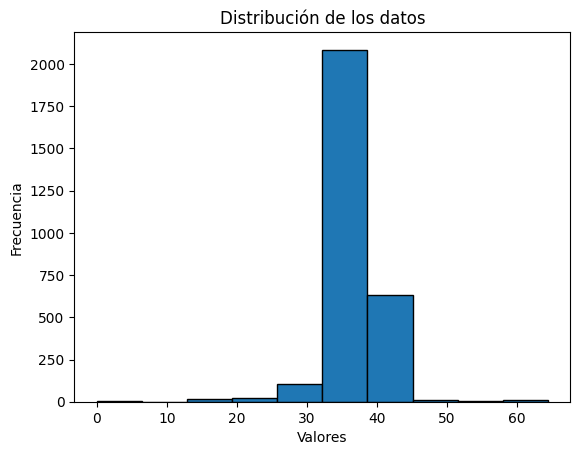

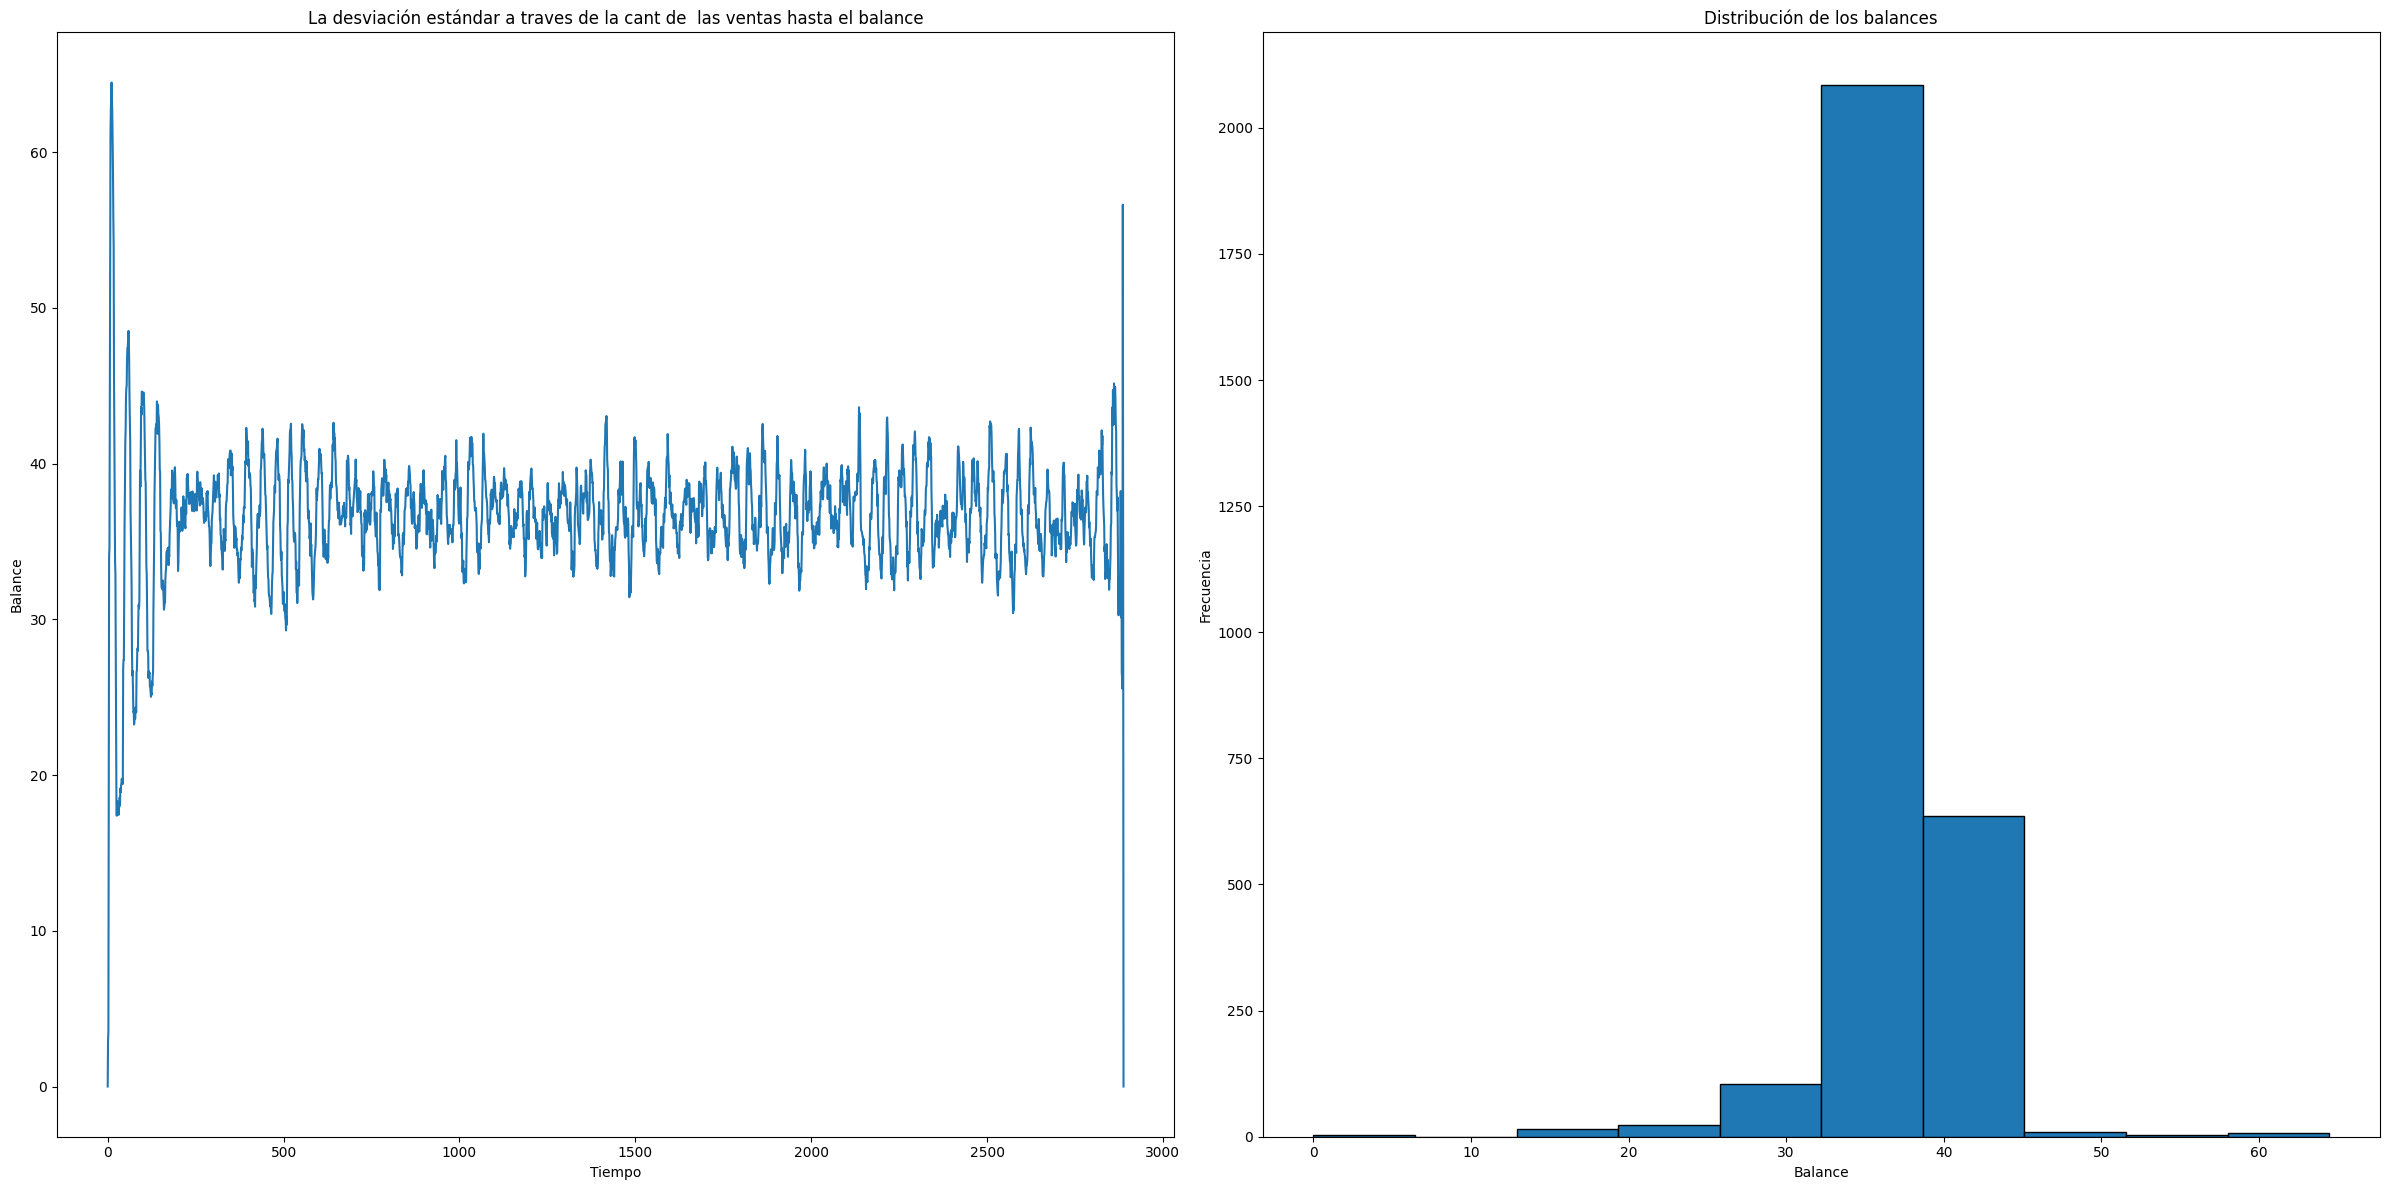



------------------------------------
Analizar en base al mínimo



------------------------------------
Análisis en base al mínimo de los  las ventas hasta el balance en particiones por índices
 Media: 0.39321564555209415
Mediana: 0.0
Varianza: 12.907340611510147
Desviación estándar: 3.5926787515042515
Mínimo: 0
Máximo: 114


------------------------------------


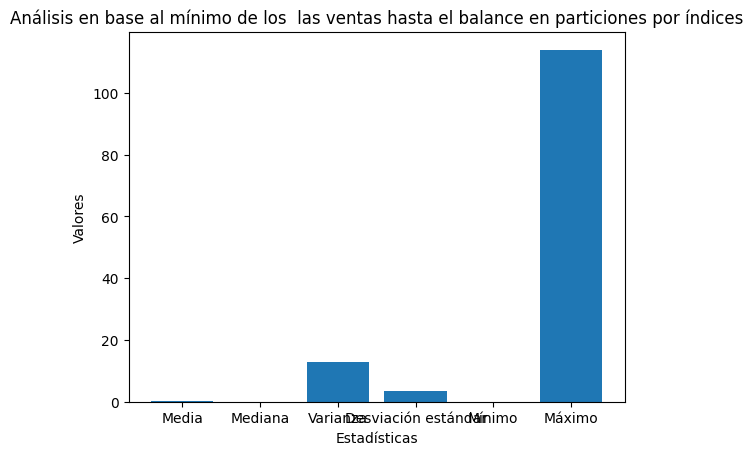

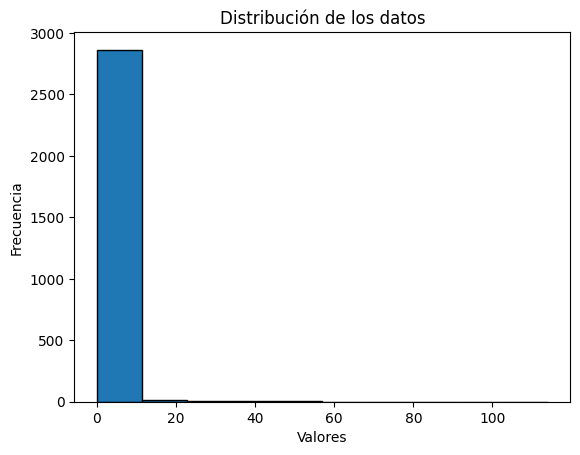

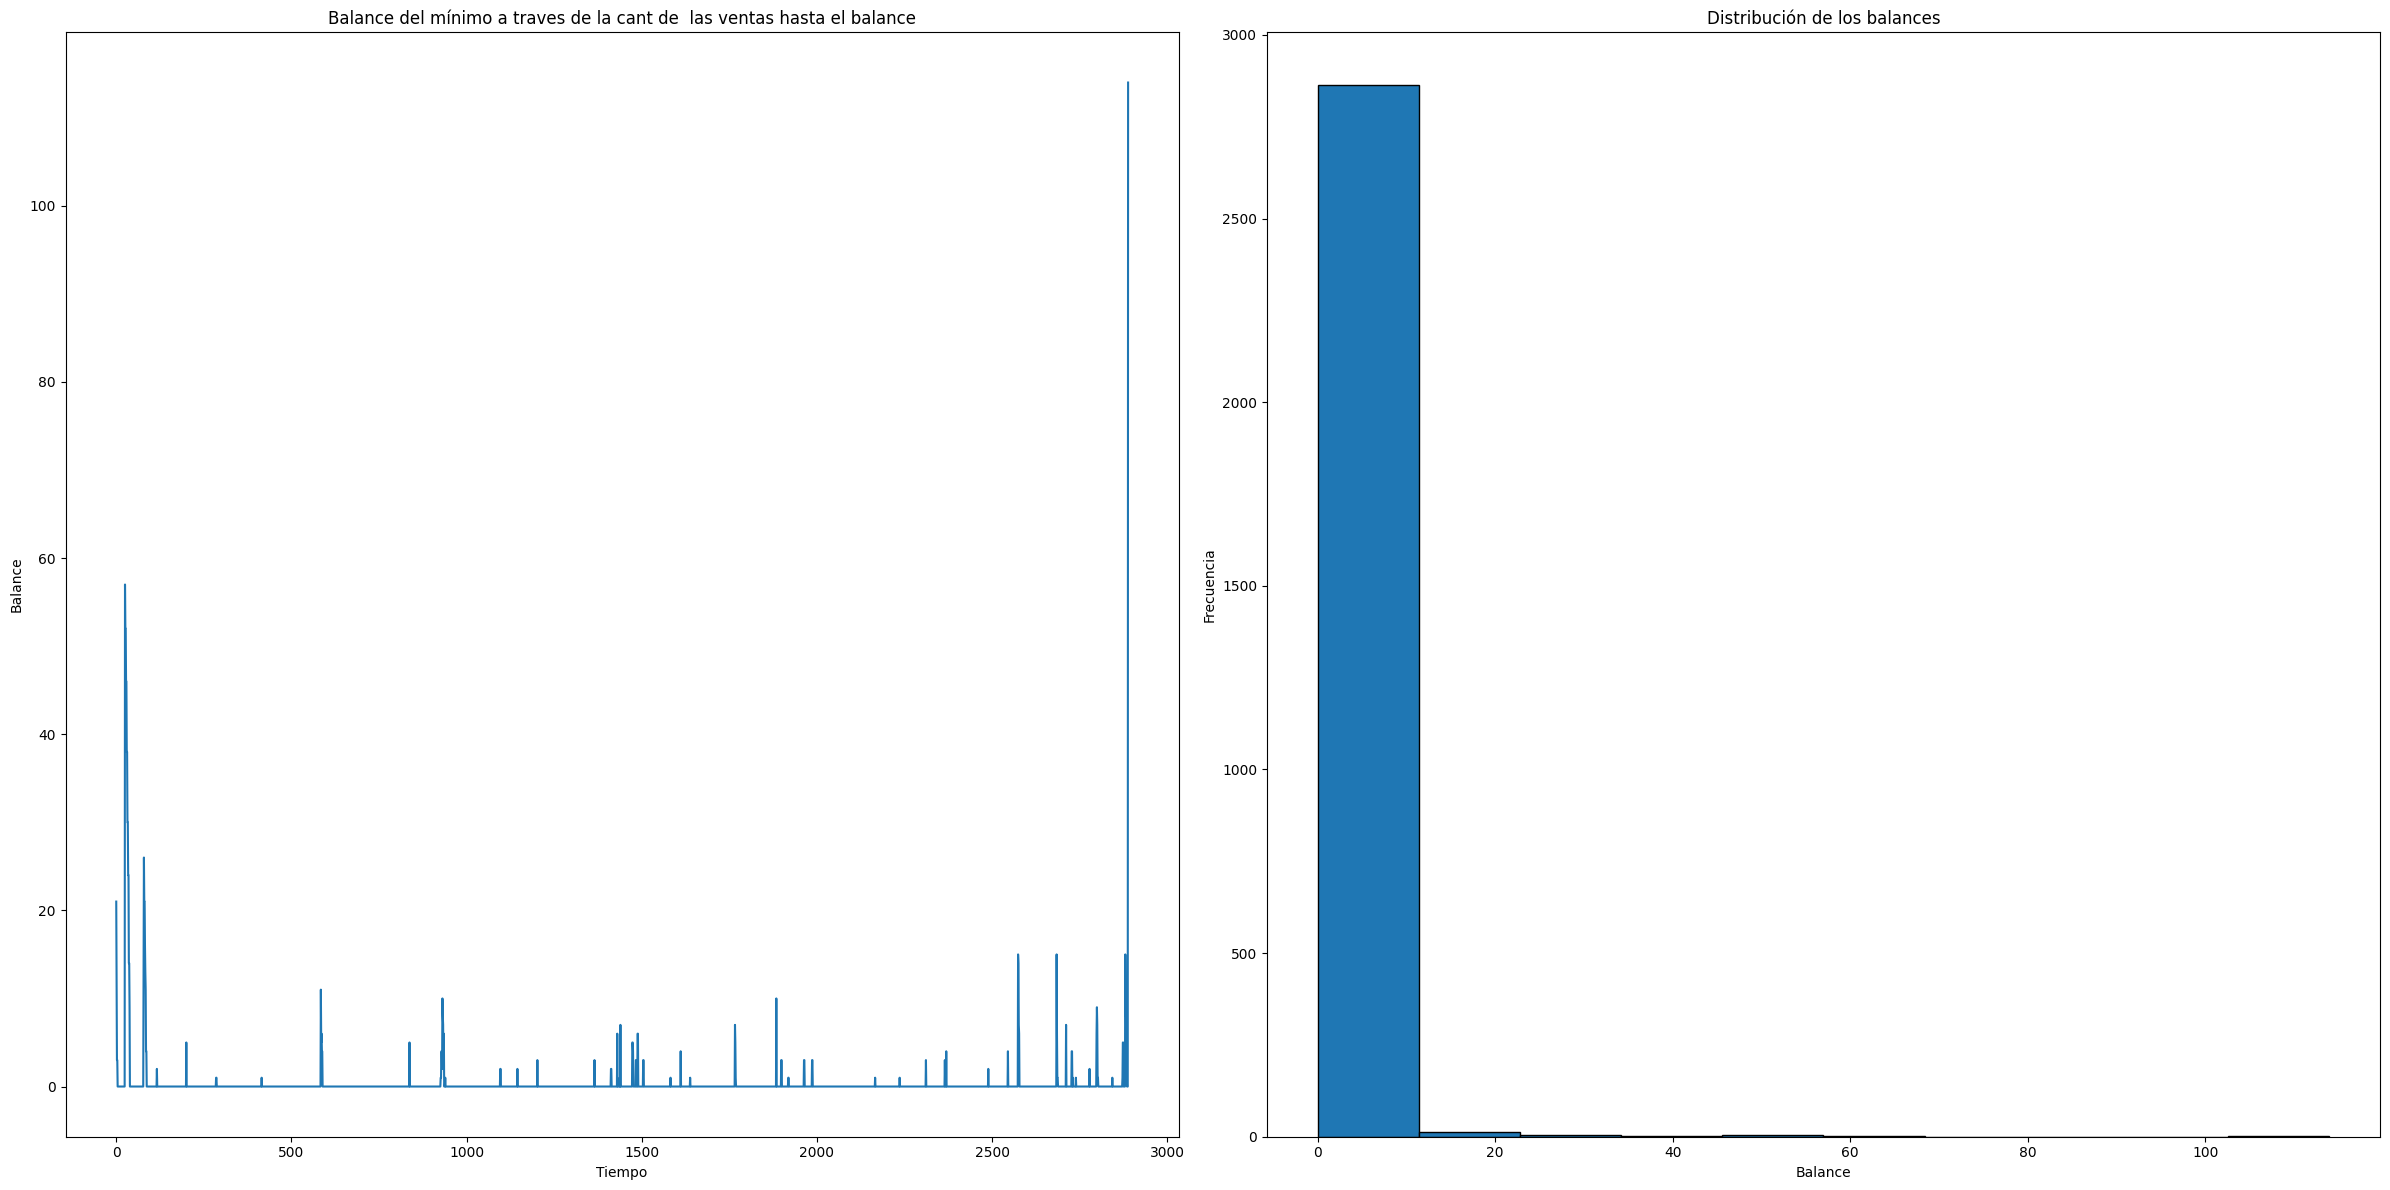



------------------------------------
Analizar en base al máximo



------------------------------------
Análisis en base al máximo de  las ventas hasta el balance en particiones por índices
 Media: 134.0619591554171
Mediana: 135.0
Varianza: 74.77393884083779
Desviación estándar: 8.647192540983333
Mínimo: 20
Máximo: 150


------------------------------------


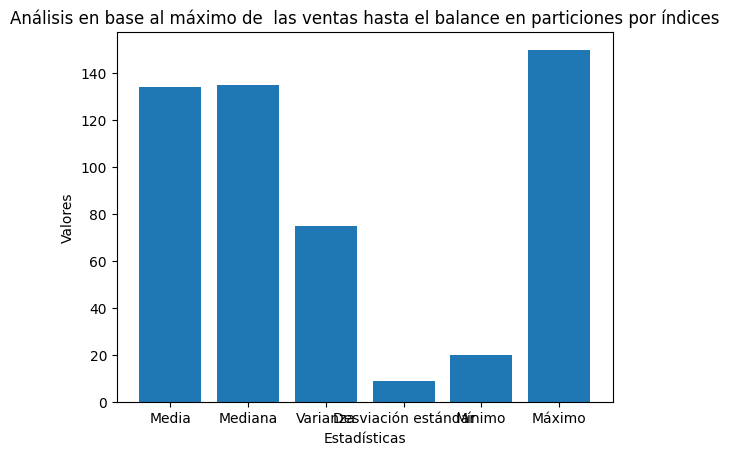

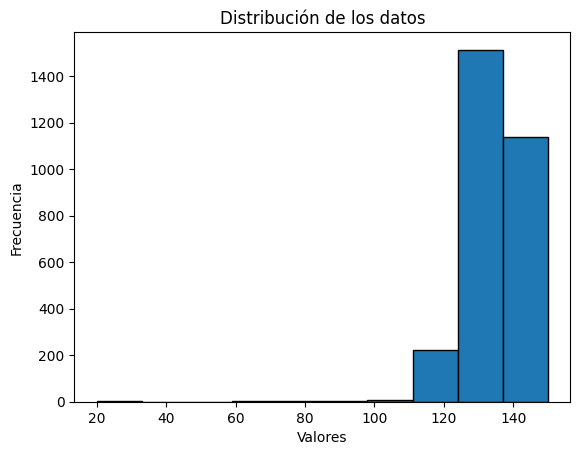

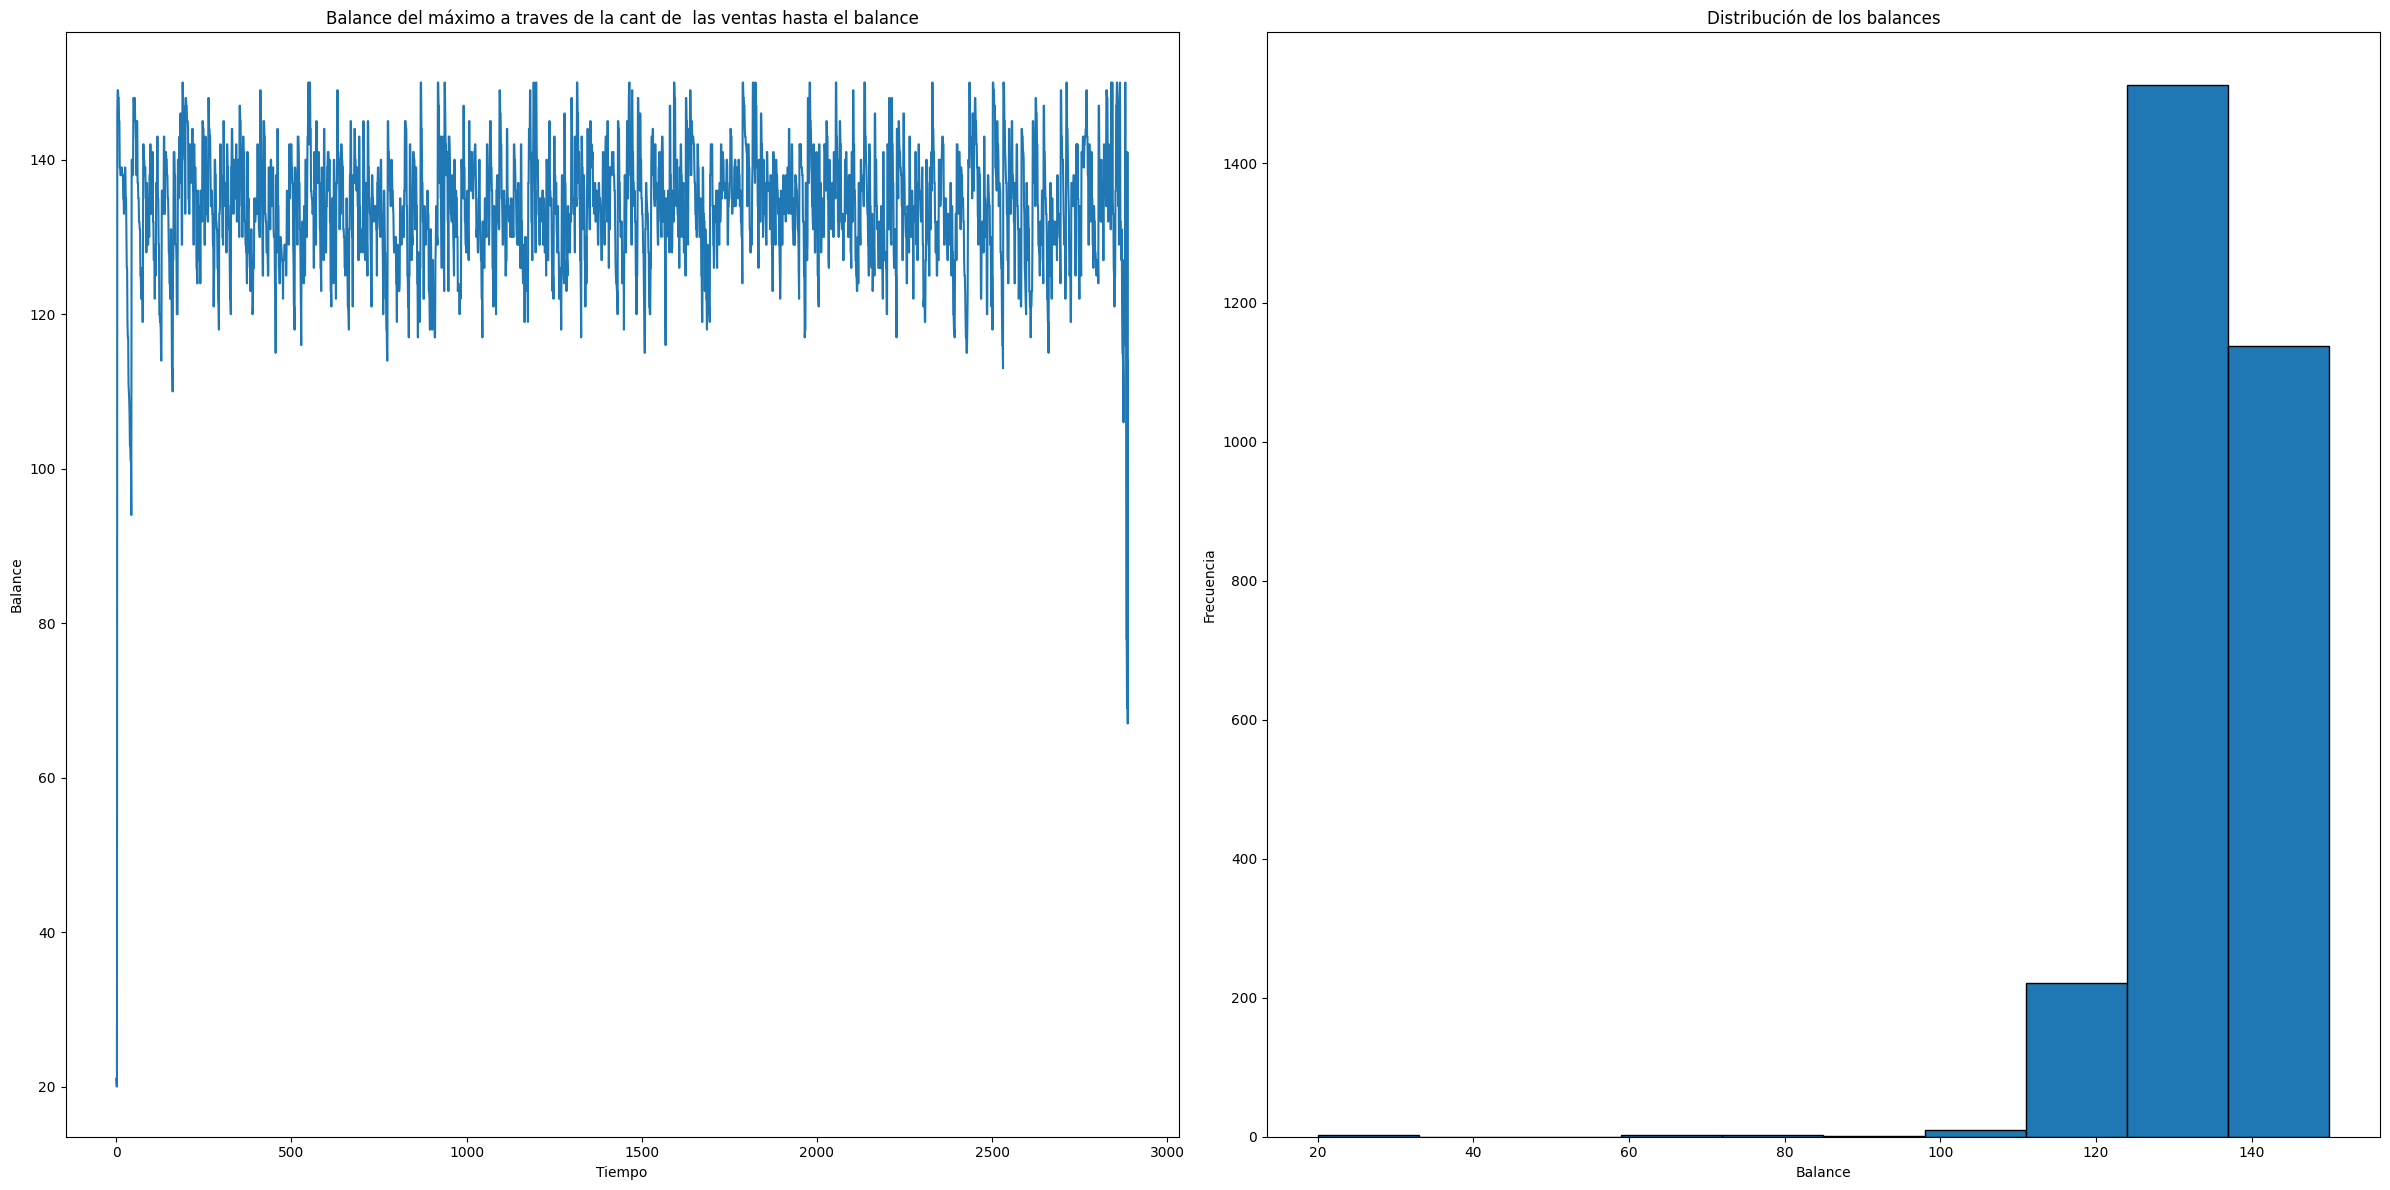



------------------------------------


In [5]:
analysis(lis_by_person)

##### Análisis en base a una cantidad limite de tiempo




------------------------------------
El el balance monetario fue de:
 Media: 7863.842079277607
Mediana: 9102.15524316553
Varianza: 50106398.59000153
Desviación estándar: 7078.587330110545
Mínimo: -6101.086372637891
Máximo: 24006.0098212975


------------------------------------


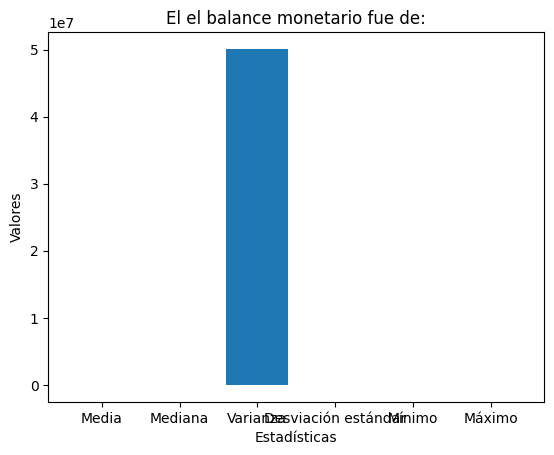

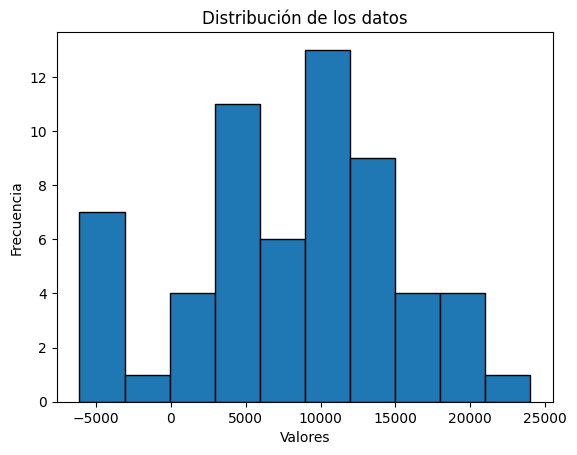




------------------------------------
No pudieron comprar nada:
 Media: 3.7333333333333334
Mediana: 3.0
Varianza: 8.295555555555556
Desviación estándar: 2.88020061029706
Mínimo: 0
Máximo: 11


------------------------------------


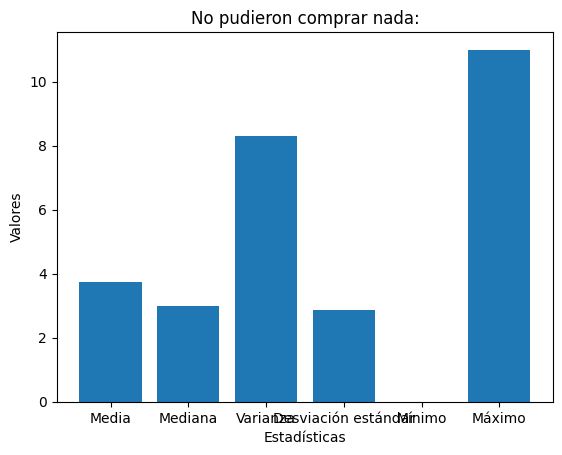

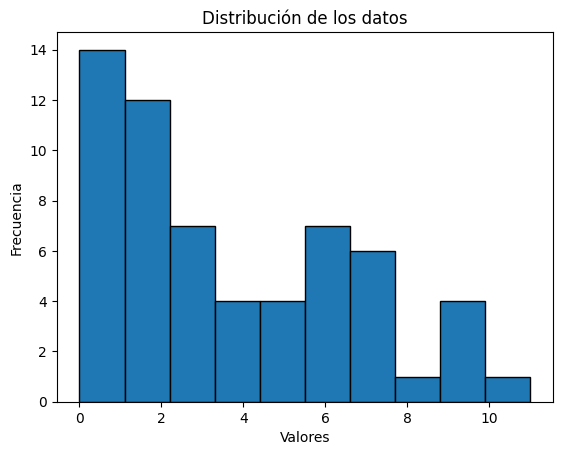




------------------------------------
Se suplió la demanda a:
 Media: 48.55
Mediana: 48.0
Varianza: 32.1475
Desviación estándar: 5.669876541865793
Mínimo: 35
Máximo: 60


------------------------------------


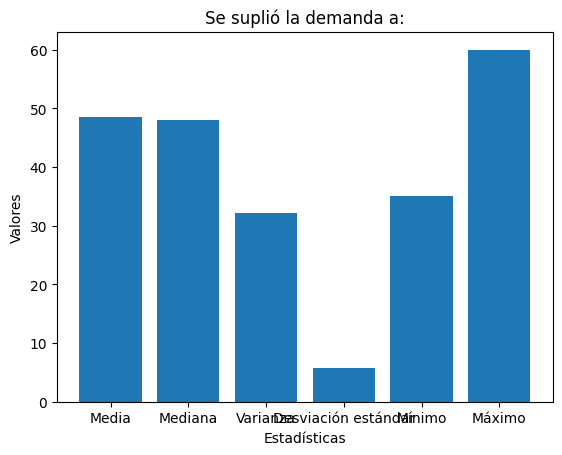

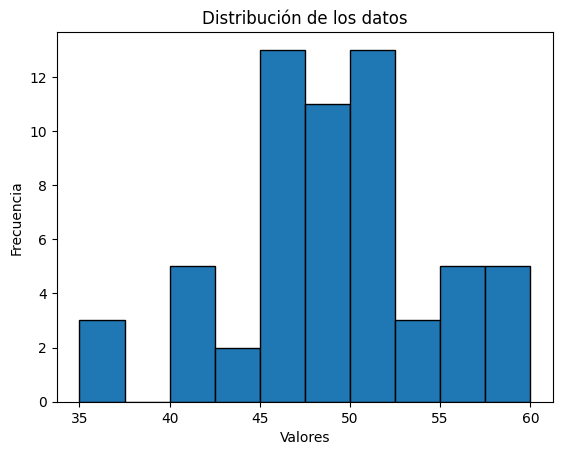




------------------------------------
Fueron suplidos con menos oferta que su demanda
 Media: 1.0833333333333333
Mediana: 1.0
Varianza: 0.6097222222222223
Desviación estándar: 0.7808471183414986
Mínimo: 0
Máximo: 3


------------------------------------


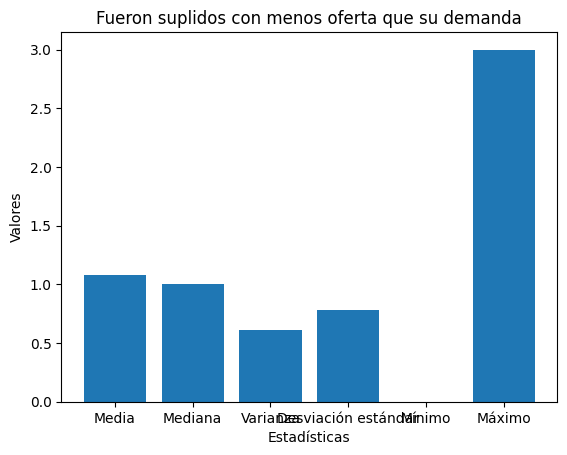

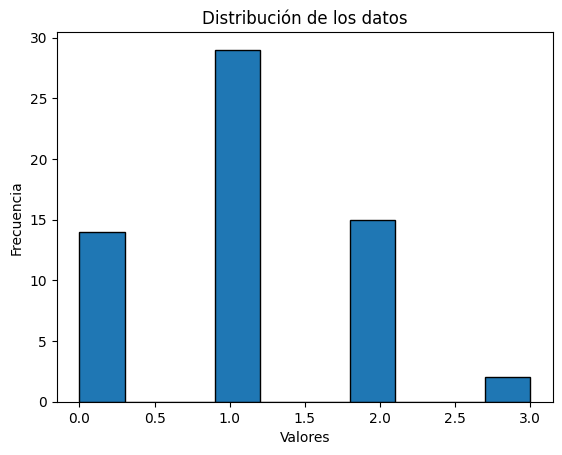



------------------------------------
Analizar en base a la mediana



------------------------------------
Análisis en base a la mediana de  los balances en particiones por índices :
 Media: 3974.049290330808
Mediana: 5877.118999306727
Varianza: 80386204.80671583
Desviación estándar: 8965.835421572037
Mínimo: -16122.286171935692
Máximo: 18740.920871833383


------------------------------------


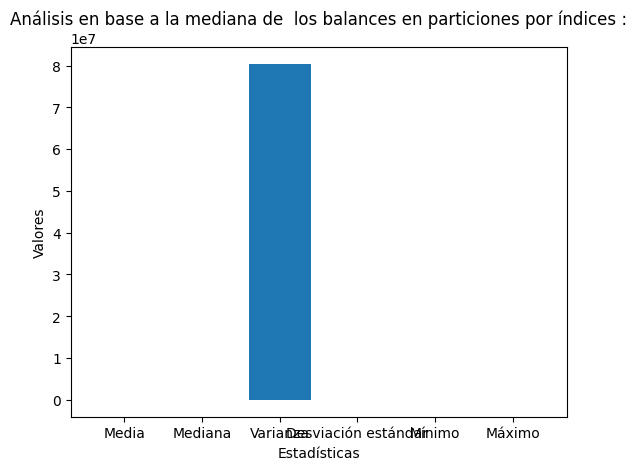

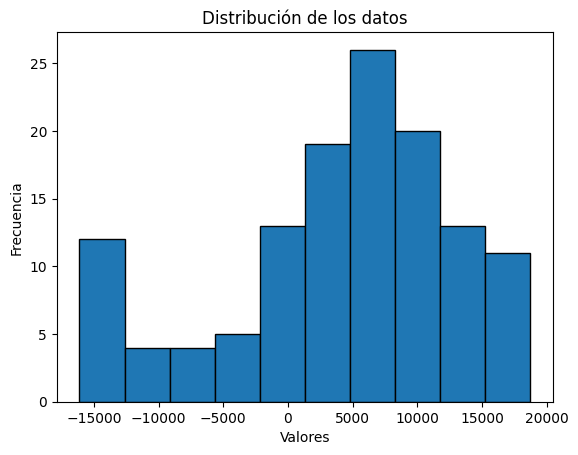

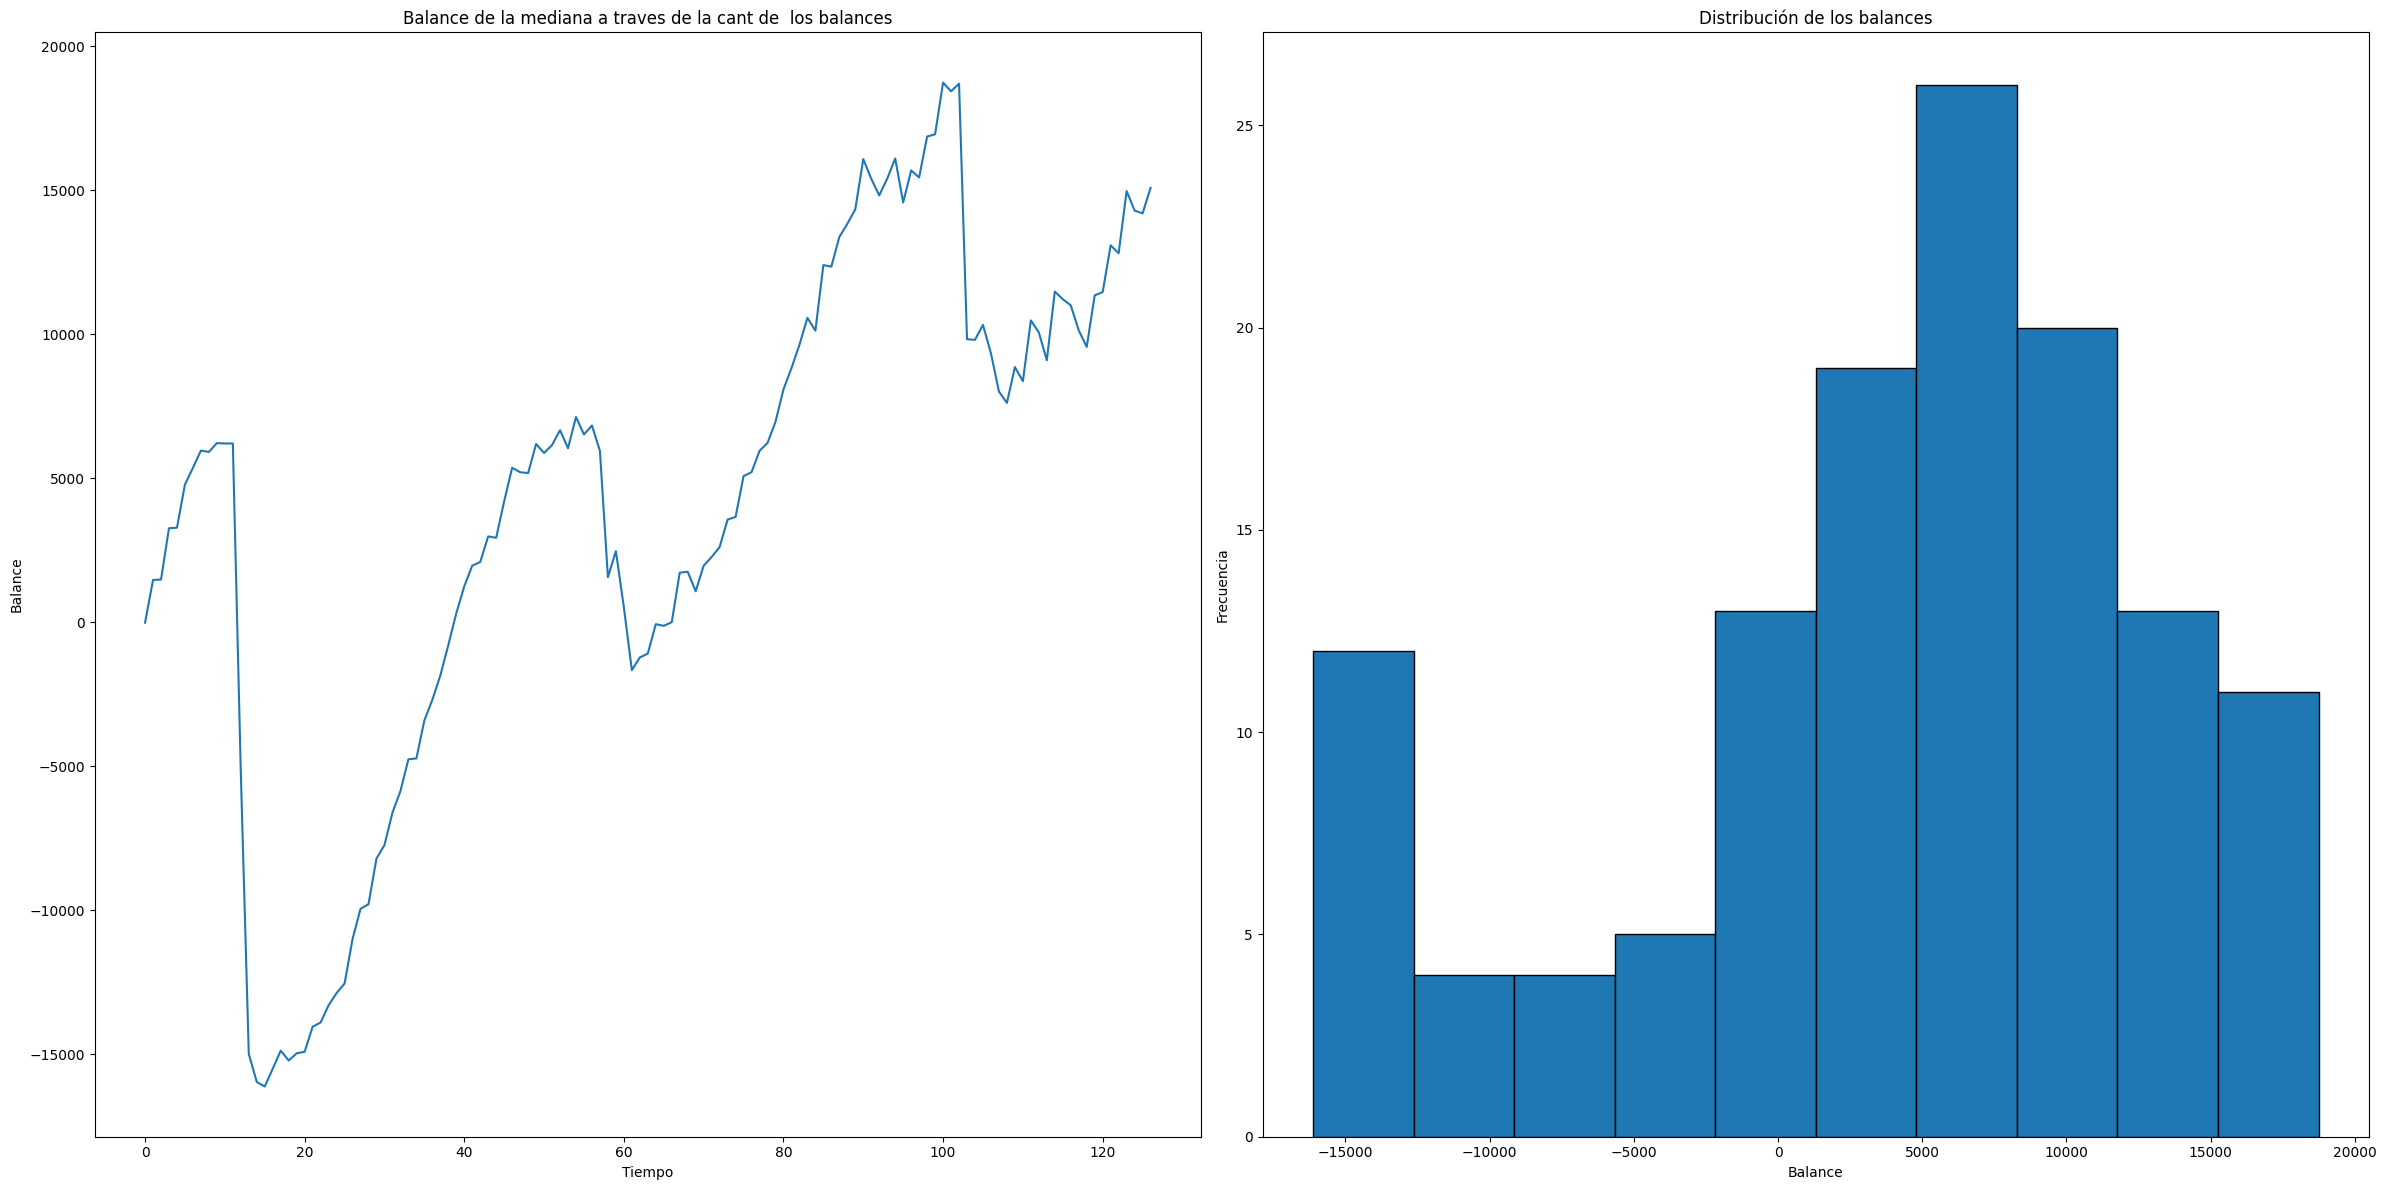



------------------------------------
Analizar en base al promedio



------------------------------------
Análisis en base al promedio de los  los balances en particiones por índices
 Media: 3996.450438248318
Mediana: 4101.178338227129
Varianza: 68057479.36120161
Desviación estándar: 8249.695713249163
Mínimo: -13099.390852438262
Máximo: 16889.980656301595


------------------------------------


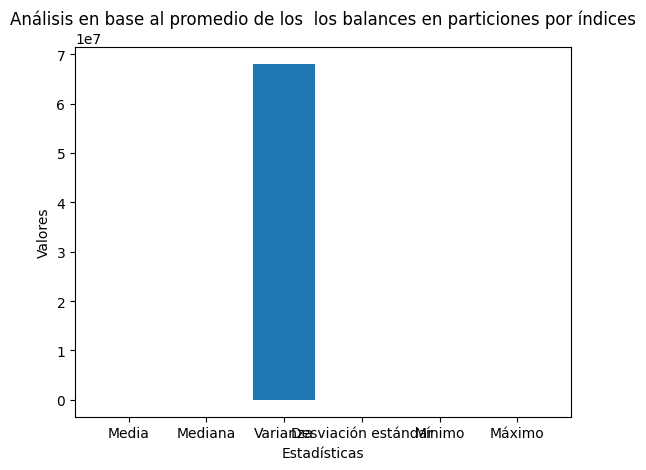

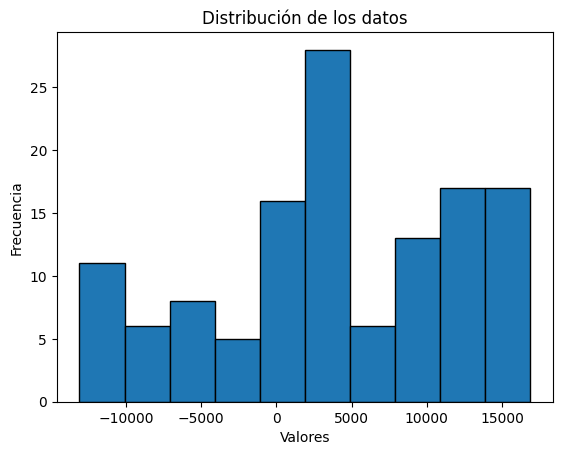

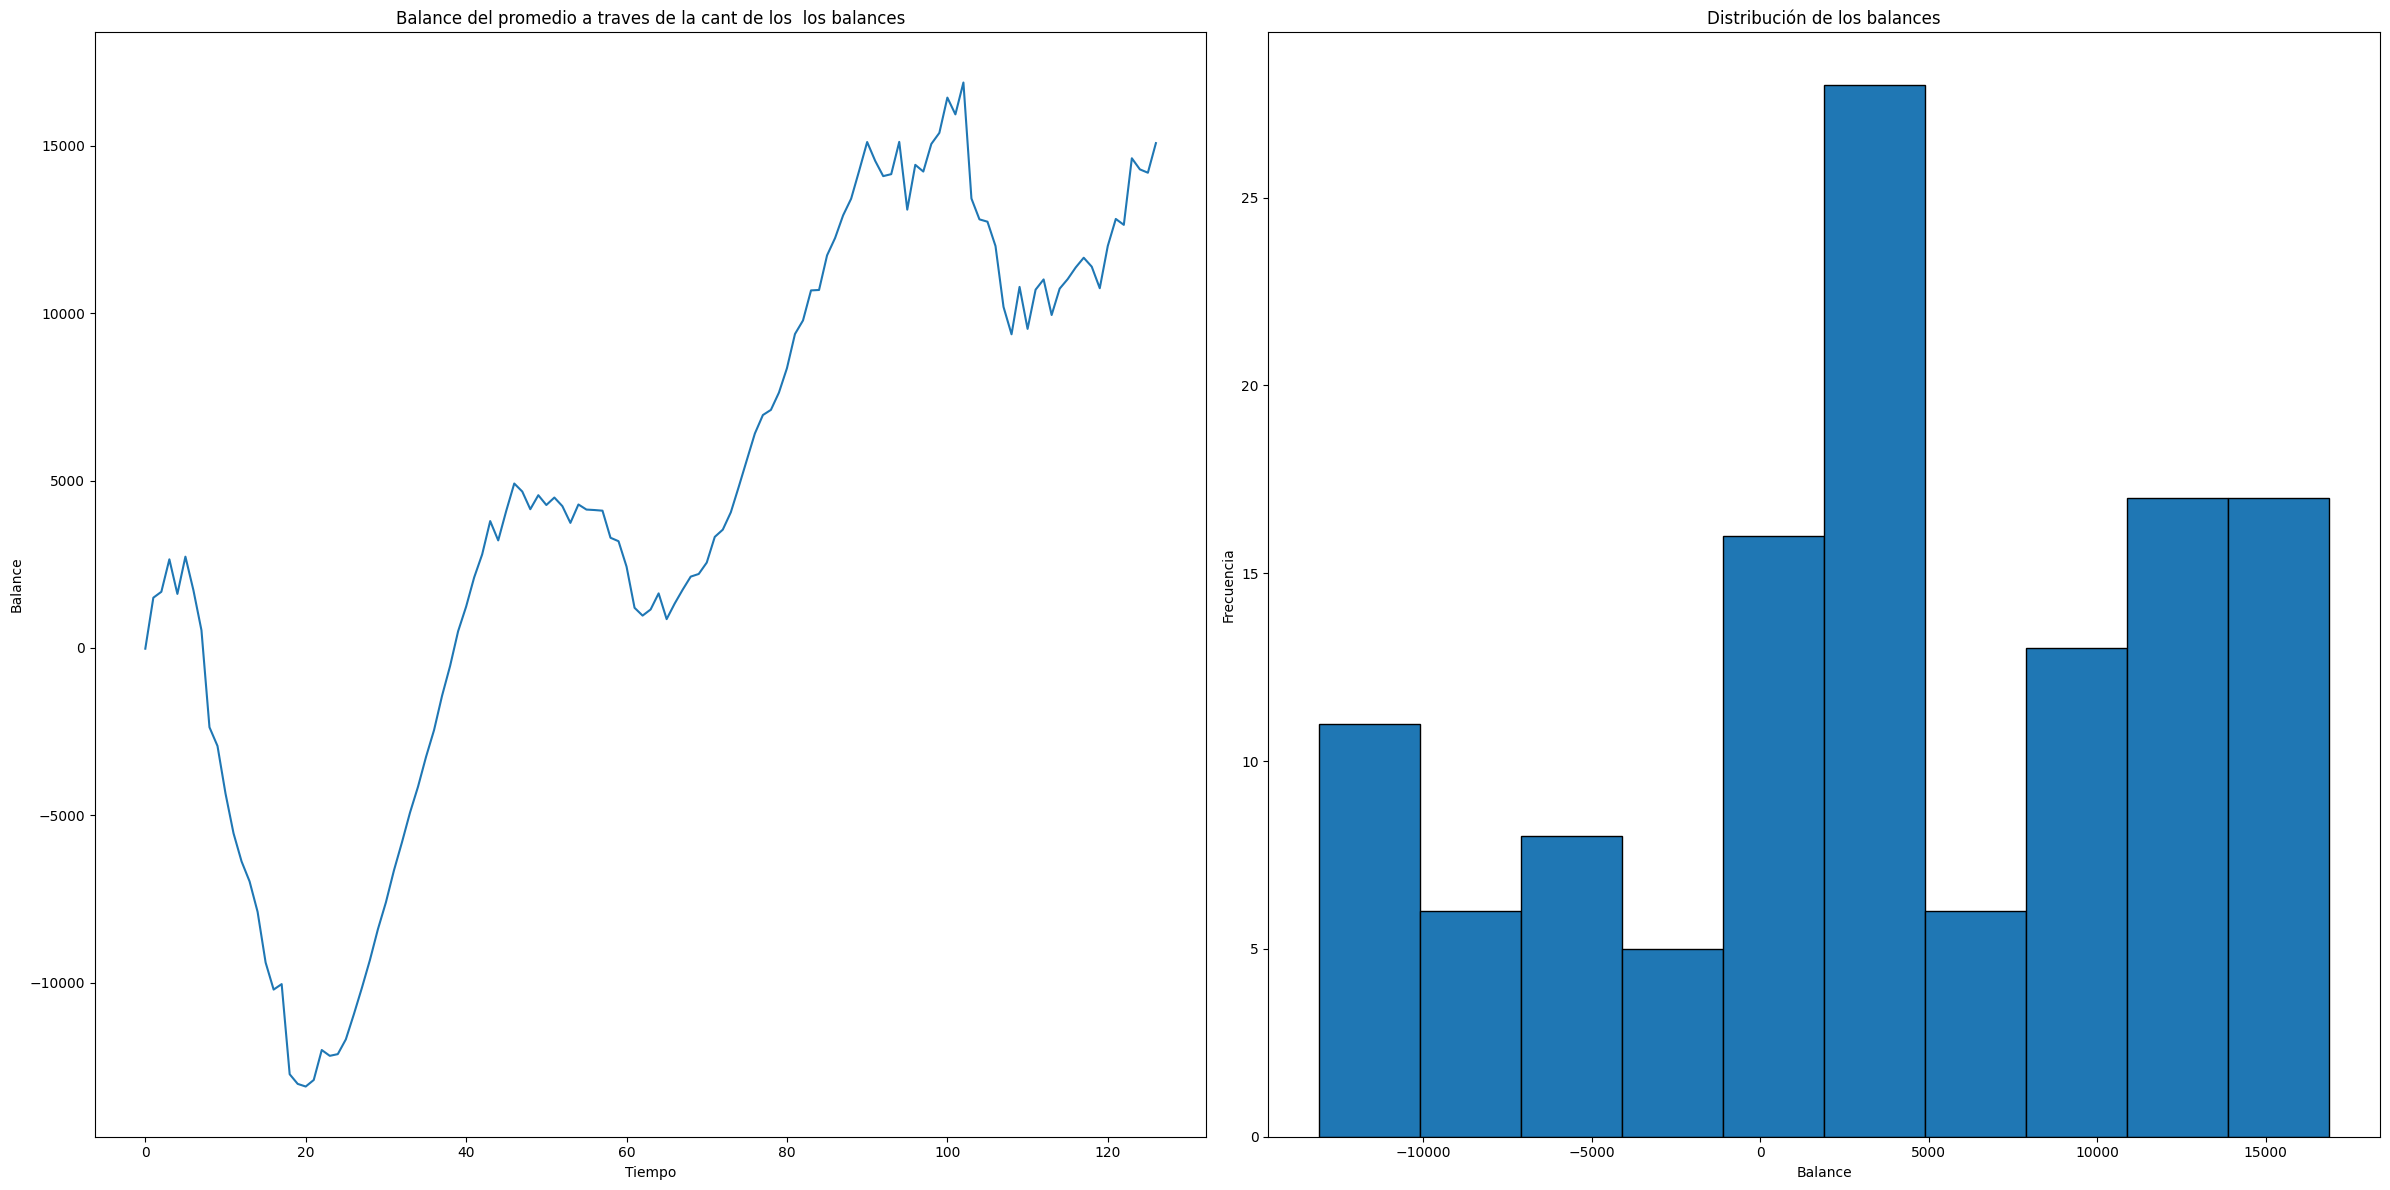



------------------------------------
Analizar en base a la varianza



------------------------------------
Análisis en base a la varianza de los  los balances en particiones por índices
 Media: 54821198.260462
Mediana: 44918028.96143736
Varianza: 1407218551463686.2
Desviación estándar: 37512911.79665591
Mínimo: 0.0
Máximo: 168004016.96787444


------------------------------------


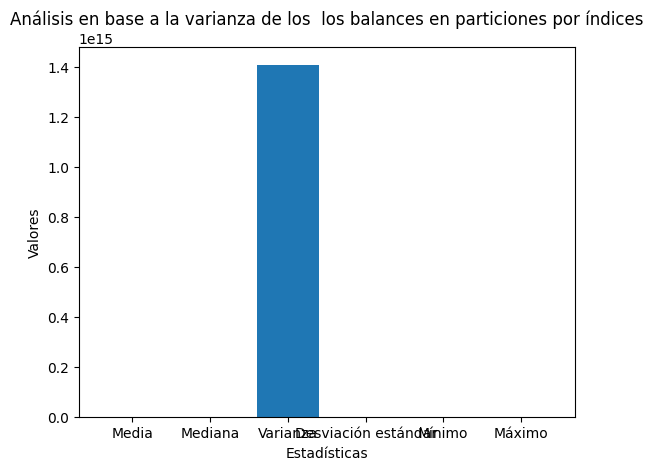

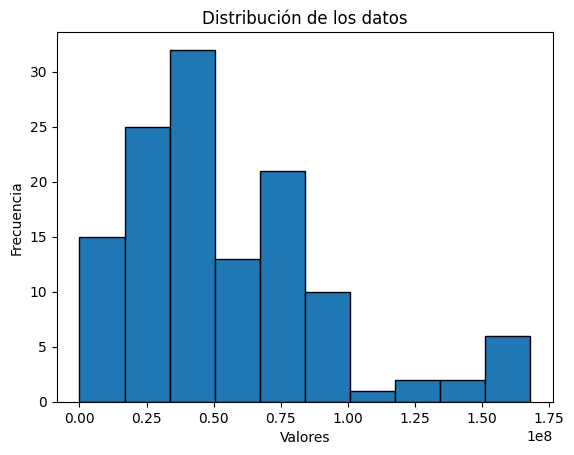

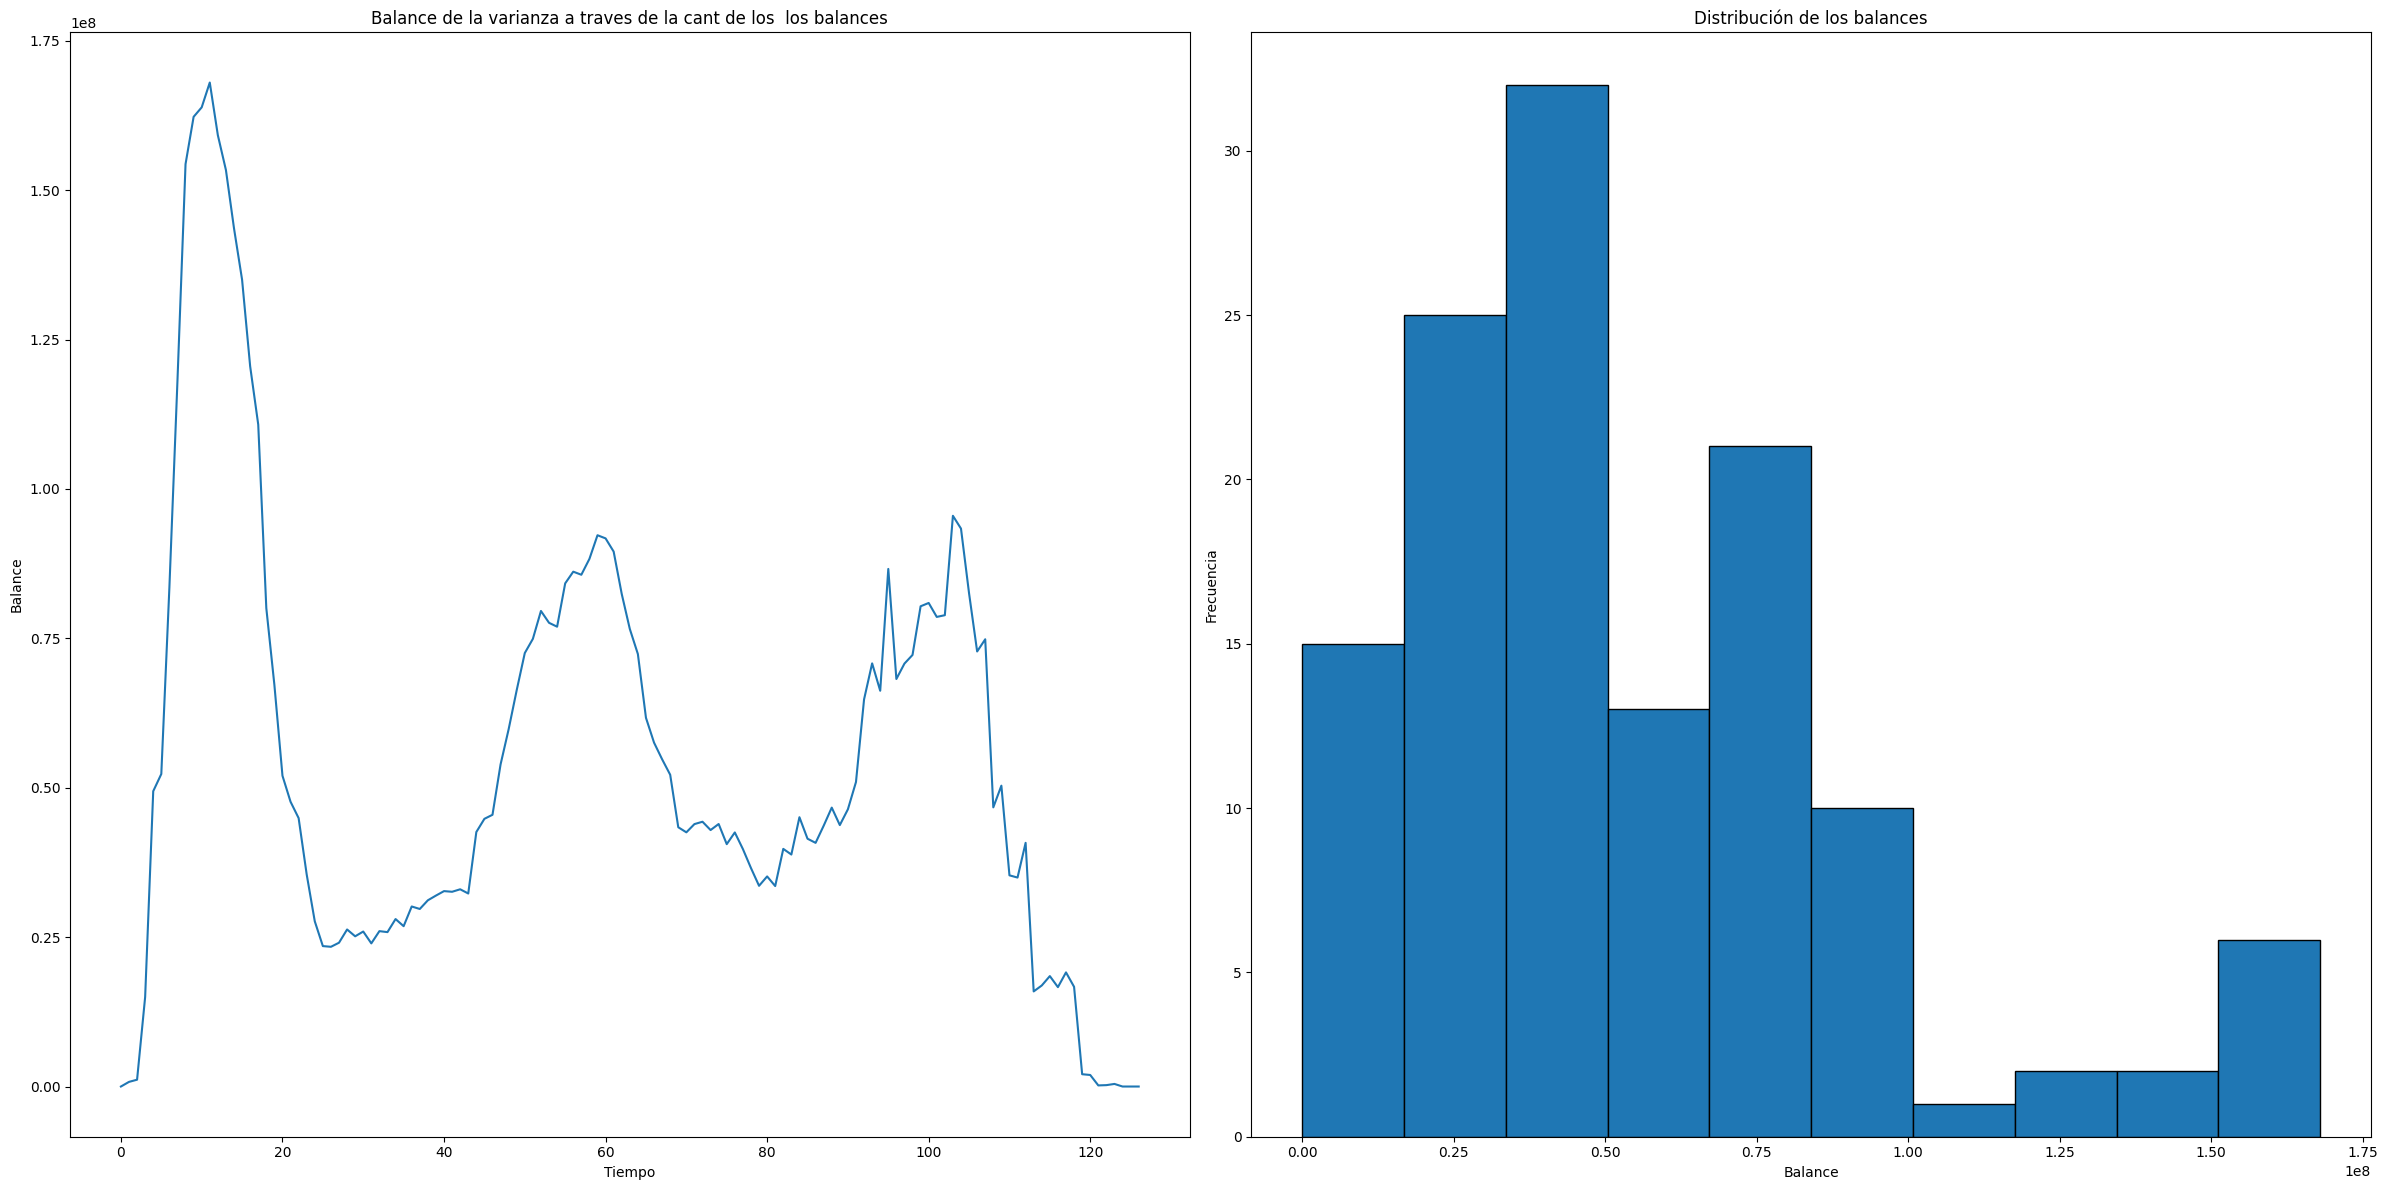



------------------------------------


------------------------------------
Analizar en base a la desviación estándar



------------------------------------
Análisis en base a la desviación estándar de los  los balances en particiones por índices
 Media: 6851.207882630729
Mediana: 6702.091387129644
Varianza: 7882148.809440552
Desviación estándar: 2807.5164842687127
Mínimo: 0.0
Máximo: 12961.63635378938


------------------------------------


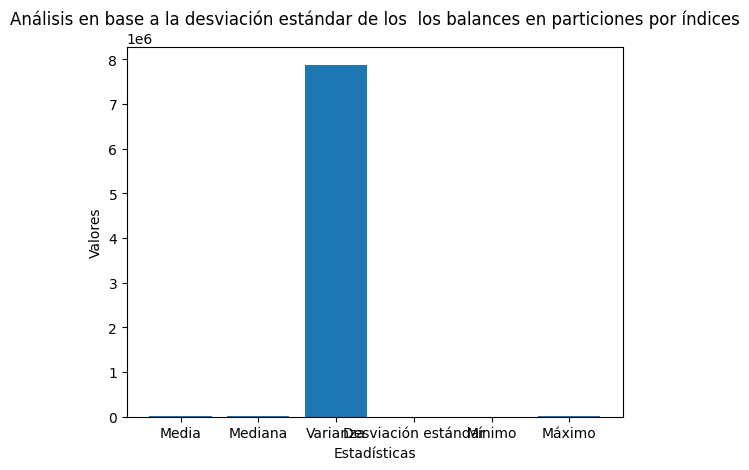

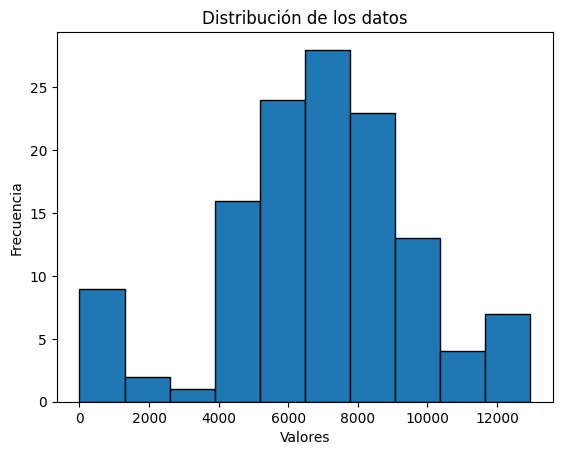

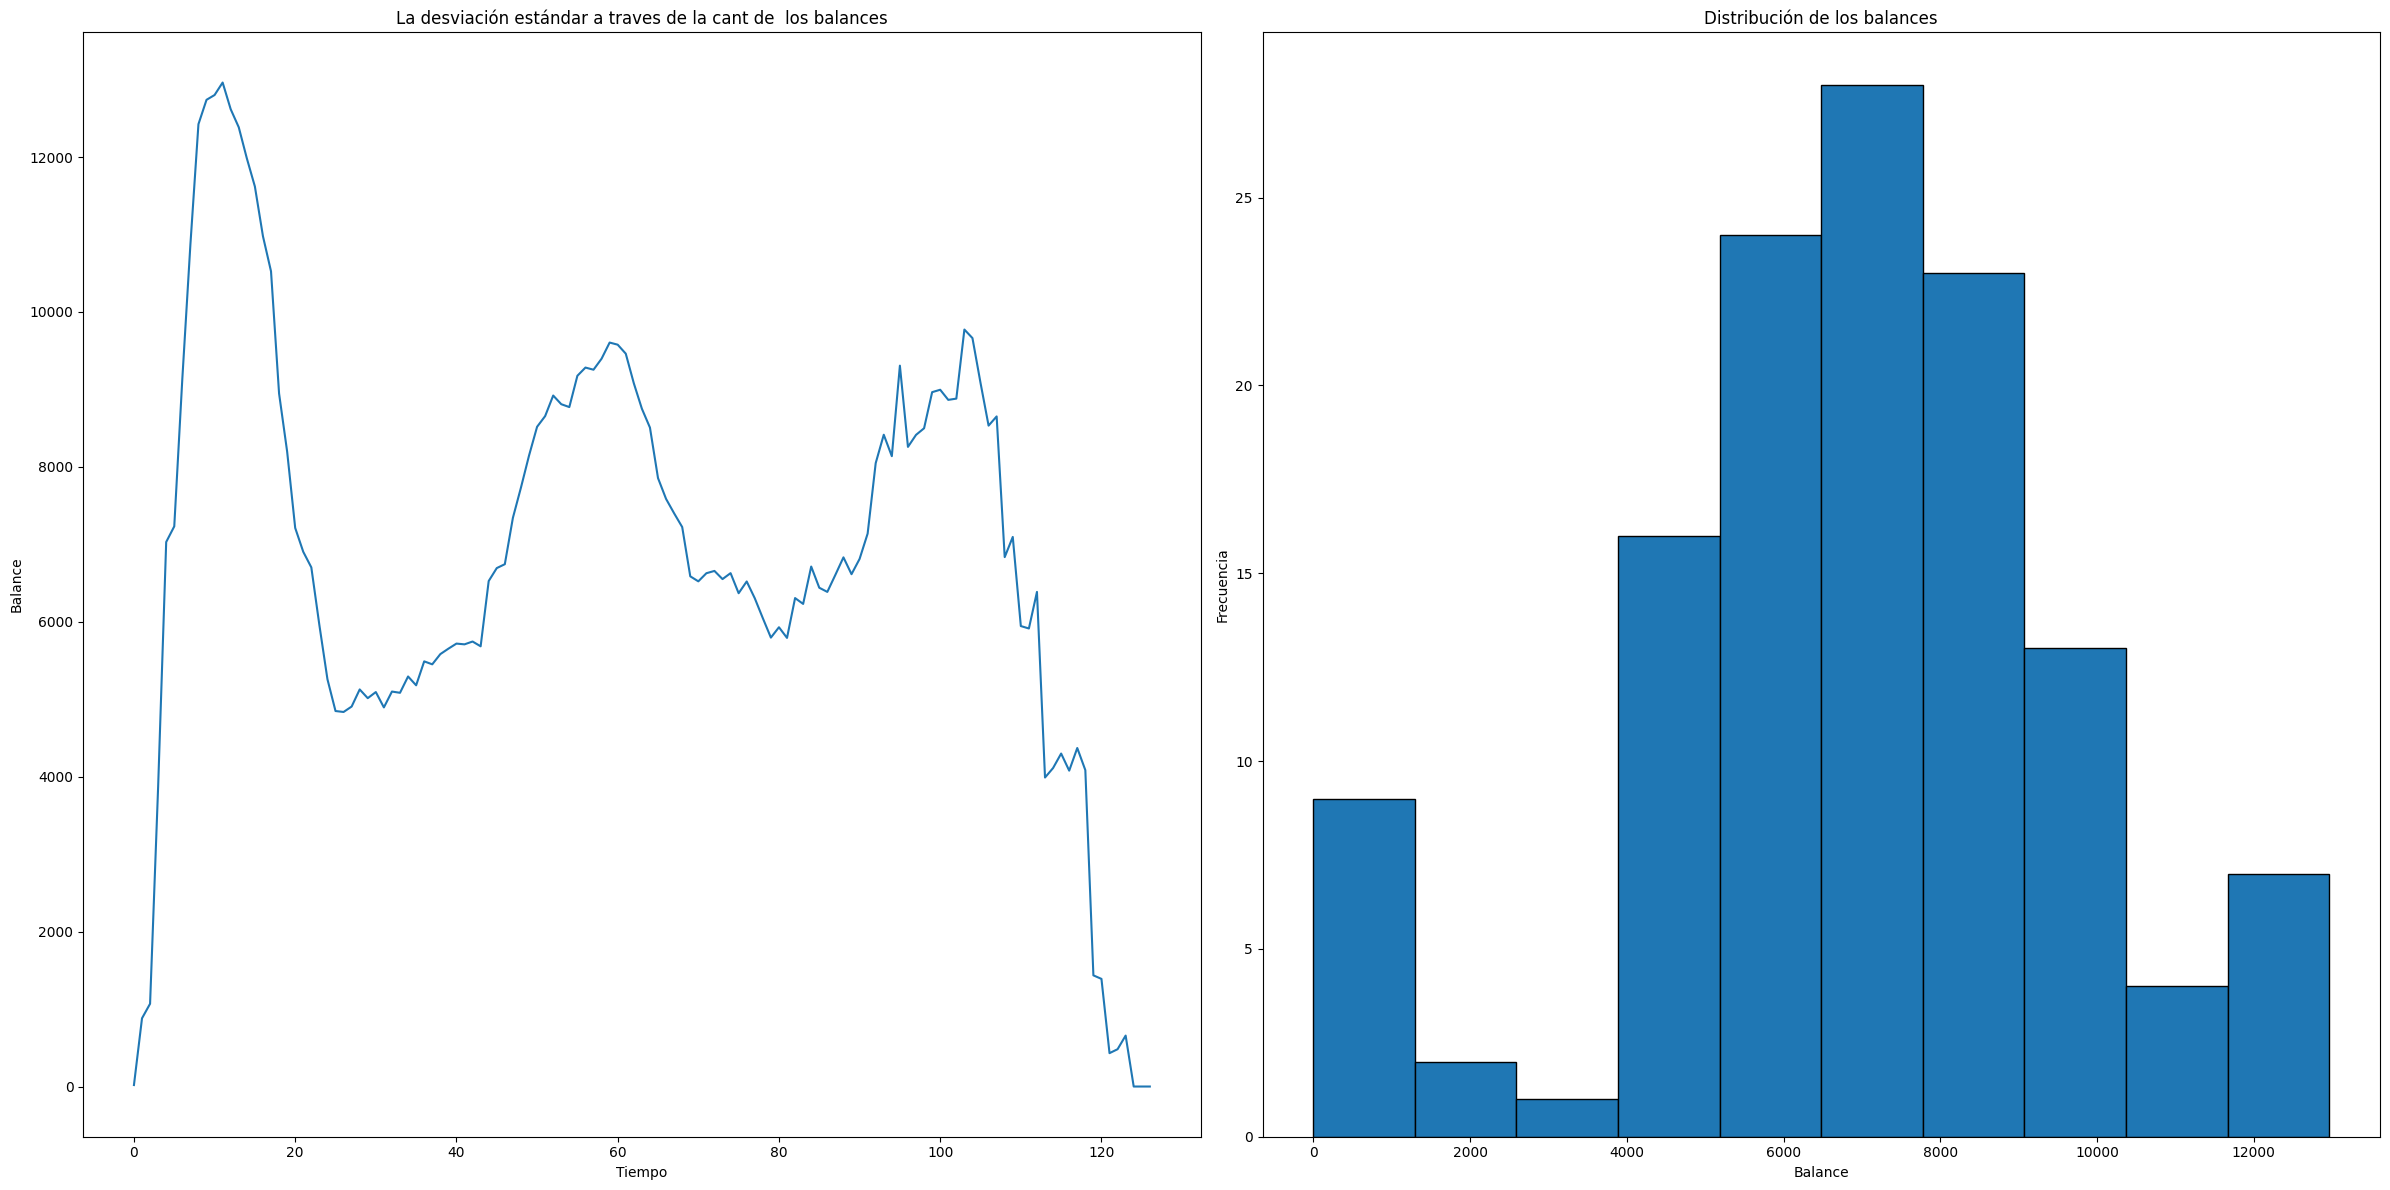



------------------------------------
Analizar en base al mínimo



------------------------------------
Análisis en base al mínimo de los  los balances en particiones por índices
 Media: -8953.458035314688
Mediana: -10089.532076034417
Varianza: 103456491.70958103
Desviación estándar: 10171.356434103616
Mínimo: -25624.58982146286
Máximo: 15080.759448071793


------------------------------------


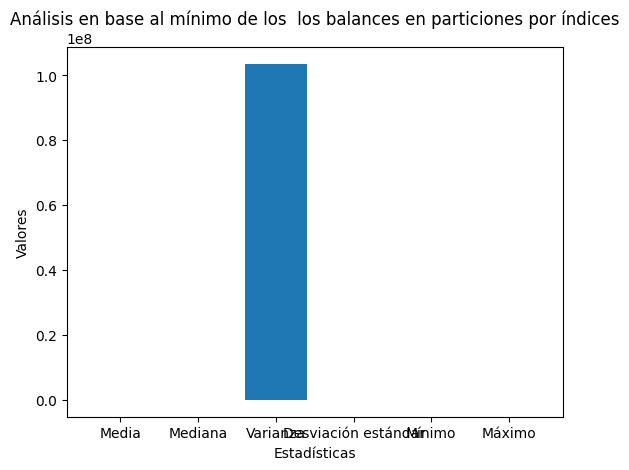

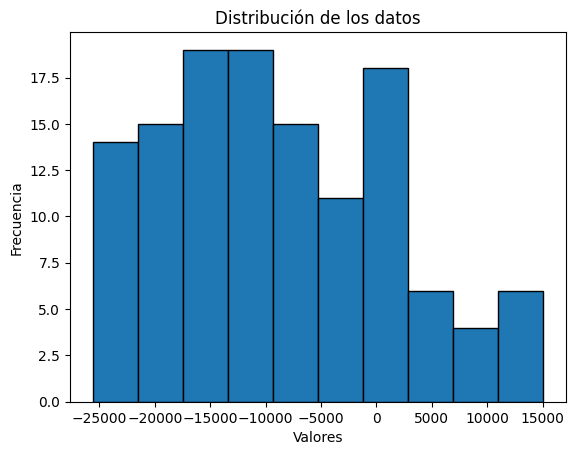

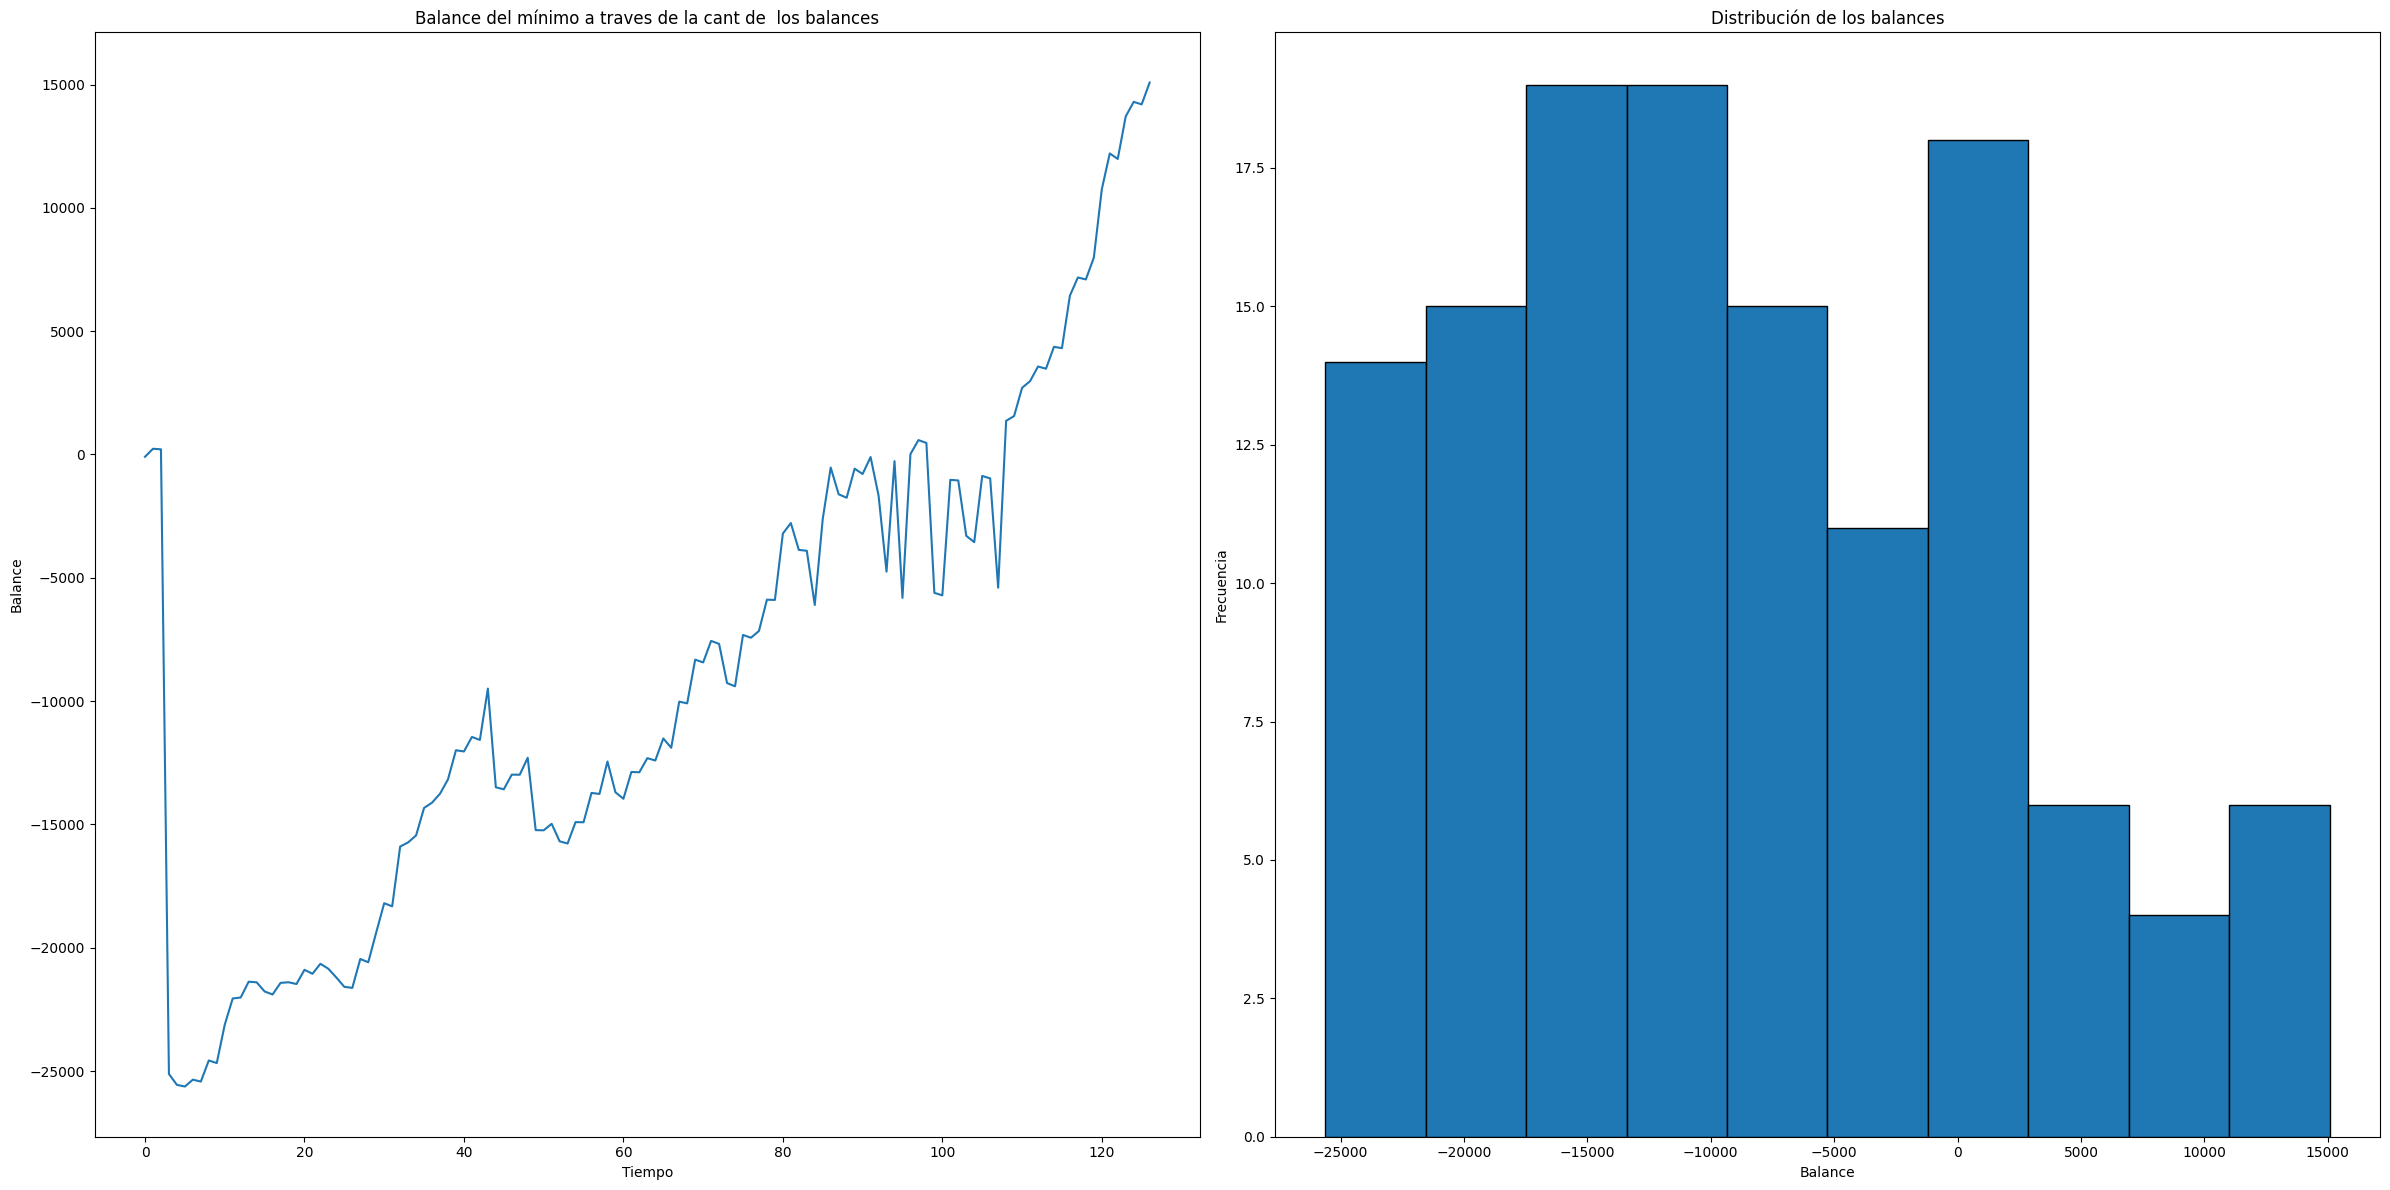



------------------------------------
Analizar en base al máximo



------------------------------------
Análisis en base al máximo de  los balances en particiones por índices
 Media: 16777.34709409224
Mediana: 18000.249368435292
Varianza: 63825255.84469761
Desviación estándar: 7989.07102513788
Mínimo: -0.4595395116482045
Máximo: 28371.714515134245


------------------------------------


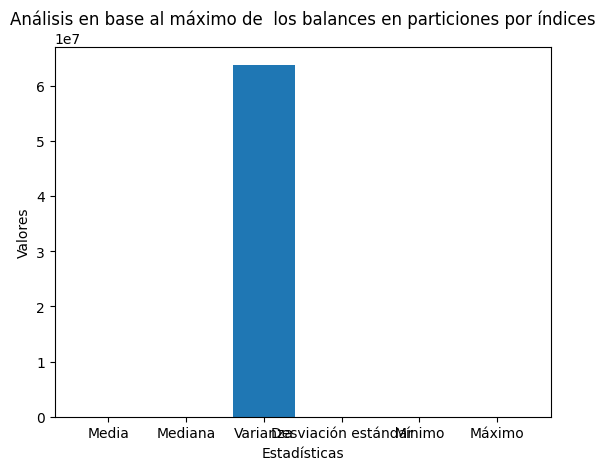

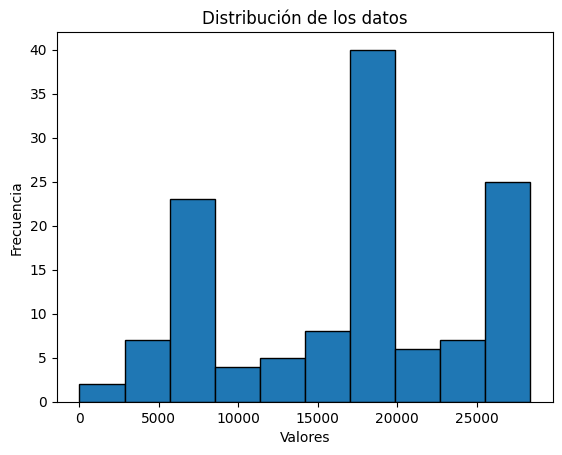

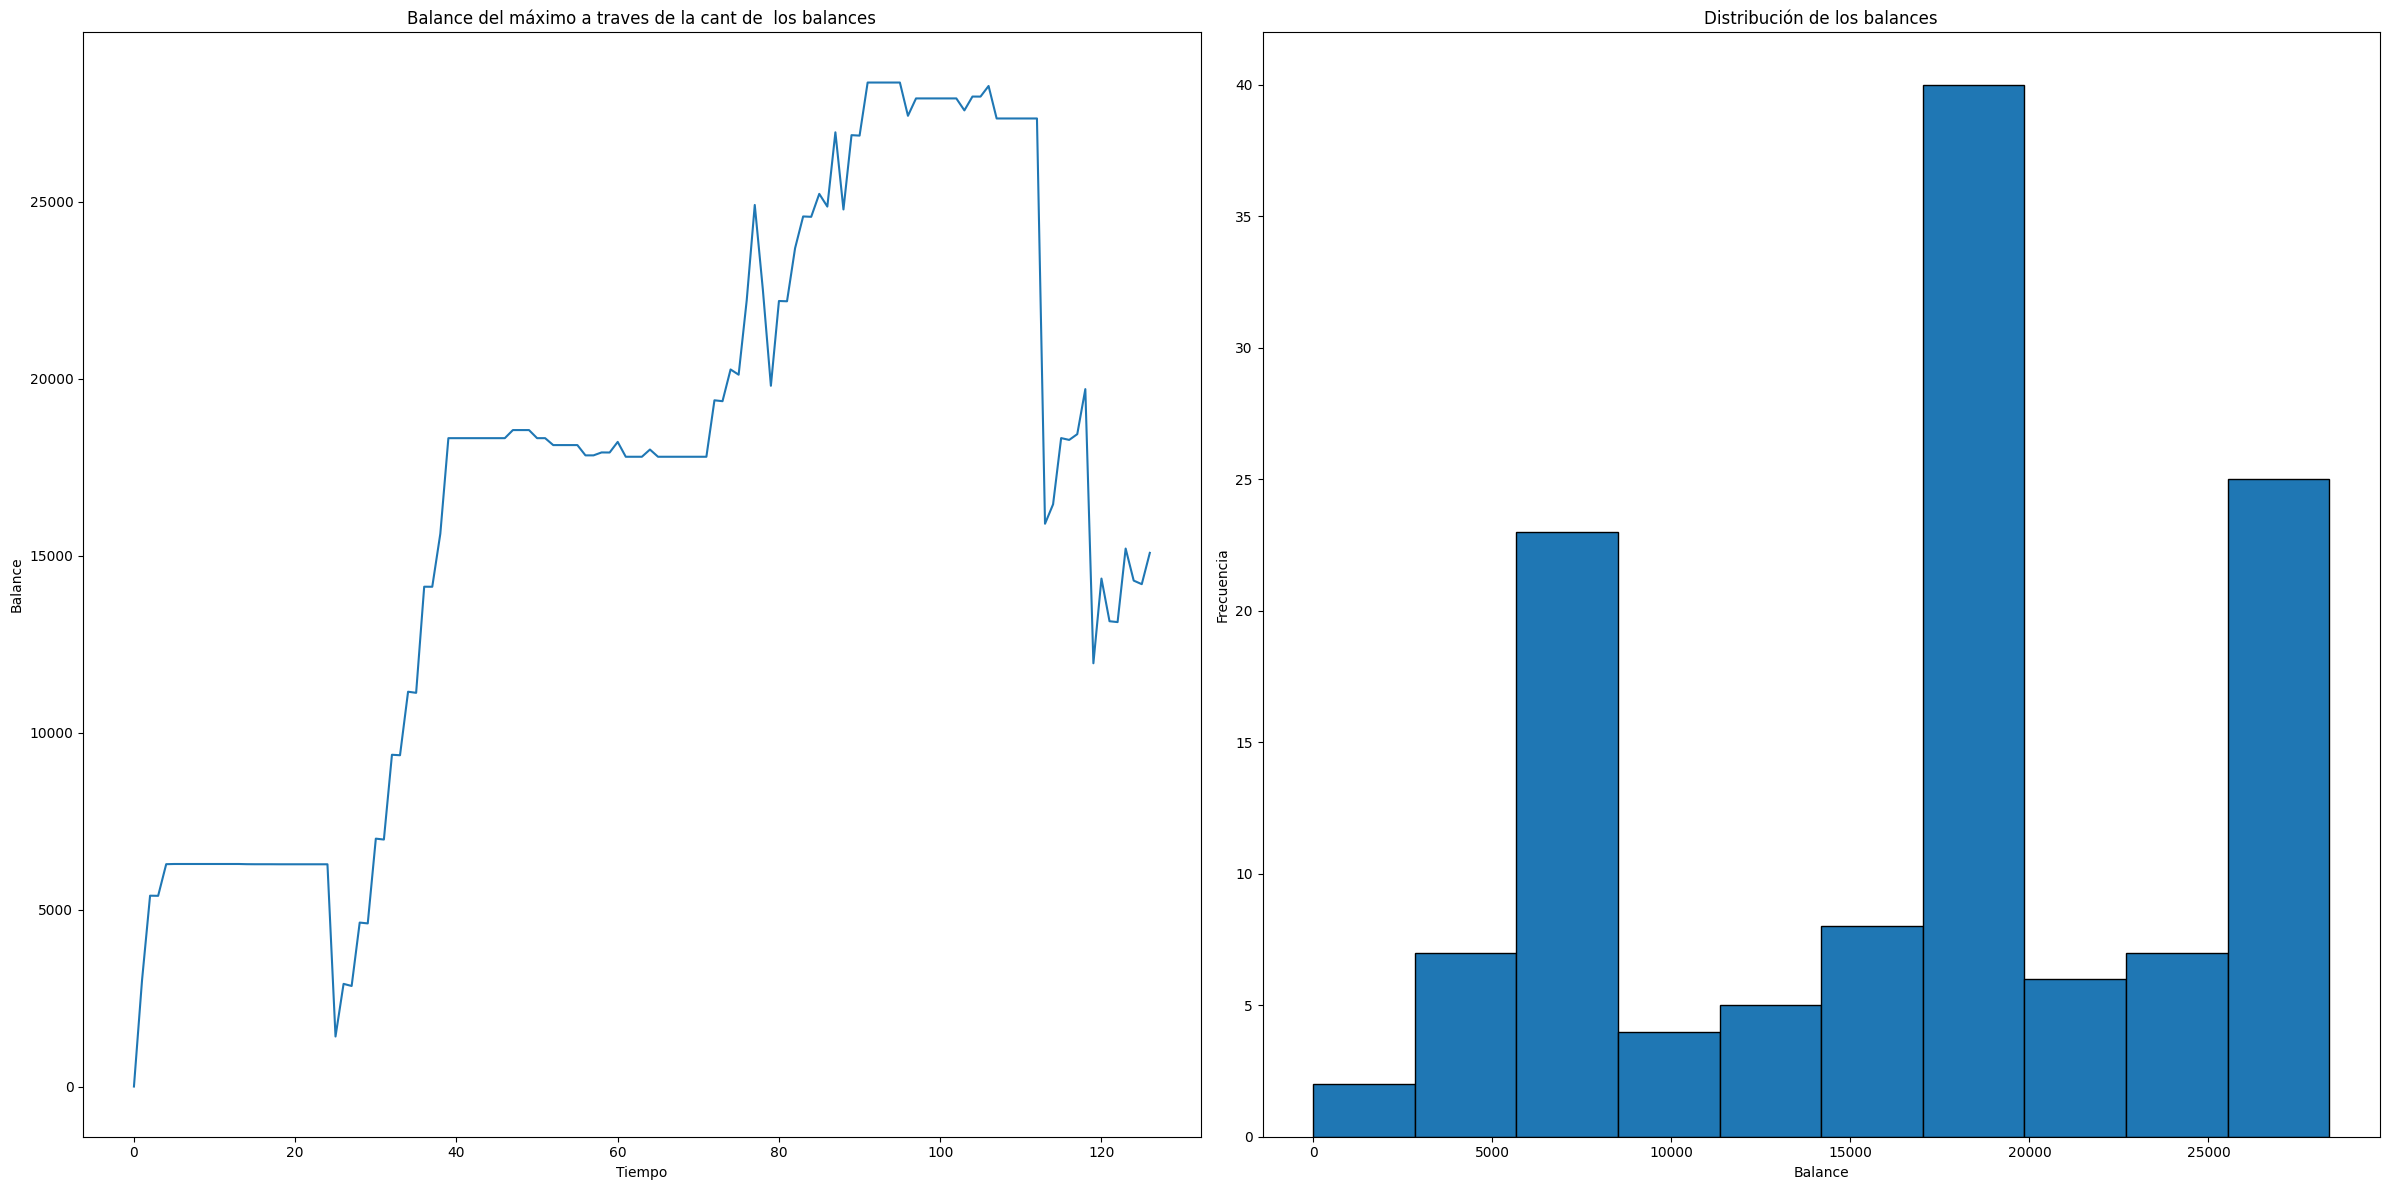



------------------------------------


------------------------------------
Analizar en base a la mediana



------------------------------------
Análisis en base a la mediana de  las ventas hasta el balance en particiones por índices :
 Media: 68.12204724409449
Mediana: 76.5
Varianza: 974.3728997457995
Desviación estándar: 31.21494673623198
Mínimo: 0.0
Máximo: 117.0


------------------------------------


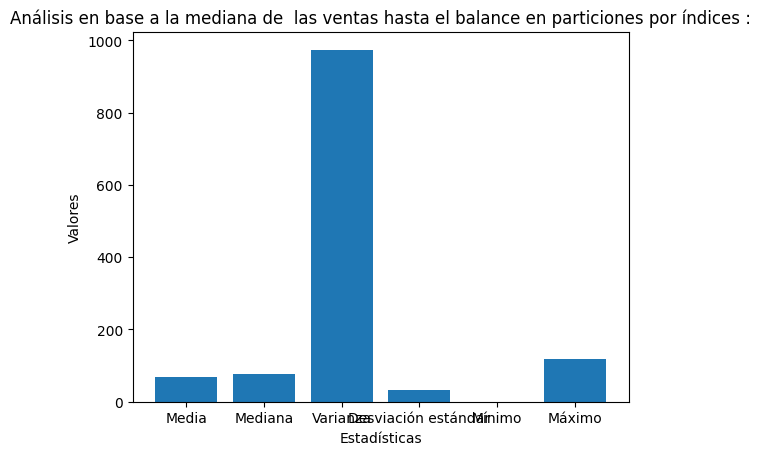

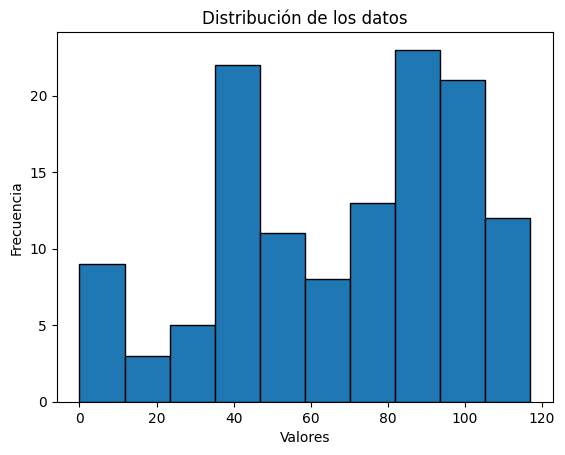

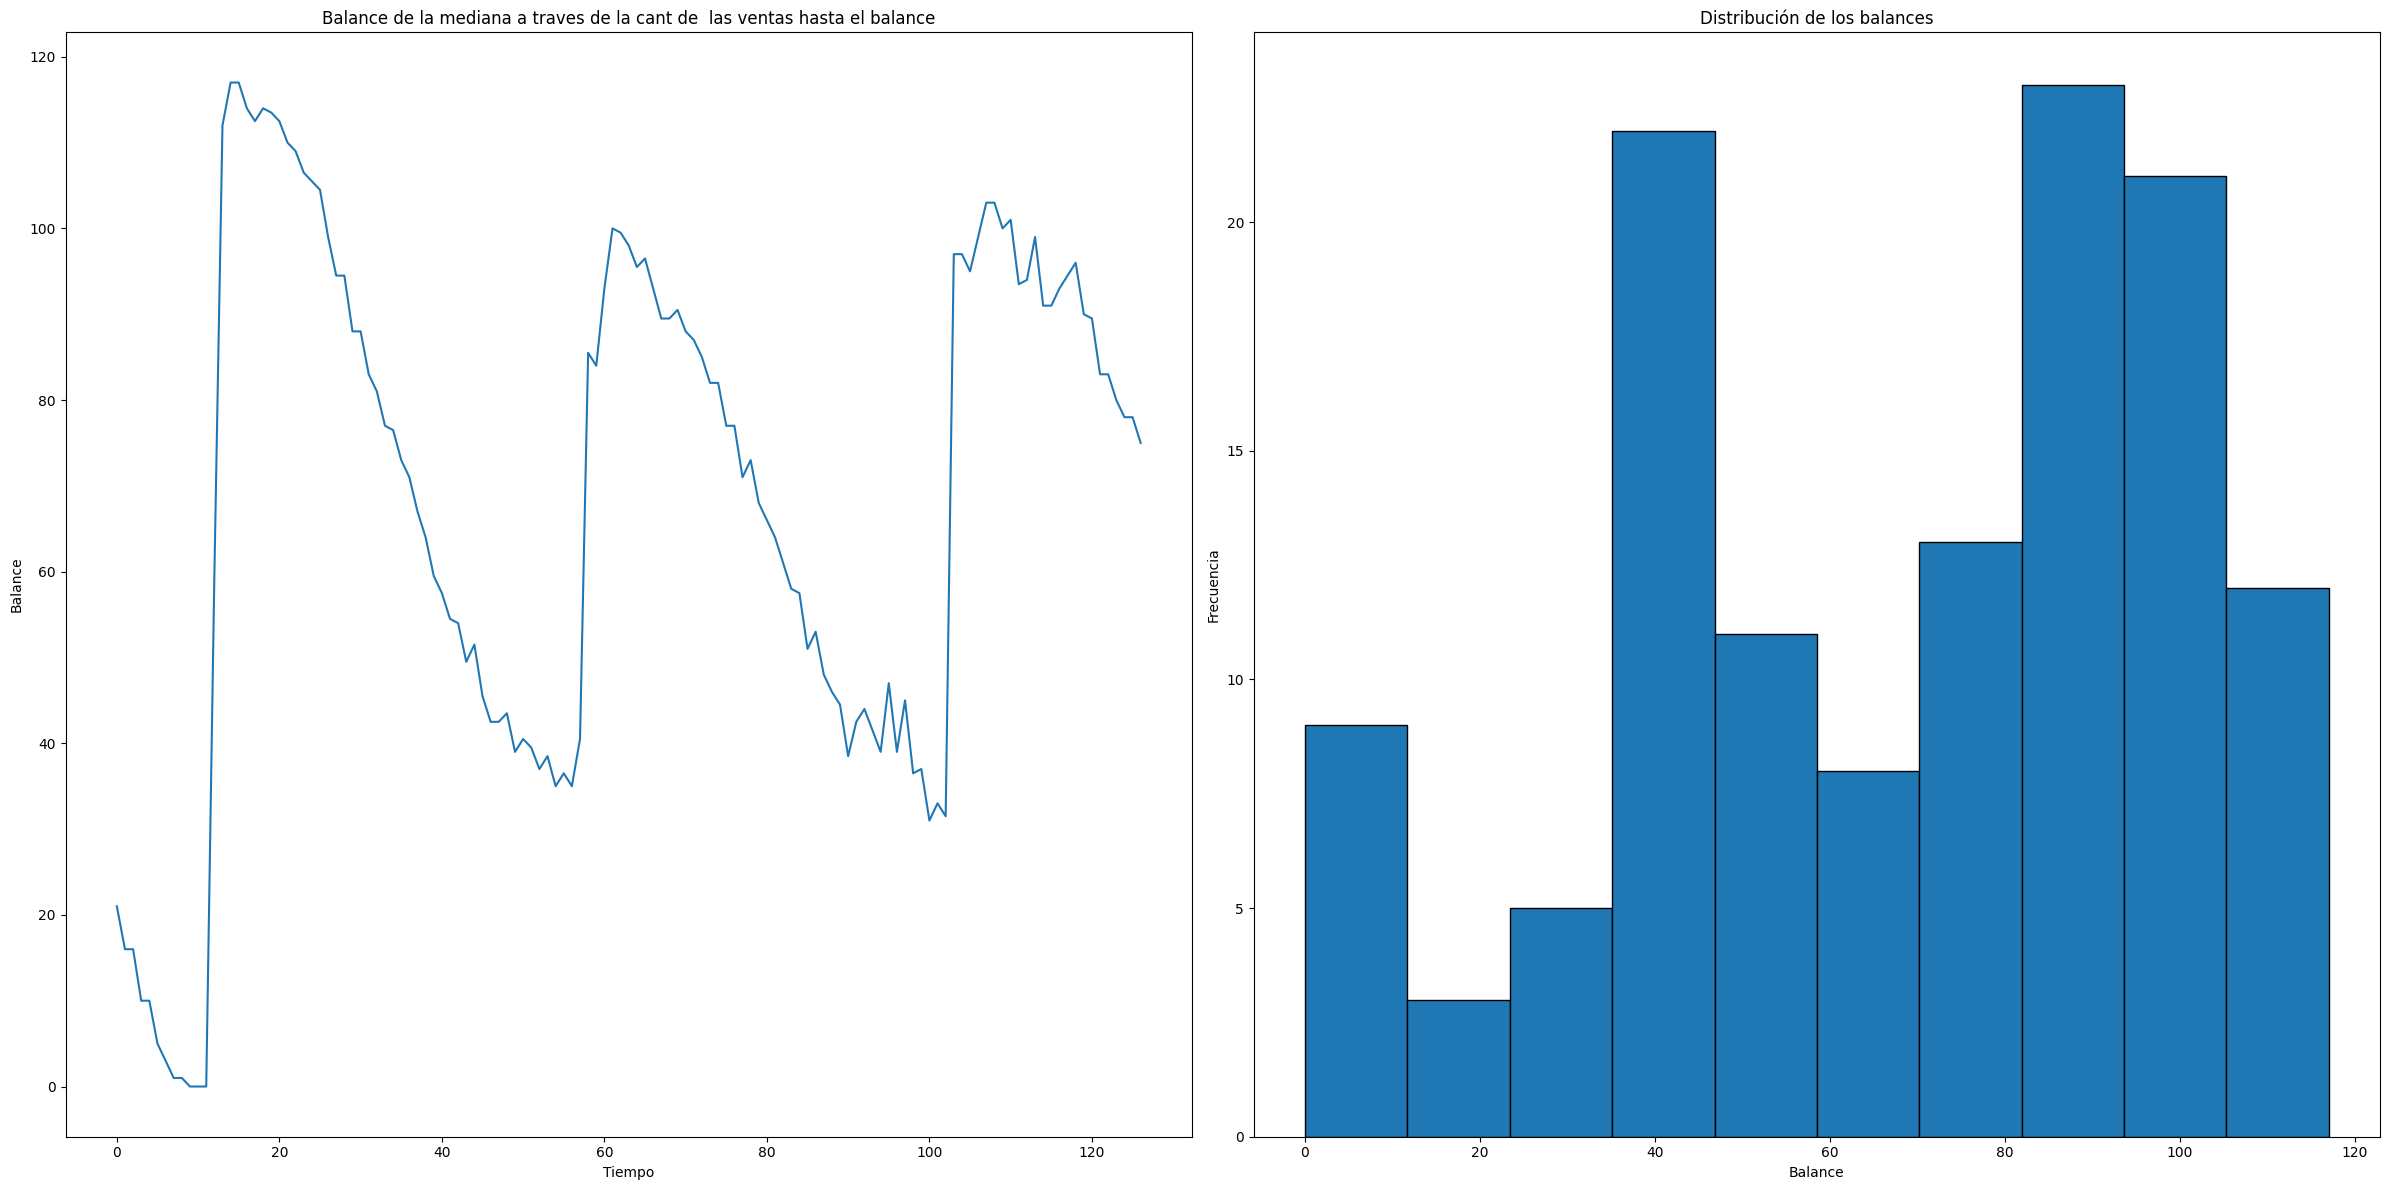



------------------------------------
Analizar en base al promedio



------------------------------------
Análisis en base al promedio de los  las ventas hasta el balance en particiones por índices
 Media: 68.69185311218071
Mediana: 70.03389830508475
Varianza: 432.03748883376255
Desviación estándar: 20.785511512439683
Mínimo: 12.733333333333333
Máximo: 102.31666666666666


------------------------------------


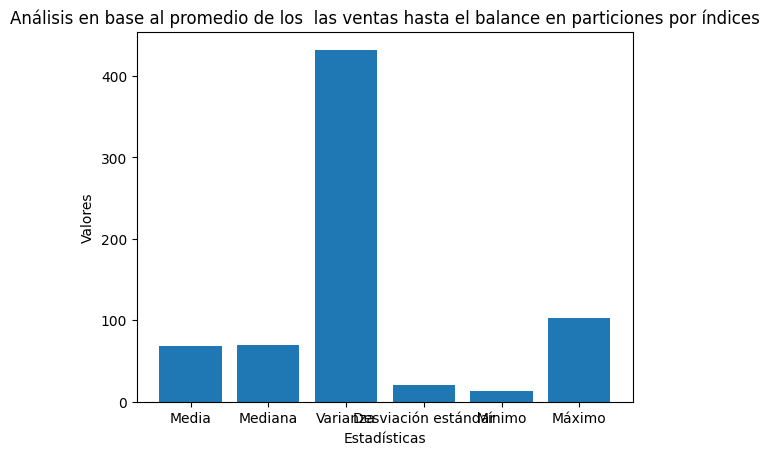

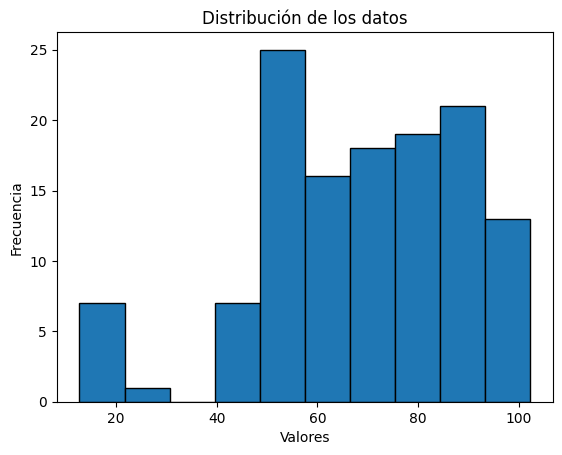

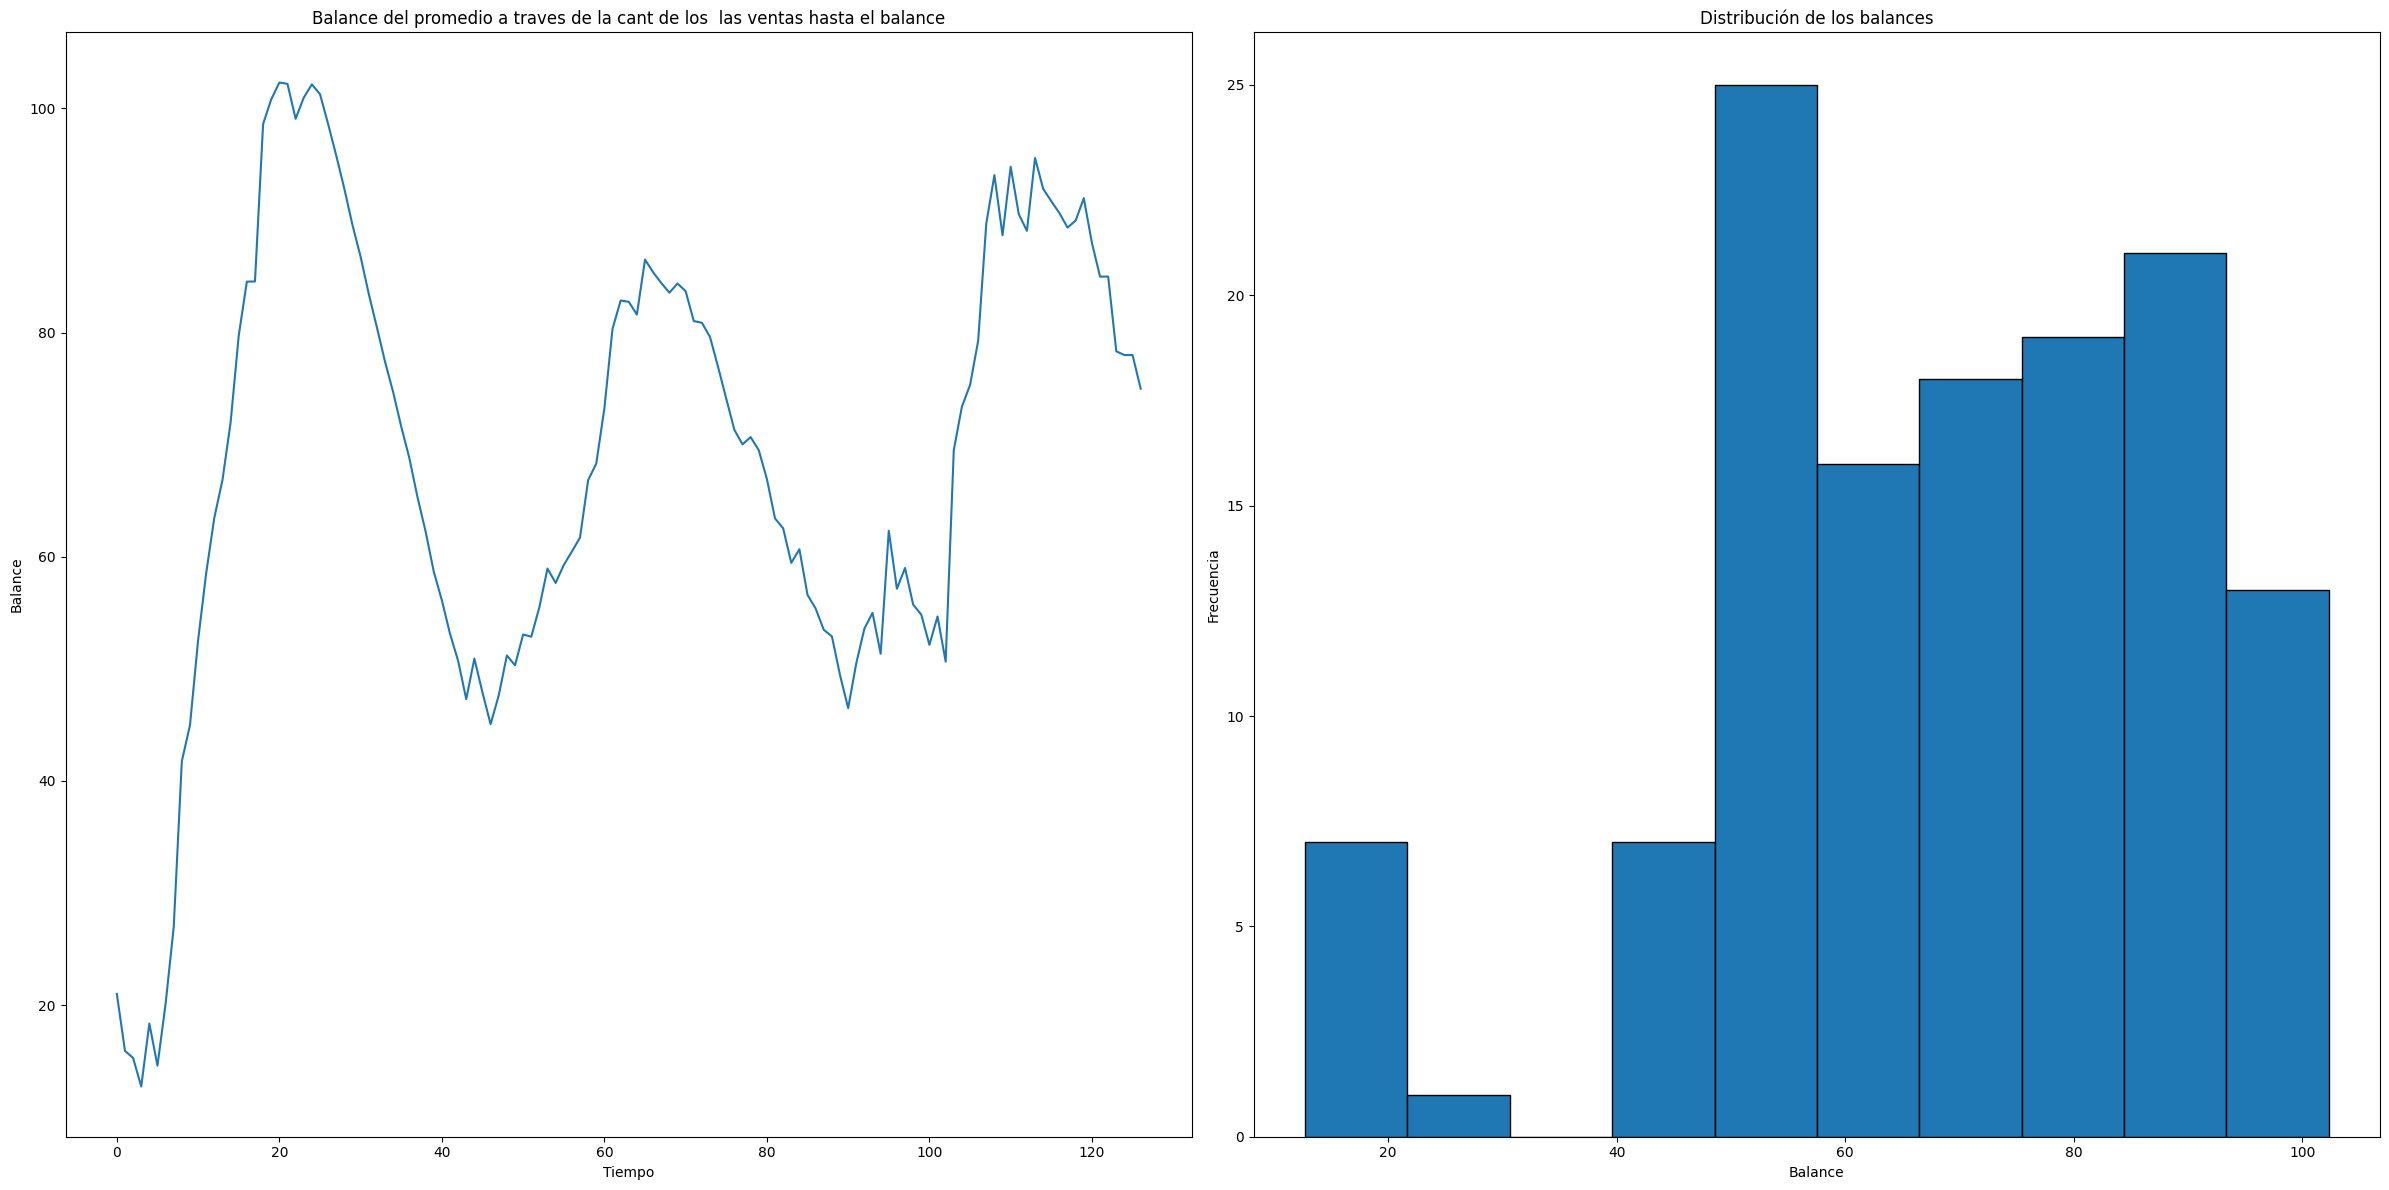



------------------------------------
Analizar en base a la varianza



------------------------------------
Análisis en base a la varianza de los  las ventas hasta el balance en particiones por índices
 Media: 1228.0743474837968
Mediana: 911.076388888889
Varianza: 1066944.2873609897
Desviación estándar: 1032.9299527852747
Mínimo: 0.0
Máximo: 4156.112222222224


------------------------------------


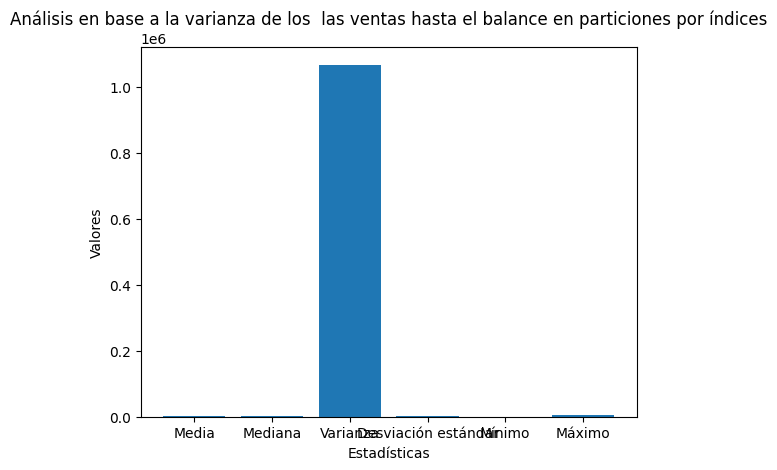

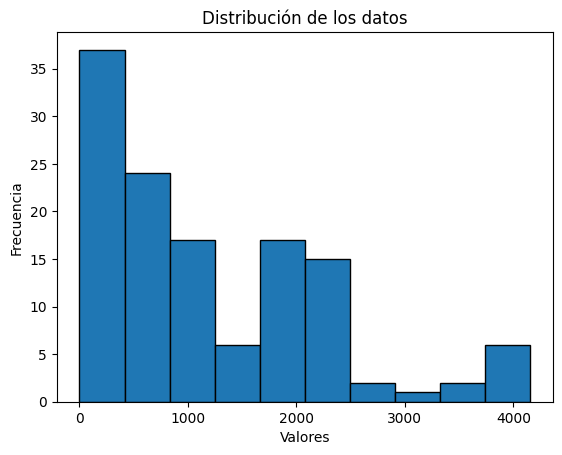

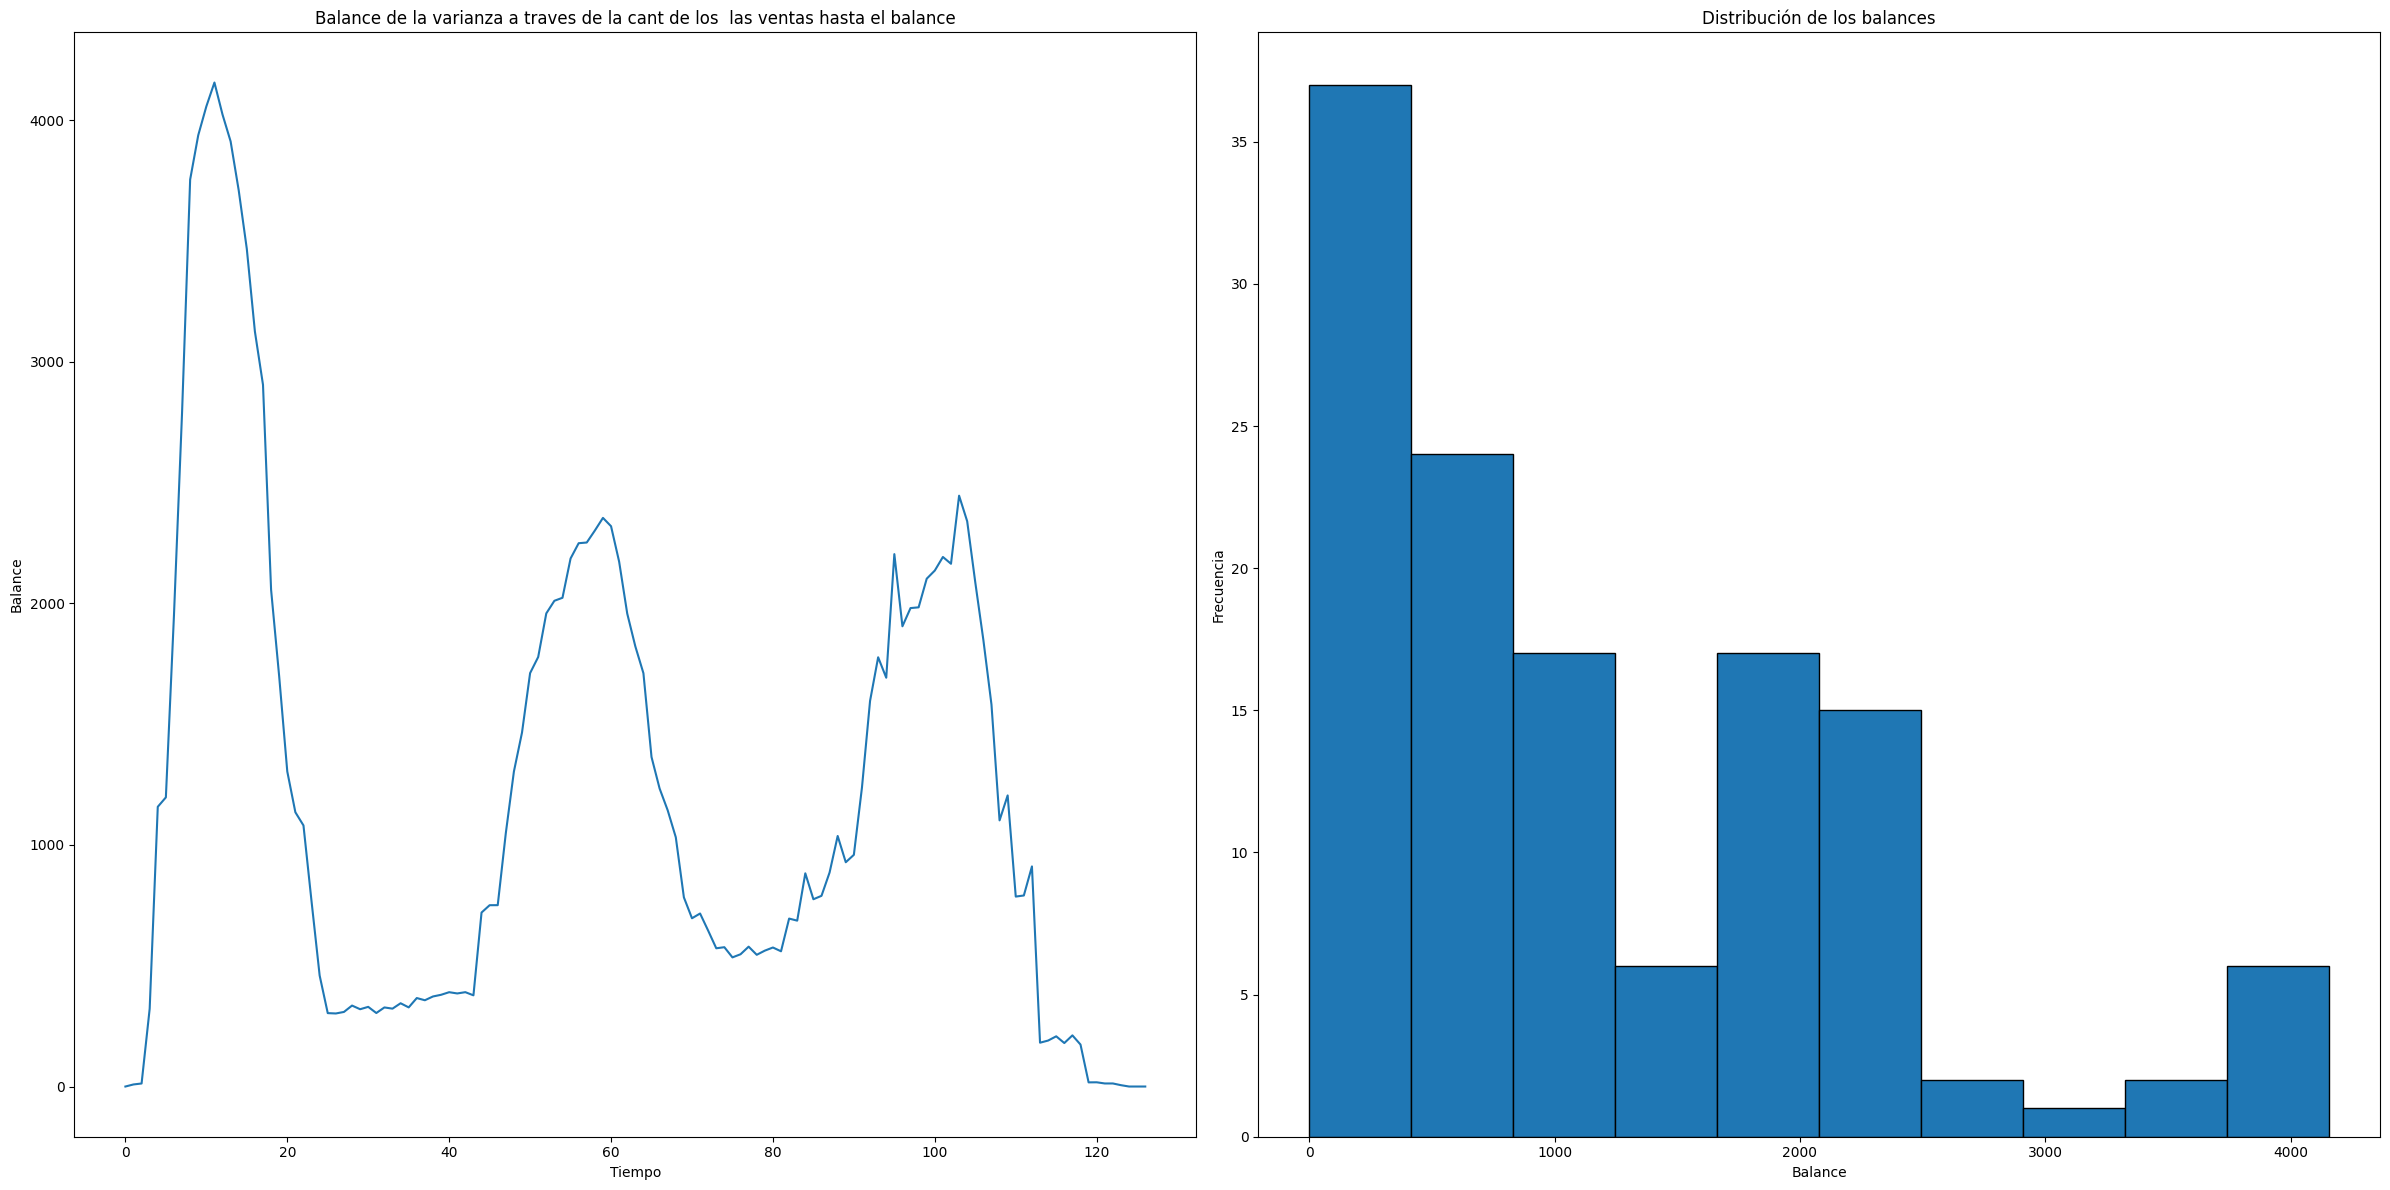



------------------------------------


------------------------------------
Analizar en base a la desviación estándar



------------------------------------
Análisis en base a la desviación estándar de los  las ventas hasta el balance en particiones por índices
 Media: 31.336066730818683
Mediana: 30.18404195744647
Varianza: 246.12526932547553
Desviación estándar: 15.688380073336939
Mínimo: 0.0
Máximo: 64.4679162236707


------------------------------------


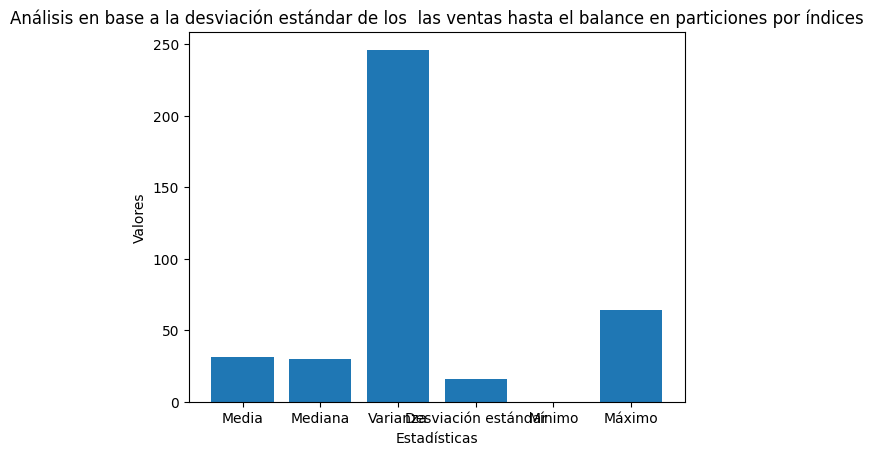

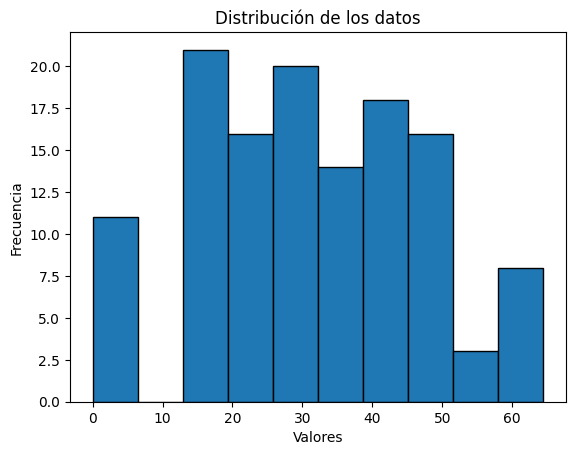

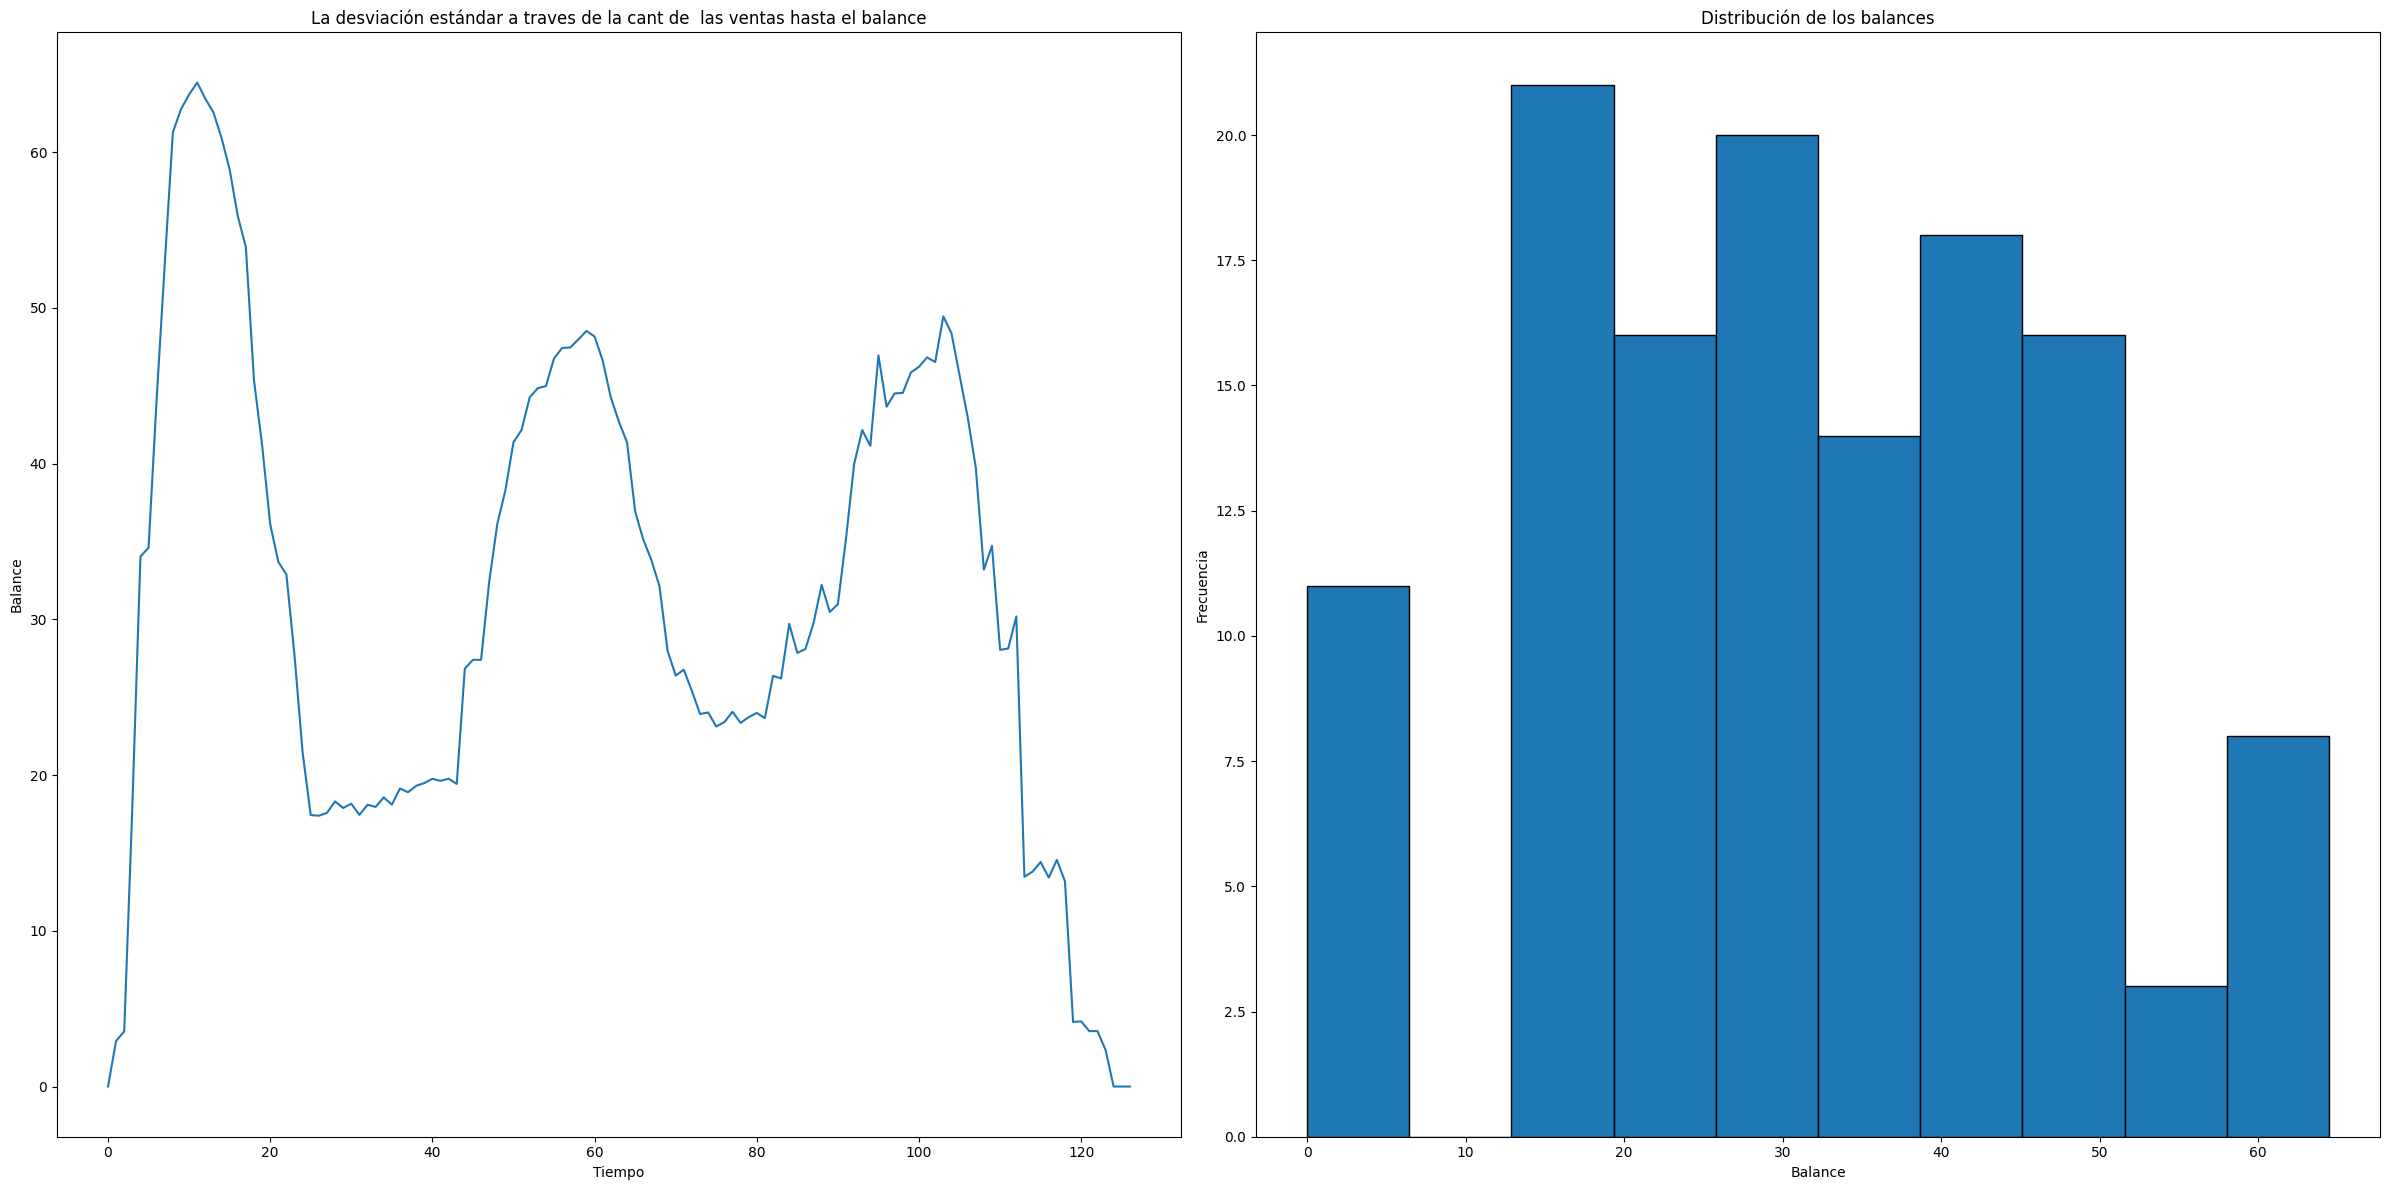



------------------------------------
Analizar en base al mínimo



------------------------------------
Análisis en base al mínimo de los  las ventas hasta el balance en particiones por índices
 Media: 13.67716535433071
Mediana: 0.0
Varianza: 623.6516833033666
Desviación estándar: 24.97301910669526
Mínimo: 0
Máximo: 89


------------------------------------


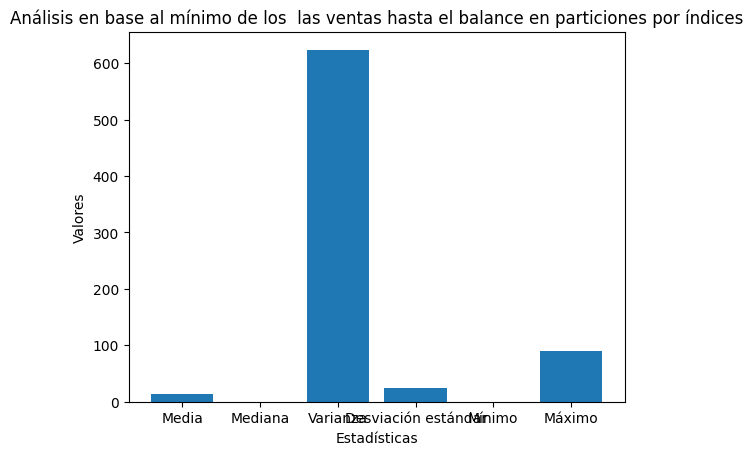

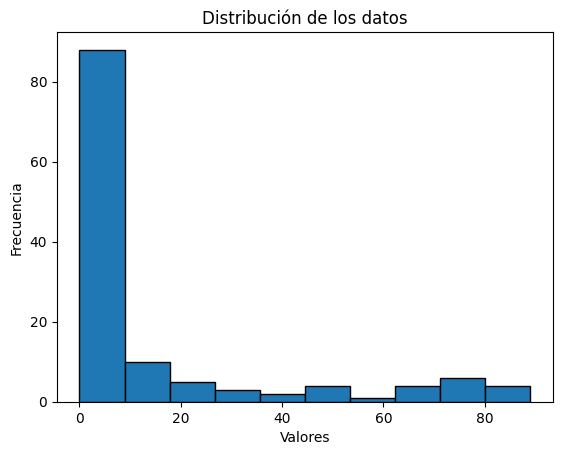

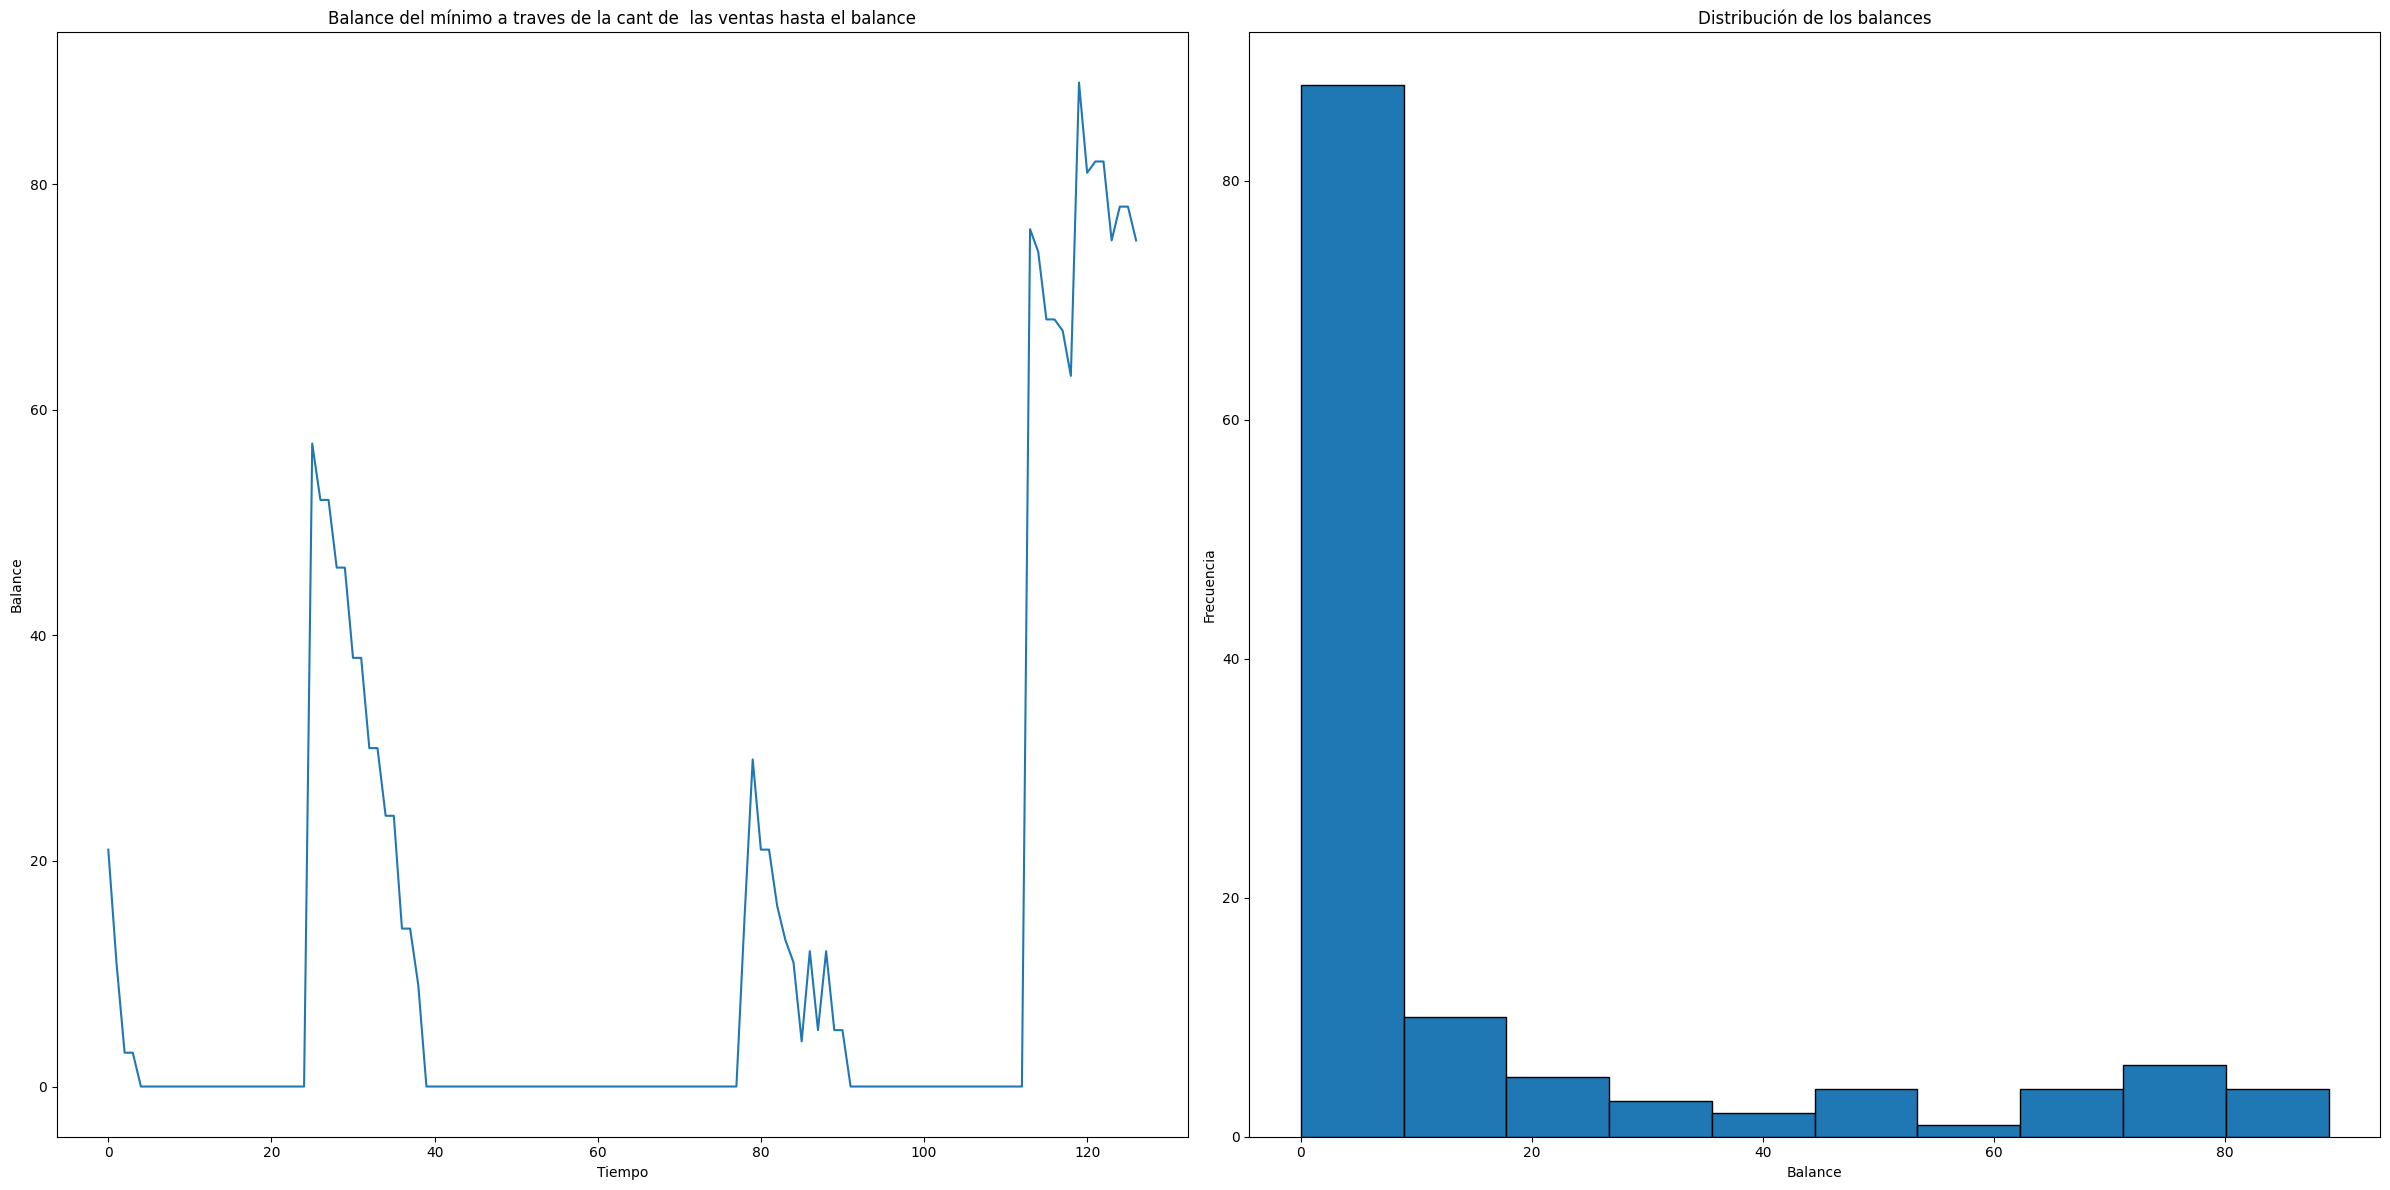



------------------------------------
Analizar en base al máximo



------------------------------------
Análisis en base al máximo de  las ventas hasta el balance en particiones por índices
 Media: 126.5984251968504
Mediana: 135.0
Varianza: 547.8151156302313
Desviación estándar: 23.405450553882343
Mínimo: 20
Máximo: 149


------------------------------------


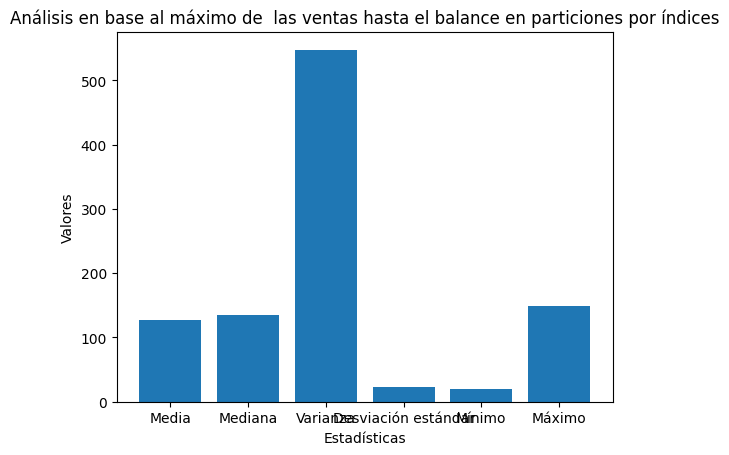

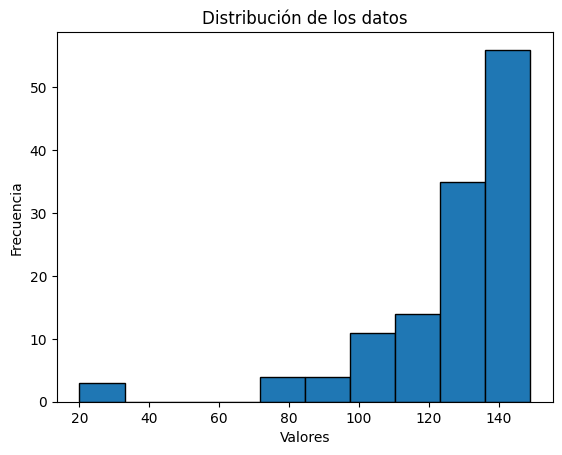

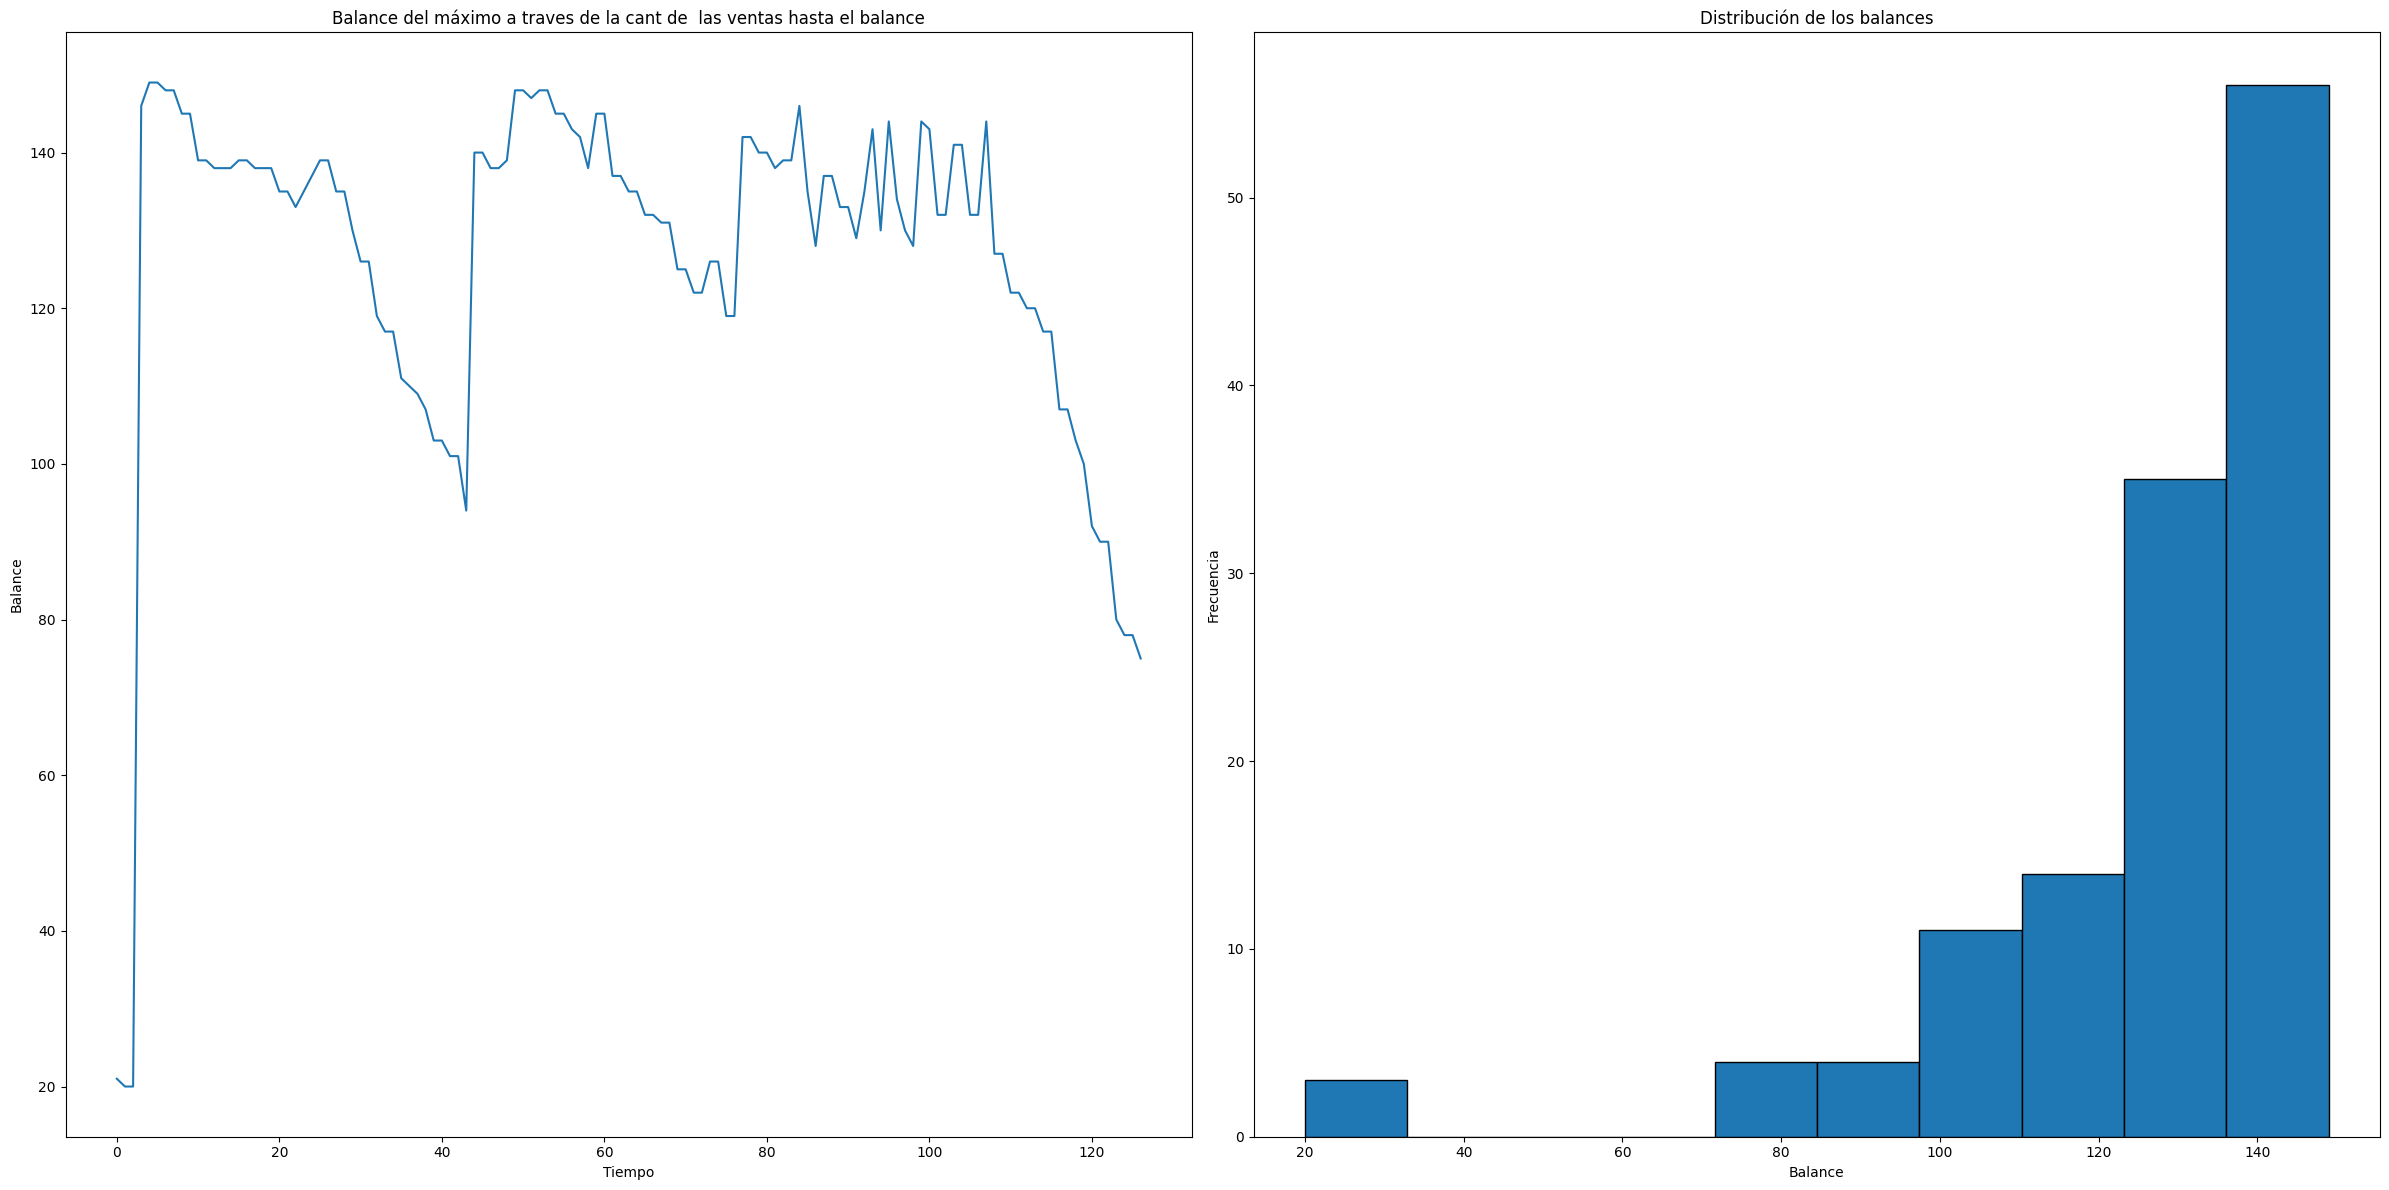



------------------------------------


In [6]:
analysis(lis_by_time)

### Conclusiones